<a href="https://colab.research.google.com/github/Aryan-Garg/PECNet/blob/main/dataset_aryan_create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Synthetic Dataset - Non Linear, Time Series

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import time
import random
import pickle

from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

from google.colab import files

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import cv2

**Initialize random velocity & random starting point. 50 or 100 sec run-time per trajectory. Then for acceleration:** 

## Ideas: 
1. **Have a piece-wise acceleration as a function of time. (const for 5 sec):** *Very non-linear curves expected*
2. **Completely random acceleration at each time instance:** *Possibility of stationary points alongside exploding curves expected*  
3. **Sample at arbitrary time instances and have constant acceleration:** *Standard quadratic curves but sampled at random points.*

---

### Params:
*   u  : Initial Velocity
*   A  : Acceleration
*   x0 : Initial starting point  


In [ ]:
def plot_(trajectory, acceleration, titleStr):
  x = [e[0] for e in trajectory]
  y = [e[1] for e in trajectory]

  xAcc = [e[0] for e in acceleration]
  yAcc = [e[1] for e in acceleration]

  fig = plt.figure(figsize=(12, 9))
  plt.plot(x[0], y[0], 'g*',  markersize=12, label='Start')
  plt.scatter(x[1:-1],y[1:-1])
  plt.plot(x[-1], y[-1], 'r*',  markersize=12, label='End')
  plt.grid(True)
  plt.legend()
  plt.title(f"Trajectory: {titleStr}")
  plt.show()

  fig2 = plt.figure(figsize=(10, 4))
  plt.subplot(1,2,1)
  plt.plot(np.arange(len(xAcc)), xAcc, 'g')
  plt.grid(True)
  plt.title("Acceleration-X")

  plt.subplot(1,2,2)
  plt.plot(np.arange(len(yAcc)), yAcc, 'r')
  plt.grid(True)
  plt.title("Acceleration-Y")
  
  plt.suptitle("Data Point")
  plt.show()

def nextPoint(u, a, xk):
  return np.array(xk + u + 0.5 * a)


def xt(u, a, x0, t):
  return np.array(x0 + u*t + 0.5*a*t*t)


def rand_negative(arr):
  negative = np.random.randint(2, size=2)
  if negative[0]:
    arr[0] *= -1
  if negative[1]:
    arr[1] *= -1
  return arr


def make_physics_samples(N_physics):
  MOD_VAL = 99999
  data = []
  for i in range(1, 1+N_physics):
    # initial velocity vec; 1.4m/s is average walking speed
    u = rand_negative(3*np.random.rand(2))  
    x0 = np.array([0.,0.])
    #print(f"#{i} --------------------------\nu: {u}m/s\nx0: {x0}")

    ideas = ['Piece-wise constant A', 'Random A', 'Constant A but random points sampled']
    idea_choice = np.random.randint(low=1,high=101)

    traj = []
    acc = []

    if idea_choice <= 5:
      #print(f"Acceleration Choice: Piece-wise const A\n------------------------------")
      for itr in range(20):
        A = rand_negative(0.2*np.random.rand(2)) # const acceleration for next 5 seconds
        for t in range(5):
          x0 = nextPoint(u, A, x0)
          # x0 *= (rand_negative(0.01*np.random.rand(2)) + np.ones(2)) # Noise: 99% - 101% 
          u += A
          acc.append(A)
        traj.append(x0)
      # print(f"pred points cnt: {len(traj)}")
      if i % MOD_VAL == 0:
        plot_(traj, acc, "Piece-wise Const | #"+str(i))

    elif idea_choice <= 10:
      #print(f"Acceleration Choice: Random A\n------------------------------")
      for itr in range(20):
        for t in range(5):
          A = 0.6*rand_negative(np.random.rand(2)) # every second the acceleration changes
          x0 = nextPoint(u, A, x0)
          # x0 *= (rand_negative(0.01*np.random.rand(2)) + np.ones(2)) # Noise: 99% - 101% 
          u += A
          acc.append(A)
        traj.append(x0)
      # print(f"pred points cnt: {len(traj)}")
      if i % MOD_VAL == 0:
        plot_(traj, acc, "Random A | #"+str(i))
         

    else:
      A = 0.3*rand_negative(np.random.rand(2)) # const acceleration
      #print(f"Const Acceleration: {A}\n------------------------------")

      # Points that will be selected
      select = np.ones(20)
      select = np.pad(select, (0,10), 'constant', constant_values=(0))
      np.random.shuffle(select)

      for t in range(30):
        x0 = nextPoint(u, A, x0)
        # x0 *= (rand_negative(0.01*np.random.rand(2)) + np.ones(2)) # Noise: 99% - 101% 
        u = u + A
        if select[t]:
          traj.append(x0)
          acc.append(A)
        #print(f"At t = {t}\nNext position: {next_x}\nNew velocity: {u}\n------------")

      # print(f"pred points cnt: {len(traj)}")
      if i % MOD_VAL == 0:
        plot_(traj, acc, "Const A | #"+str(i))
  
    #ths_ab = get_abruptness_score(traj)
    #record_abScores.append(ths_ab)
    #print(f"Abruptness Score of this trajectory: {ths_ab}")
    traj = np.array(traj)
    data.append(traj)

  data = np.array(data)
  return data

N_physics = 1 # Test cases to generate
data = make_physics_samples(N_physics)
record_abScores = []

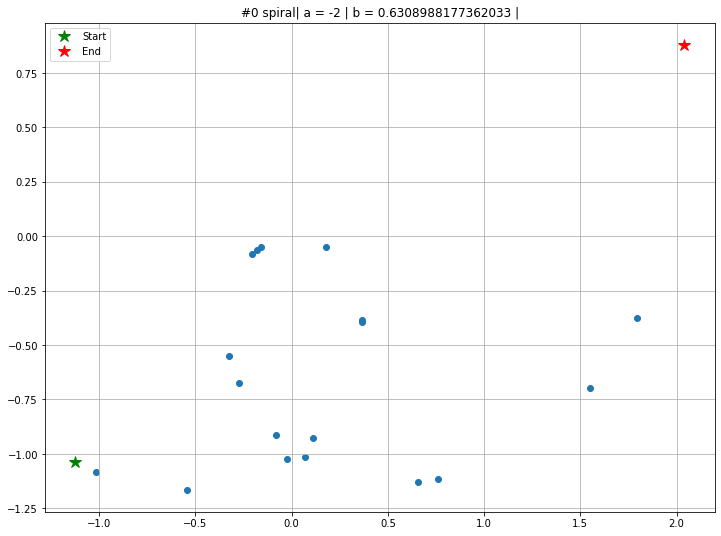

'\ndata1 = np.array(data1)\ndata_final = np.concatenate((data, data1))\nprint(f"Total dataset shape: {data1.shape}")\n\ndataBatched = []\nprint("Making batches...")\nfor batch in group_list(data_final, 512):\n  print(f"Created a batch! (Shape: {batch.shape})")\n  dataBatched.append(batch)\nprint("------- ****** -------")\ndataBatched = np.array(dataBatched, dtype=object)\n\n\nwith open(\'dataset_21_Jan.npy\', \'wb\') as f:\n  np.save(f, dataBatched) \n  f.close()\n'

In [ ]:
'''
  with open('dataset_M1_Phy_hard.npy', 'wb') as f:
    np.save(f, data) 
    f.close()

  Circuit Trajectories: (Lack of Goal Trajectories)
  
  Q. Why do we need these?
  A. Increased non-linearity promotes more complex models and in a way 
     penalize models that start memorizing(regularization).
     (Also, practically people do circuit-exercising, walking for leisure etc.)

  Features that make the dataset even harder in terms of learning non-linearity
    [+] Noise
    [+] Random Point Sampling
    [+] Multiple traversals of the same path
'''

def plot_circuit(traj, figTitle):
  x = [e[0] for e in traj]
  y = [e[1] for e in traj]

  fig = plt.figure(figsize=(12, 9))
  plt.title(figTitle)
  plt.plot(x[0], y[0], 'g*', markersize=12, label='Start')
  plt.scatter(x[1:-1], y[1:-1])
  plt.plot(x[-1], y[-1], 'r*', markersize=12, label='End')
  plt.grid(True)
  plt.legend()
  plt.show()

N_circuits = 2
MOD_VAL2 = 1
types = ['circular', 'rectangular_OneLap', 'polar-fun', 'spiral', 'almost-stationary']
data1 = []

for i in range(N_circuits):
  choice = np.random.randint(len(types))
  traj = []
  if choice is 0: # Circular
    x0 = np.random.randint(-100, high=100) * np.random.rand(2) # Center
    radius = np.random.randint(50, high=200)
    theta_t = 2*math.pi*np.random.rand() # in rad
    add_to_theta = (2*math.pi) / np.random.randint(4, high=36) # [pi/18, pi/2] == [10, 90] degree steps 
    if np.random.randint(2):
      add_to_theta *= -1
    for i in range(20):
      theta_t += add_to_theta*np.random.rand()
      x = np.array([x0[0] + radius*math.cos(theta_t), x0[1] + radius*math.sin(theta_t)])
      traj.append(np.array([x[0] + np.random.randint(-3, high=3)*np.random.rand(),
                    x[1] + np.random.randint(-3, high=3)*np.random.rand()]))

    if i % MOD_VAL2 == 0:
      plot_circuit(traj, "#"+str(i)+" "+types[choice])


  elif choice is 1: # Rect
    '''
               2
        ---------------
     1  |             | 3
        |             |
        ---------------
              4
    '''   
    length = np.random.randint(50, 200)
    breadth = np.random.randint(40, 180)
    bl = np.random.randint(-100, high=100, size=2)
    tl = np.array([bl[0], bl[1] + breadth])
    br = np.array([bl[0] + length, bl[1]])
    tr =  np.array([br[0], br[1] + breadth])
    
    if np.random.randint(2) == 0:
      # CW
      traj.append(bl)
      side1 = np.sort(np.random.rand(4))
      side2 = np.sort(np.random.rand(5))
      side3 = np.sort(np.random.rand(5))
      side4 = np.sort(np.random.rand(5))

      for i in range(len(side1)):
        traj.append(np.array([bl[0] + np.random.randint(-3, high=3)*np.random.rand(), 
                              bl[1] + breadth*side1[i] + np.random.randint(-3, high=3)*np.random.rand()]))
      for i in range(len(side2)):
        traj.append(np.array([tl[0] + np.random.randint(-3, high=3)*np.random.rand() + length*side2[i], 
                              tl[1] + np.random.randint(-3, high=3)*np.random.rand()]))
      for i in range(len(side3)):
        traj.append(np.array([tr[0] + np.random.randint(-3, high=3)*np.random.rand(), 
                              tr[1] - breadth*side3[i] + np.random.randint(-3, high=3)*np.random.rand()]))
      for i in range(len(side4)):
        traj.append(np.array([br[0] + np.random.randint(-3, high=3)*np.random.rand() - length*side4[i], 
                                br[1] + np.random.randint(-3, high=3)*np.random.rand()]))

    else:
      # ACW
      traj.append(tl)
      side1 = np.sort(np.random.rand(4))
      side2 = np.sort(np.random.rand(5))
      side3 = np.sort(np.random.rand(5))
      side4 = np.sort(np.random.rand(5))

      for i in range(len(side1)):
        traj.append(np.array([tl[0] + np.random.randint(-3, high=3)*np.random.rand(), 
                              tl[1] + np.random.randint(-3, high=3)*np.random.rand() - length*side2[i]]))
      for i in range(len(side4)):
        traj.append(np.array([bl[0] + np.random.randint(-3, high=3)*np.random.rand() + length*side4[i], 
                              bl[1] + np.random.randint(-3, high=3)*np.random.rand()]))
      for i in range(len(side3)):
        traj.append(np.array([br[0] + np.random.randint(-3, high=3)*np.random.rand(), 
                              br[1] + breadth*side3[i] + np.random.randint(-3, high=3)*np.random.rand()]))
      for i in range(len(side2)):
        traj.append(np.array([tr[0] + np.random.randint(-3, high=3)*np.random.rand() - length*side2[i], 
                              tr[1] + np.random.randint(-3, high=3)*np.random.rand()]))

      if i % MOD_VAL2 == 0:
        plot_circuit(traj, "#"+str(i)+" "+types[choice])


  elif choice is 2: # Polar fun
    '''
    -------------------------- 2Po
      r = a + bcos(k*Theta)
      r = sqrt(x**2 + y**2)
      Theta = math.atan(y/x)
      ------------------------ B2C
      x = rcos(Theta)
      y = rsin(Theta)
    '''
    # Dealing with k-leaf-rose curves
    def calc_r(a,b,k, Theta):
      return a + b*math.cos(k*Theta)

    a = np.random.randint(1, high=4)
    b = a
    k = a

    Theta = 2*math.pi*np.random.rand() # in rad
    add_to_theta = (2*math.pi) / np.random.randint(4, high=18) # [pi/9, pi/2] == [20, 90] degree steps

    for t in range(20):
      R = calc_r(a,b,k,Theta)
      traj.append(np.array([R*math.cos(Theta), R*math.sin(Theta)]))
      Theta += add_to_theta*np.random.rand()

    if i % MOD_VAL2 == 0:
      plot_circuit(traj, "#"+str(i)+" "+types[choice]+'| a = b = k = '+str(a)+' |')


  elif choice is 3: # Spiral
    # r = a + b.Theta
    def calc_r(a,b, Theta):
      return a + b*Theta

    a = np.random.randint(-2, high=2)
    b = 3*np.random.rand()

    Theta = 2*math.pi*np.random.rand() # in rad
    add_to_theta = (2*math.pi) / np.random.randint(4, high=18) # [pi/9, pi/2] == [20, 90] degree steps

    for t in range(20):
      R = calc_r(a,b,Theta)
      traj.append(np.array([R*math.cos(Theta), R*math.sin(Theta)]))
      Theta += add_to_theta*np.random.rand()

    if i % MOD_VAL2 == 0:
      plot_circuit(traj, "#"+str(i)+" "+types[choice]+'| a = '+str(a)+' | b = '+str(b)+' |')


  elif choice is 4: # almost stationary Traj
    traj = []
    upperLim = 1
    lowerLim = -1
    multiplier = 1.1
    for i in range(20):
      X = np.random.randint(lowerLim, high=upperLim, size=2)
      traj.append(X)
      lowerLim *= multiplier
      upperLim *= multiplier
    if i % MOD_VAL2 == 0:
      plot_circuit(traj, "#"+str(i)+" "+types[choice])

  traj = np.array(traj)
  #if i % MOD_VAL2 == 0:
  #  print(f"Traj: {traj}")
  data1.append(traj)

def group_list(l, group_size):
  """
    :param l:           list
    :param group_size:  size of each group
    :return:            Yields successive group-sized lists from l.
  """
  for i in range(0, len(l), group_size):
    yield l[i:i+group_size]

'''
data1 = np.array(data1)
data_final = np.concatenate((data, data1))
print(f"Total dataset shape: {data1.shape}")

dataBatched = []
print("Making batches...")
for batch in group_list(data_final, 512):
  print(f"Created a batch! (Shape: {batch.shape})")
  dataBatched.append(batch)
print("------- ****** -------")
dataBatched = np.array(dataBatched, dtype=object)


with open('dataset_21_Jan.npy', 'wb') as f:
  np.save(f, dataBatched) 
  f.close()
'''

In [ ]:
sdd_data_train = np.load('/content/train_dataset.npy',allow_pickle=True)
sdd_data_test = np.load('/content/test_dataset.npy', allow_pickle=True)

print(sdd_data_train.shape)
print(sdd_data_test.shape)

(36,)
(1, 2829, 20, 2)


### Visualize All SDD

In [ ]:
all_train_trajs = []
for k in range(len(sdd_data_train)):
  for i in range(len(sdd_data_train[k])):
    all_train_trajs.append(sdd_data_train[k][i])
    # plot_circuit(sdd_data_train[k][i], f'Data point: {k}:{i+1} | Len Trj: {len(sdd_data_train[k][i])}')

In [ ]:
counts = np.zeros(21)
cnt = 0
for traj in all_train_trajs:
  temp = set()
  for pt in traj:
    temp.add((pt[0], pt[1]))
  #print(len(temp))
  counts[len(temp)] += 1

print("Unique Points :: #Trajectories :: % of total dataset")
elevenTOnineteen = 0
for i in range(1,21):
  print(f"{i} :: {int(counts[i])} \t :: {counts[i]*100/(len(all_train_trajs)):.2f} %")
  if i >= 11 and i < 20:
    elevenTOnineteen += int(counts[i])

print(f"\n------------------------------------\n{len(all_train_trajs) - counts[20]} trajectories out of {len(all_train_trajs)} have < 20 points\nOut of which {counts[1]} are perfectly stationary at (0,0)")
print("------------------------------------")
print(f"11 to 19 pts(inclusive): {elevenTOnineteen} ({200200/len(all_train_trajs):.2f} %)")

Unique Points :: #Trajectories :: % of total dataset
1 :: 1304 	 :: 7.26 %
2 :: 522 	 :: 2.90 %
3 :: 538 	 :: 2.99 %
4 :: 466 	 :: 2.59 %
5 :: 382 	 :: 2.13 %
6 :: 298 	 :: 1.66 %
7 :: 228 	 :: 1.27 %
8 :: 260 	 :: 1.45 %
9 :: 206 	 :: 1.15 %
10 :: 184 	 :: 1.02 %
11 :: 174 	 :: 0.97 %
12 :: 160 	 :: 0.89 %
13 :: 152 	 :: 0.85 %
14 :: 178 	 :: 0.99 %
15 :: 178 	 :: 0.99 %
16 :: 214 	 :: 1.19 %
17 :: 264 	 :: 1.47 %
18 :: 276 	 :: 1.54 %
19 :: 406 	 :: 2.26 %
20 :: 11580 	 :: 64.44 %

------------------------------------
6390.0 trajectories out of 17970 have < 20 points
Out of which 1304.0 are perfectly stationary at (0,0)
------------------------------------
11 to 19 pts(inclusive): 2002 (11.14 %)


In [ ]:
# Find Bounding Boxes
import math
bbs = np.zeros(20002)
index_bb_HM = {}
for i in range(len(all_train_trajs)):
  max_x = max(all_train_trajs[i][:, 0])
  max_y = max(all_train_trajs[i][:, 1])
  min_x = min(all_train_trajs[i][:, 0])
  min_y = min(all_train_trajs[i][:, 1])
  bbLim = math.ceil(max(max_x-min_x, max_y - min_y))
  bbs[bbLim] += 1
  index_bb_HM[i] = bbLim
  # print(max(max_x-min_x, max_y - min_y))
  # print(f"------ {max_y} ------")
  # print(f"|                   |")
  # print(f"{min_x}             {max_x}")
  # print(f"|                   |")
  # print(f"------ {min_y} ------")
  # print("DONE.\n")

In [ ]:
print(max(bbs), np.argmax(bbs))

1304.0 0


### Synthetic SDD  

1.   Make Synthetic SDD: [+]   
      A. Keep either axis fixed. (On the fixed axis, at random time, add noise).
2.   Look at: http://svl.stanford.edu/assets/papers/ECCV16social.pdf [+]
3.   Implement beta annealing for SGD.

Insight: SGD is faster than ADAM -> Brings the ADE down. 

**Types/Categories of Trajectories**   
Type 1: *Stationary*  
Type 2: *3-8 pts, 5x5 box* (2F means category 2 + Flying)   
Type 3: *3-9 pts, loose: 100x100 box, tight: 40x40 box (+Purely on one axis)* (3F means category 3 + Flying)      
Type 4: *Start-End, 5x5 box*   
Type 5: *Flying*   
Type 6: *Backtracker*  
Type 7: *Perfectly Linear*
Uncategorized: Almost linear to Moderately linear physics(M1) trajectories used here.   

In [ ]:
'''
Utility Functions:

  1. plot_circuit
      Args: Trajectory list, figure title 
      Returns: Plot of trajectory

  2. generate_category_report 
      Returns: Report of the categories/types of trajs

  3.1 randNeg
      Input: Float/Int
      Returns: Negative or Positive of a number randomly
  
  3.2 rand_negative:
      Input: 2-Tuple
      Returns Negative or Positive of either randomly.
  
  4. perfectly_linear:
      Returns a linear trajectory that can be bounded as well.

  5. fly_routine:
      Shift some points in the trajectory
      REMEMBER: In python, function calls are by object-reference (can change list in-place)
  
  6. tail_cutter:
      Replaces the last (21 - numPointsInTraj) points of the trajectory with 
      the point at the index (numPointsInTraj-1) of the trajectory
      
      [+] Chaos Cutting retains the whole trajectory and shifts extra points to 
      randomly selected unique points  
'''

def generate_category_report(fnam = ""):
  if fnam == "":
    print("\n******************** Category Report *********************")
    print(f"Total Trajectories: {N_SYN_sdd}\n")
    print(f"Category | Theoretical % | Actual %")
    print("------------------------------------")
    print(f" Type 1  |     5.12 %    | {100*catCnts[0]/N_SYN_sdd:.2f} %  ")
    print(f" Type 2  |     {19750/2829:.2f} %    | {100*catCnts[3]/N_SYN_sdd:.2f} %  ")
    print(f" Type 2F |     {19750/2829:.2f} %    | {100*catCnts[2]/N_SYN_sdd:.2f} %  ")
    print(f" Type 3  |     {4350/2829:.2f} %    | {100*catCnts[5]/N_SYN_sdd:.2f} %  ")
    print(f" Type 3F |     {4350/2829:.2f} %    | {100*catCnts[4]/N_SYN_sdd:.2f} %  ")
    print(f" Type 4  |     2.18 %    | {100*catCnts[1]/N_SYN_sdd:.2f} %  ")
    print(f" Type 5  |     44.96 %   | {100*catCnts[8]/N_SYN_sdd:.2f} %  ")
    print(f" Type 6  |     1.51 %    | {100*catCnts[7]/N_SYN_sdd:.2f} %  ")
    print(f" Type 7  |     9.6 %     | {100*catCnts[6]/N_SYN_sdd:.2f} %  ")
    print(f" UnCat   |     {0.6848*(100-65.72):.2f} %   | {100*catCnts[9]/N_SYN_sdd:.2f} %")
    print("------------------------------------")
    print("NOTE: Some theoretical values were rounded up")
    print("**********************************************************")
    print(f"Full dataset shape: {data_final.shape}")

  with open(f'{fnam}.txt', 'w') as f:
    print("\n******************** Category Report *********************", file=f)
    print(f"Total Trajectories: {N_SYN_sdd}\n", file=f)
    print(f"Category | Theoretical % | Actual %", file=f)
    print("------------------------------------", file=f)
    print(f" Type 1  |     5.12 %    | {100*catCnts[0]/N_SYN_sdd:.2f} %  ", file=f)
    print(f" Type 2  |     {19750/2829:.2f} %    | {100*catCnts[3]/N_SYN_sdd:.2f} %  ", file=f)
    print(f" Type 2F |     {19750/2829:.2f} %    | {100*catCnts[2]/N_SYN_sdd:.2f} %  ", file=f)
    print(f" Type 3  |     {4350/2829:.2f} %    | {100*catCnts[5]/N_SYN_sdd:.2f} %  ", file=f)
    print(f" Type 3F |     {4350/2829:.2f} %    | {100*catCnts[4]/N_SYN_sdd:.2f} %  ", file=f)
    print(f" Type 4  |     2.18 %    | {100*catCnts[1]/N_SYN_sdd:.2f} %  ", file=f)
    print(f" Type 5  |     44.96 %   | {100*catCnts[8]/N_SYN_sdd:.2f} %  ", file=f)
    print(f" Type 6  |     1.51 %    | {100*catCnts[7]/N_SYN_sdd:.2f} %  ", file=f)
    print(f" Type 7  |     9.6 %     | {100*catCnts[6]/N_SYN_sdd:.2f} %  ", file=f)
    print(f" UnCat   |     {0.6848*(100-65.72):.2f} %   | {100*catCnts[9]/N_SYN_sdd:.2f} %", file=f)
    print("------------------------------------", file=f)
    print("NOTE: Some theoretical values were rounded up", file=f)
    print("**********************************************************", file=f)
    print(f"Full dataset shape: {data_final.shape}", file=f)

def randNeg(number):
  wt = np.random.randint(0, 2)
  if wt:
    return number
  return -number

def rotate(lst, theta):
  toRet = []
  for e in lst:
    toRet.append([e[0]*math.cos(theta) - e[1]*math.sin(theta),
                  e[0]*math.sin(theta) + e[1]*math.cos(theta)])
  return toRet


def perfectly_linear(this_traj, onAxis = False, upper_bound = 103):
  x = np.linspace(0, np.random.randint(max(upper_bound - 63, 1), upper_bound), num=20)
  negative = np.random.randint(-1,2)
  theta = (negative * math.pi * np.random.rand()) / 2

  if onAxis:
    angles = [math.pi/2, -math.pi/2, math.pi, 0]
    theta = random.choice(angles)

  if theta == math.pi/2:
    x = np.zeros(20)
    if upper_bound == 103:
      y = np.linspace(0, np.random.randint(41, 802), num=20)
    else:
      y = np.linspace(0, np.random.randint(1, upper_bound), num=20)
  elif theta == -math.pi/2:
    x = np.zeros(20)
    y = np.zeros(20)
    if upper_bound == 103:
      ydash = np.linspace(np.random.randint(-802, -42), 0, num=19)
    else:
      ydash = np.linspace(np.random.randint(-upper_bound, -1), 0, num=19)
    
    ydash = np.flipud(ydash)
    for i in range(1, 20):
      y[i] = ydash[i-1]

  else: 
    y = [x[i]*math.tan(theta) for i in range(len(x))]

  for i in range(20):
    this_traj.append([x[i], y[i]])


def fly_routine(this_traj):
  fuel = np.random.randint(1, 4)
  bat_sz = 18 // fuel
  # print(f"Fuel: {fuel} | Batches of size: {bat_sz}")
  itr = np.random.randint(1, 11)
  keepXfixed = bool(np.random.randint(0,2))
  while fuel > 0 and itr < 20:
    shift_by = randNeg(np.random.randint(10,51) / 10)
    for b in range(np.random.randint(3, bat_sz+1)):
      if keepXfixed:
        this_traj[itr][1] += shift_by
      else:
        this_traj[itr][0] += shift_by
      itr += 1
      if itr >= 20:
        break
    fuel -= 1

def tail_cutter(numPointsInTraj, this_traj, chaosCutting = False):
  if numPointsInTraj == 20:
    return
  
  if chaosCutting:
    itr = 0
    unique_indices = np.sort(random.sample(range(1, 20), numPointsInTraj))
    # print(unique_indices)
    here = this_traj[unique_indices[itr]]
    done = False
    for i in range(1, 20):
      if not done and i == unique_indices[itr]:
        here = this_traj[i]
        itr += 1
        if itr >= len(unique_indices)-1:
          done = True
      else:
        this_traj[i] = here

  else:
    final_pt = this_traj[numPointsInTraj - 1]
    for i in range(numPointsInTraj, 20):
      this_traj[i] = final_pt

In [ ]:
for pvt in range(50, 51):
  N_SYN_sdd = 2829
  print(f"Total new trajectories to make: {N_SYN_sdd}")
  print(f"Total that will be added: {2*N_SYN_sdd} (flipping)")
  # use plot_circuit for plotting

  all_trajs = []
  catCnts = np.zeros(10)

  for syn_DataPoint in range(1, 1+N_SYN_sdd):
    this_traj = []
    choice = np.random.randint(1, 10001) / 100

    if choice <= 5.13: 
      # 5.13 % stationary trajectories:                                 --- DONE
      for i in range(20):
        this_traj.append([0.0, 0.0])
      # print(f"#{syn_DataPoint} is Type 1 | Traj shape: {np.array(this_traj).shape}")
      catCnts[0] += 1
      # plot_circuit(this_traj, f"#{syn_DataPoint} Stationary")

    elif choice <= 5.13 + 2.19: 
      # 2.19 % are just the end and starting points; inside a 2x2 box:  --- DONE
      atOrigin_n_times = np.random.randint(0, 20)
      atEnd = 18 - atOrigin_n_times

      endPoint = list(np.random.randint(-20, 21, size=2) / 10)

      while atOrigin_n_times >= 0:
        this_traj.append([0.0, 0.0])
        atOrigin_n_times -= 1
      while atEnd >= 0:
        this_traj.append(endPoint)
        atEnd -= 1
      # print(f"#{syn_DataPoint} is Type 4 | Traj shape: {np.array(this_traj).shape}")
      catCnts[1] += 1
      # plot_circuit(this_traj, f"#{syn_DataPoint} Only Start-End Points")
  
    elif choice <= 5.13 + 2.19 + 12.98: 
      # 3-10 points                                                       --- DONE
      box_choice = np.random.randint(1,12)
      num_points = np.random.randint(3, 11)

      if box_choice <= 9:
        # Do a 10x10 box traj + 50% FLYING
        flying = False                              # bool(np.random.randint(0,2))

        perfectly_linear(this_traj, onAxis = True, upper_bound = 11)
        chaosCut_bool = bool(np.random.randint(0,2))
        tail_cutter(num_points, this_traj, chaosCutting=chaosCut_bool)

        if flying:
          fly_routine(this_traj)
          # plot_circuit(this_traj, f"#{syn_DataPoint} Type 2F | Uniq: {num_points} | ChaosCut: {chaosCut_bool}")
          # print(f"#{syn_DataPoint} is Type 2(+flying) | Traj shape: {np.array(this_traj).shape}")
          catCnts[2] += 1

        else:
          # plot_circuit(this_traj, f"#{syn_DataPoint} Type 2 | Uniq: {num_points} | ChaosCut: {chaosCut_bool}")
          # print(f"#{syn_DataPoint} is Type 2 | Traj shape: {np.array(this_traj).shape}")
          catCnts[3] += 1
      
      else:
        # Do a 100x100 or 40x40 + 50% FLYING
        flying = False                              # bool(np.random.randint(0,2))

        perfectly_linear(this_traj, onAxis = True, upper_bound = 101)
        chaosCut_bool = bool(np.random.randint(0,2))
        tail_cutter(num_points, this_traj, chaosCutting=chaosCut_bool)

        if flying:
          fly_routine(this_traj)
          # plot_circuit(this_traj, f"#{syn_DataPoint} Type 3F | Uniq: {num_points} | ChaosCut: {chaosCut_bool}")
          # print(f"#{syn_DataPoint} is Type 3(+flying) | Traj shape: {np.array(this_traj).shape}")
          catCnts[4] += 1
        else:
          # plot_circuit(this_traj, f"#{syn_DataPoint} Type 3 | Uniq: {num_points} | ChaosCut: {chaosCut_bool}")
          # print(f"#{syn_DataPoint} is Type 3 | Traj shape: {np.array(this_traj).shape}")
          catCnts[5] += 1

    elif choice <= 5.13 + 2.19 + 12.98 + 9.7: 
      # 9.7 % perfectly linear + NO FLYING                                --- DONE
      perfectly_linear(this_traj)
      # print(f"#{syn_DataPoint} is Type 7 | Traj shape: {np.array(this_traj).shape}")
      # plot_circuit(this_traj, f"#{syn_DataPoint} | Perfectly Linear")
      catCnts[6] += 1
  
    elif choice <= 5.13 + 2.19 + 12.98 + 9.7 + 1.52:
      for i in range(20):
        this_traj.append([0.0, 0.0])
      catCnts[0] += 1
      # 1.52 % backtrackers + NO FLYING                                   --- DONE
      # this_traj = make_physics_samples(1)[0]
      # portion = np.random.randint(2, 5) # To invert
      # kt = 1
      # for i in range(20-portion,20):
        # this_traj[i] = this_traj[i-kt] + randNeg(np.random.rand())
        # kt += 2

      # plot_circuit(this_traj, f"#{syn_DataPoint} Stationary | Backtracker converted")
      # print(f"#{syn_DataPoint} is Type 6 | Traj shape: {np.array(this_traj).shape}")
      # catCnts[7] += 1
  
    else:                                                       
      # Rest 68.48 % trajectories (~ 1937 trajs)                          --- DONE
        # Mostly Linear Trajs (modest bounds: 750x750 box) 
        # 44.97694945210321 % of total (~ 1273 trajs must be flying) because 50 % of type 2 and 3 are all flying.
      ### => 65.72 % of this category will be flying
      fly = np.random.randint(1,10001) / 100

      numPoint_selection = np.random.randint(1,10001) / 100 
      # To account for the rest 11 - 19 point trajectories
      if numPoint_selection <= 9.79:
        numPointsInTraj = np.random.randint(11, 20)
      else:
        numPointsInTraj = 20

      if fly <= 65.72:
        perfectly_linear(this_traj, onAxis = True, upper_bound = 501)
        chaosCut_bool = bool(np.random.randint(0,2))
        tail_cutter(numPointsInTraj, this_traj, chaosCutting=chaosCut_bool)
        fly_routine(this_traj)

        # plot_circuit(this_traj, f"#{syn_DataPoint} Flying | Traj Unique Pts: {numPointsInTraj}")
        # print(f"#{syn_DataPoint} is Type 5 | Traj shape: {np.array(this_traj).shape}")
        catCnts[8] += 1

      else:
        this_traj = make_physics_samples(1)[0]
        chaosCut_bool = bool(np.random.randint(0,2))
        tail_cutter(numPointsInTraj, this_traj, chaosCutting=chaosCut_bool)

        # plot_circuit(this_traj, f"#{syn_DataPoint} Uncategorized")
        # print(f"#{syn_DataPoint} is Un-Categorized | Traj shape: {np.array(this_traj).shape}")  
        catCnts[9] += 1  

    this_traj = np.array(this_traj)
    all_trajs.append(this_traj)
    flipped_traj = np.flipud(this_traj)
    flipped_traj -= flipped_traj[0]
    # all_trajs.append(flipped_traj)

  all_trajs = np.array(all_trajs)
  random.shuffle(all_trajs)
  ####### Choose one of two on requirement ####################
  # data_final = np.concatenate((all_train_trajs, all_trajs))
  # data_final = all_trajs
  #############################################################
  random.shuffle(data_final)
  print(data_final.shape)
  print(f"Report of {pvt}%\nDone.")
  print("-----------------------------------")

  generate_category_report(f'/content/reports/Rv4_testSYN_{pvt}')

  dataBatched = []
  # print("Making batches...")
  for batch in group_list(data_final, 512):
    #print(f"Created a batch! (Shape: {batch.shape})")
    dataBatched.append(batch)
  # print("------- ****** -------")
  dataBatched = np.array(dataBatched, dtype=object)

  with open(f'/content/v4_DS/v4_testSYN_{pvt}.npy', 'wb') as f:
    np.save(f, dataBatched) 
    f.close()

Total new trajectories to make: 2829
Total that will be added: 5658 (flipping)
(2829, 20, 2)
Report of 50%
Done.
-----------------------------------


In [ ]:
!zip -r /content/Rv4.zip /content/reports

  adding: content/reports/ (stored 0%)
  adding: content/reports/Rv4_20.txt (deflated 61%)
  adding: content/reports/Rv4_pureSYN_150.txt (deflated 61%)
  adding: content/reports/Rv4_pureSYN_50.txt (deflated 61%)
  adding: content/reports/Rv4_5.txt (deflated 61%)
  adding: content/reports/Rv4_45.txt (deflated 61%)
  adding: content/reports/Rv4_50.txt (deflated 61%)
  adding: content/reports/Rv4_75.txt (deflated 61%)
  adding: content/reports/Rv4_65.txt (deflated 61%)
  adding: content/reports/Rv4_40.txt (deflated 61%)
  adding: content/reports/Rv4_30.txt (deflated 61%)
  adding: content/reports/Rv4_pureSYN_400.txt (deflated 61%)
  adding: content/reports/Rv4_pureSYN_100.txt (deflated 61%)
  adding: content/reports/Rv4_90.txt (deflated 61%)
  adding: content/reports/Rv4_pureSYN_300.txt (deflated 61%)
  adding: content/reports/Rv4_25.txt (deflated 61%)
  adding: content/reports/Rv4_pureSYN_500.txt (deflated 61%)
  adding: content/reports/Rv4_pureSYN_450.txt (deflated 61%)
  adding: conten

In [ ]:
!zip -r /content/AUG_v4.zip /content/v4_DS

  adding: content/v4_DS/ (stored 0%)
  adding: content/v4_DS/v4_pureSYN_400.npy (deflated 57%)
  adding: content/v4_DS/v4_9.npy (deflated 79%)
  adding: content/v4_DS/v4_15.npy (deflated 78%)
  adding: content/v4_DS/v4_35.npy (deflated 76%)
  adding: content/v4_DS/v4_65.npy (deflated 73%)
  adding: content/v4_DS/v4_50.npy (deflated 75%)
  adding: content/v4_DS/v4_pureSYN_100.npy (deflated 59%)
  adding: content/v4_DS/v4_1.npy (deflated 80%)
  adding: content/v4_DS/v4_75.npy (deflated 72%)
  adding: content/v4_DS/v4_pureSYN_150.npy (deflated 58%)
  adding: content/v4_DS/v4_85.npy (deflated 71%)
  adding: content/v4_DS/v4_pureSYN_250.npy (deflated 57%)
  adding: content/v4_DS/v4_45.npy (deflated 75%)
  adding: content/v4_DS/v4_25.npy (deflated 77%)
  adding: content/v4_DS/v4_3.npy (deflated 80%)
  adding: content/v4_DS/v4_30.npy (deflated 77%)
  adding: content/v4_DS/v4_testSYN.npy (deflated 65%)
  adding: content/v4_DS/v4_10.npy (deflated 79%)
  adding: content/v4_DS/v4_20.npy (deflated

In [ ]:
from google.colab import files
files.download("/content/Rv3.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("/content/AUG_v3.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Interaction Modelling
###Ideas and *Pre-Analysis*:

1.   Rules Based System (simple if-then rules) [Entity-based Approach]. 
> *More like a Game/Simulation: Can become unrealistic and too predictable*

2.   **Markov Decision Process (states and actions with random predefined and fixed weights)**  [Agent-Entity Mix Approach]
> Can be an optimal solution to make a synthetic dataset. A bit predictable but realistic. Small code, less time and lots of scope if the right bounds are set.

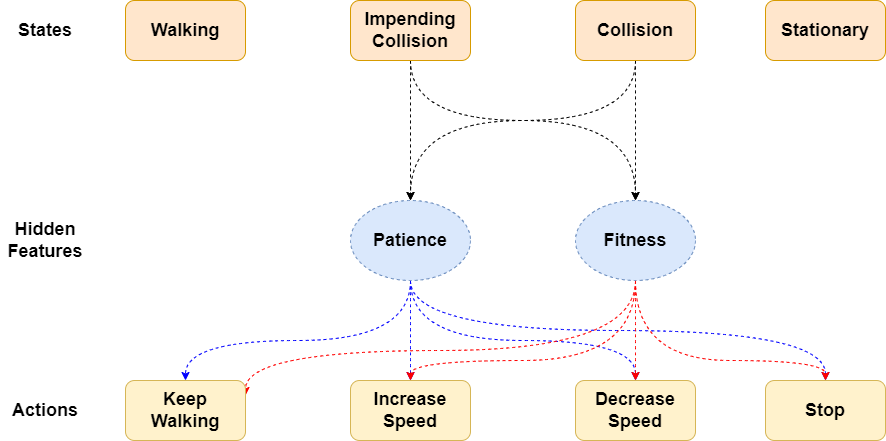

3.   Reinforcement Learning over an HMM. [Agent based Approach]
> Realistic and unpredictable. Time taking to implement and a larger codebase to debug for a full fledged model.


## Our Markov Decision Process Definition
is a 3-tuple (S,A,H), where:


*   S is a set of states called the state space,
*   A is a set of actions called the action space (alternatively, A_s is the set of actions available from state s)
*   H is the hidden feature space of each individual or particle or point.

*From here on, we treat individuals as particles*

### Flow of the Algorithm:


1.   Initialize random number of particles(for now ≤ 5) with their random hidden features. Each feature can take a value 𝛜 [0, 1].
2.   Initialize a bounded random velocity and acceleration based on the value of taken by the hidden feature: Fitness
3.   Run for 100 secs. And during these 100 seconds, maintain in what state each particle is in, i.e, Walking, Impending Collision, Collision and Stationary.
4.   When particles move from walking or stationary to impending collision state( || x1 - x2 || < ϵ ), then the model flows to an action and that action is implemented on the respective particle's model.
5.  See what happens.

### Intricacies: 🧐



1.   All Particles start in a 10x10 box around origin.
2.   There are 3 types of people: Slow, average and fast movers.
3.   Maintaining a master hashmap containing each individuals overall profile.
4.   Patience transition probabilities are random as patience is a broad term and different people have different levels of patience; (defining a level is also weird here, so absolutely random is a **good assumption**) 



# 1 --------------
Now plotting...


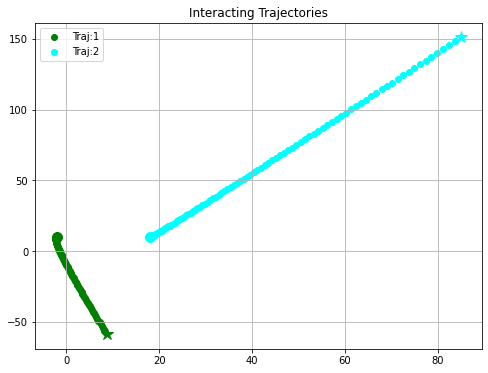

# 21 --------------
Now plotting...


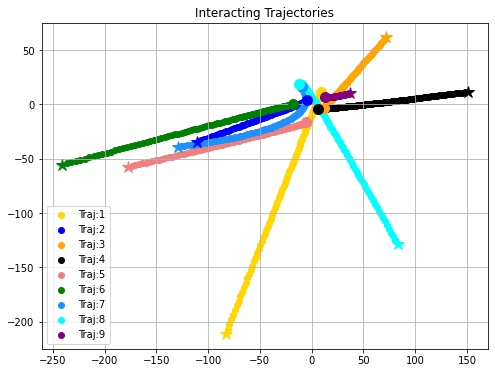

# 41 --------------
Now plotting...


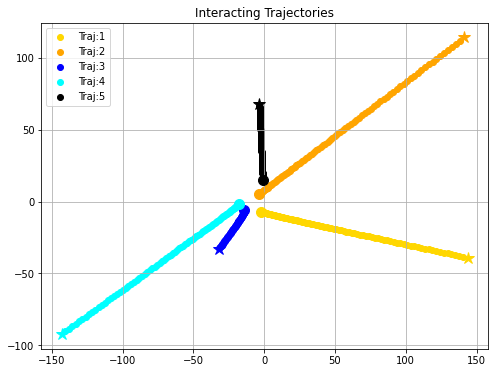

# 61 --------------
Now plotting...


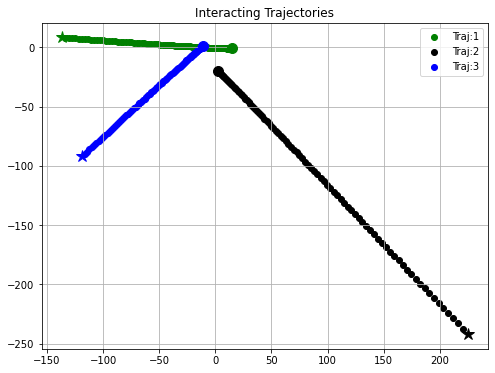

# 81 --------------
Now plotting...


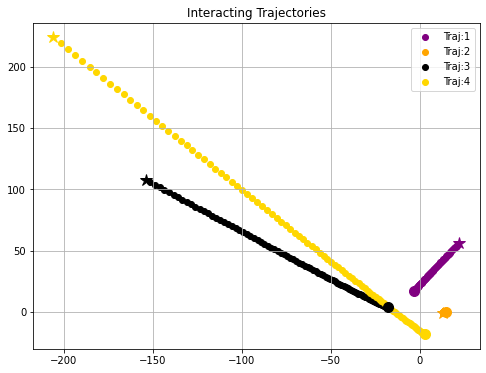

Real Execution Time: 3.0377371311187744 seconds
2


In [ ]:
import time

start_now = time.time()


def rand_negative(arr):
  negative = np.random.randint(2, size=2)
  if negative[0]:
    arr[0] *= -1
  if negative[1]:
    arr[1] *= -1
  return arr

def nextPoint(u, a, xk):
  return np.array(xk + u + 0.5 * a)


def plot_interaction(trajs):
  colors_lst = ['blue', 'red', 'green', 'black', 'purple', 'orange', 
                'gold', 'lightcoral', 'dodgerblue', 'aqua']
  random.shuffle(colors_lst)
  fig = plt.figure(figsize=(8,6))
  
  for i in range(len(trajs)):
    x = [e[0] for e in trajs[i]]
    y = [e[1] for e in trajs[i]]
    plt.plot(x[0], y[0], color=colors_lst[i], marker='o', markersize=10)
    plt.plot(x[-1], y[-1], color=colors_lst[i], marker='*', markersize=12)
    plt.scatter(x[1:-1],y[1:-1], color=colors_lst[i], label=f'Traj:{i+1}')
  
  plt.title("Interacting Trajectories")
  plt.grid(True)
  plt.legend()
  plt.show()

N_interaction = 100
MOD_VAL3 = 20
traj_indep = {}

for dataPoint_num in range(N_interaction):
  if dataPoint_num % MOD_VAL3 == 0:
    print(f"# {dataPoint_num+1} --------------")
  num_particles = np.random.randint(2,high=np.random.randint(3, high=11))
  #print(f"People in this scene: {num_particles}")

  trajs = []
  # States
  walking = np.zeros(num_particles)
  impending_collision = np.zeros(num_particles)
  collision = np.zeros(num_particles)
  
  # Assign IDs, fitness and patience scores to particles
  # id: [patience, fitness] 
  particle_profile = dict()
  
  # Define our particles fully with state-hidden_feature-action mapping!  
  for i in range(num_particles):
    trajs.append([])
    particle_profile[i] = {'patience' : np.random.rand() , 'fitness': np.random.rand()}
    
    if particle_profile[i]['fitness'] <= 0.1:                                   # Slow Movers --> Others will have to avoid them 
      walking[i] = 1
      #print(f"Person {i+1} : SLOW")
      x0 = np.random.randint(-20,high=20, size=2) 
      particle_profile[i]['x0'] = x0
      trajs[i].append(x0)
      particle_profile[i]['u'] = rand_negative(0.03*np.random.rand(2))
      particle_profile[i]['acc'] = rand_negative(0.01*np.random.rand(2))

      # Slow walker -- More inertia -- Will rarely increase speed => P('increase') ~ 0
      fitness_Ps = np.array([0.04*np.random.rand(), 0.43*np.random.rand(), 0.43*np.random.rand(), 0.1*np.random.rand()])
      fitness_Ps /= np.sum(fitness_Ps)
      patience_Ps = np.random.rand(4)
      patience_Ps /= np.sum(patience_Ps)
      particle_profile[i]['action_Ps'] = {'increase' : [patience_Ps[0],fitness_Ps[0]], 
                                          'decrease': [patience_Ps[1], fitness_Ps[1]], 
                                          'stop': [patience_Ps[2],fitness_Ps[2]], 
                                          'unchanged': [patience_Ps[3], fitness_Ps[3]]}

    elif particle_profile[i]['fitness'] <= 0.6:                                 # Moderate Movers --> Average Individual
      walking[i] = 1
      #print(f"Person {i+1} : AVERAGE")
      x0 = np.random.randint(-20,high=20, size=2)
      particle_profile[i]['x0'] = x0
      trajs[i].append(x0) 
      particle_profile[i]['u'] = rand_negative(0.05*np.random.rand(2))
      particle_profile[i]['acc'] = rand_negative(0.03*np.random.rand(2))
      
      # Absolutely random for an average walker
      fitness_Ps = np.random.rand(4)
      fitness_Ps /= np.sum(fitness_Ps)
      patience_Ps = np.random.rand(4)
      patience_Ps /= np.sum(patience_Ps)
      particle_profile[i]['action_Ps'] = {'increase' : [patience_Ps[0],fitness_Ps[0]], 
                                          'decrease': [patience_Ps[1],fitness_Ps[1]], 
                                          'stop': [patience_Ps[2], fitness_Ps[2]], 
                                          'unchanged': [patience_Ps[3], fitness_Ps[3]]}

    else:                                                                       # Runner --> Extremely Fit
      walking[i] = 1
      #print(f"Person {i+1} : FAST")
      x0 =  np.random.randint(-20,high=20, size=2)
      particle_profile[i]['x0'] = x0
      trajs[i].append(x0)  
      particle_profile[i]['u'] = rand_negative(0.07*np.random.rand(2))
      particle_profile[i]['acc'] = rand_negative(0.05*np.random.rand(2))

      # Fast mover -> Will rarely stop; Less chance to increase but not zero; Decrease good chance; Unchanged heavy chance
      fitness_Ps = [0.1*np.random.rand(), 0.4*np.random.rand(), 0.05*np.random.rand(), 0.45*np.random.rand()]
      fitness_Ps /= np.sum(fitness_Ps)
      patience_Ps = np.random.rand(4)
      patience_Ps /= np.sum(patience_Ps)
      particle_profile[i]['action_Ps'] = {'increase' : [patience_Ps[0], fitness_Ps[0]], 
                                          'decrease': [patience_Ps[1], fitness_Ps[1]], 
                                          'stop': [patience_Ps[2], fitness_Ps[2]], 
                                          'unchanged': [patience_Ps[3], fitness_Ps[3]]}
    #print(trajs)
  
  #print(f"[+] All persons created successfully.")


  impending_collision_threshold = 2   # radius of2 units -> switch on the personality of the particle and let it be intelligent!
  collision_threshold = 0.5

  '''
  def nextPoint(u, a, xk):
    return np.array(xk + u + 0.5 * a)

  if within_threshold:
    Turn on impending_collision state and retrieve an action based on the rule:
      chosen_action = argmax{0.5*Patience*corresponding_actionP + 0.5*Fitness*corresponding_actionP}
      Apply that action.

  if collision:
    increase stopping and slowing probabilities at the cost of fitness, i.e., 
    patience_stop += eps_1 and patience_decrease += eps_2
    patience_unchanged -= eps_1 and patience_decrease -= eps_2
    (These actions appear to be complementary and hence the exact reduction)
  '''


  def check_acc_sign(component, id):
    if particle_profile[id]['acc'][component] <= 0:
      return -1
    else:
      return 1 


  def parse_action_id(num):
    if num == 0:
      return 'increase'
    elif num == 1:
      return 'decrease'
    elif num == 2:
      return 'stop'
    elif num == 3:
      return 'unchanged'
    else:
      print(f"Received wrong input: {num}\n")


  def get_action_of(k):
    c1 = 0.5*particle_profile[k]['patience']
    patienceScores = np.array([c1*val[0] for key, val in particle_profile[k]['action_Ps'].items()])
    c2 = 0.5*particle_profile[k]['fitness']
    fitnessScores = np.array([c2*val[1] for key, val in particle_profile[k]['action_Ps'].items()])
    action_index = np.argmax(patienceScores+fitnessScores)
    #print(f"----------- {k+1}'s Belief sytem made them choose: {parse_action_id(action_index)} -----------")
    return action_index


  def check_for_impending_and_collision(time):
    for i in range(num_particles):
      for j in range(i+1, num_particles):
        dist_ij = np.linalg.norm(particle_profile[i]['x0'] - particle_profile[j]['x0'])
        #print(f"At {time}:: d({i},{j}): {dist_ij}")
        if dist_ij <= collision_threshold:
          collision[i] = 1
          collision[j] = 1
        elif dist_ij <= impending_collision_threshold:
          impending_collision[i] = 1
          impending_collision[j] = 1

    #print(f"[IN]\ncollision List: {collision}\nimpending_collision List: {impending_collision}")

  for t in range(1, 100):
    for i in range(num_particles):
      particle_profile[i]['x0'] = nextPoint(particle_profile[i]['u'], particle_profile[i]['acc'], particle_profile[i]['x0'])
      particle_profile[i]['u'] += particle_profile[i]['acc']
      trajs[i].append(particle_profile[i]['x0'])

    check_for_impending_and_collision(t)
    #print(f"[OUT]\ncollision List: {collision}\nimpending_collision List: {impending_collision}")
    
    # If collision has happened, then change your belief system and start with 1/2 the velocity & acceleration!
    for p in range(len(collision)):
      if collision[p] > 0.9:
        #print(f"\nAt t: {t} ----> {p+1} Collided!!!\n{p+1} now has a higher tendency to decrease/stop.\n")
        eps1, eps2 = 0.1*np.random.rand(2)
        for key, val in particle_profile[p]['action_Ps'].items():
          if key is 'stop':
            val += eps1
          elif key is 'decrease':
            val += eps2
          elif key is 'increase':
            val -= eps2
          elif key is 'unchanged':
            val -= eps1
      
      collision[p] = 0

    # If impending collision, need to take an action based on your belief system!
    for itr in range(len(impending_collision)):
      if impending_collision[itr] > 0.8:

        #print(f"At t: {t} ----> {itr+1} has impending_collision")
        agent_action_id = get_action_of(itr)
        
        if agent_action_id == 3: # unchanged
          continue
        
        elif agent_action_id == 0: # increase: speed bump to particle itr; no change to acc.
          #print(f"Old u: {particle_profile[itr]['u']}")
          #print(f"a: {particle_profile[itr]['acc']}")
          particle_profile[itr]['u'][0] += np.random.rand()*check_acc_sign(0, itr)
          particle_profile[itr]['u'][1] += np.random.rand()*check_acc_sign(1, itr)
          #print(f"New u: {particle_profile[itr]['u']}")

        elif agent_action_id == 1: # decrease: reduce velocity of 
          #print(f"Old u: {particle_profile[itr]['u']}")
          #print(f"Old a: {particle_profile[itr]['acc']}")
          particle_profile[itr]['u'][0] -= np.random.rand()*check_acc_sign(0, itr)
          particle_profile[itr]['u'][1] -= np.random.rand()*check_acc_sign(1, itr)
          #print(f"New u: {particle_profile[itr]['u']}")
        
        elif agent_action_id == 2: # stop: since walking is a slow sport we change velocity to [-0.05 , 0.05] -> that of a slow mover
          #print(f"Old u: {particle_profile[itr]['u']}")
          #print(f"Old a: {particle_profile[itr]['acc']}")
          particle_profile[itr]['u'] = rand_negative(np.array([0.001, 0.001]))
          #print(f"New u: {particle_profile[itr]['u']}")
          #print(f"New a: {particle_profile[itr]['acc']}")

        impending_collision[itr] = 0 # IMP: Don't want to take multiple actions.
  
  traj_indep[dataPoint_num] = trajs

  if dataPoint_num % MOD_VAL3 == 0:
    print(f"Now plotting...")
    plot_interaction(trajs)
    #print(f"----------------------------------------------------------------------------------------------")

end = time.time()
print(f"Real Execution Time: {end - start_now} seconds")

print(len(traj_indep[0]))

In [ ]:
for key, val in traj_indep.items():
  val = np.array(val)
  print(key, val.shape)
#print(traj_indep[0][0][0])
# Sample Num, Person ID, Time

0 (2, 100, 2)
1 (5, 100, 2)
2 (2, 100, 2)
3 (2, 100, 2)
4 (2, 100, 2)
5 (3, 100, 2)
6 (3, 100, 2)
7 (3, 100, 2)
8 (2, 100, 2)
9 (3, 100, 2)
10 (4, 100, 2)
11 (8, 100, 2)
12 (2, 100, 2)
13 (7, 100, 2)
14 (2, 100, 2)
15 (2, 100, 2)
16 (5, 100, 2)
17 (3, 100, 2)
18 (3, 100, 2)
19 (2, 100, 2)
20 (8, 100, 2)
21 (5, 100, 2)
22 (2, 100, 2)
23 (3, 100, 2)
24 (2, 100, 2)
25 (3, 100, 2)
26 (4, 100, 2)
27 (3, 100, 2)
28 (8, 100, 2)
29 (8, 100, 2)
30 (9, 100, 2)
31 (3, 100, 2)
32 (2, 100, 2)
33 (2, 100, 2)
34 (2, 100, 2)
35 (2, 100, 2)
36 (2, 100, 2)
37 (4, 100, 2)
38 (6, 100, 2)
39 (2, 100, 2)
40 (8, 100, 2)
41 (6, 100, 2)
42 (3, 100, 2)
43 (9, 100, 2)
44 (2, 100, 2)
45 (2, 100, 2)
46 (4, 100, 2)
47 (2, 100, 2)
48 (6, 100, 2)
49 (5, 100, 2)
50 (5, 100, 2)
51 (7, 100, 2)
52 (4, 100, 2)
53 (3, 100, 2)
54 (5, 100, 2)
55 (2, 100, 2)
56 (5, 100, 2)
57 (8, 100, 2)
58 (6, 100, 2)
59 (2, 100, 2)
60 (6, 100, 2)
61 (3, 100, 2)
62 (5, 100, 2)
63 (4, 100, 2)
64 (3, 100, 2)
65 (4, 100, 2)
66 (2, 100, 2)
67 (2

In [ ]:
dataBatched_int = []
print("Making batches...")
for batch in group_list(data_interaction, 512):
  #print(f"Created a batch! (Shape: {batch.shape})")
  dataBatched_int.append(batch)
print("------- ****** -------")
dataBatched_int = np.array(dataBatched_int, dtype=object)

'''
with open('dataset_M3_Interaction.npy', 'wb') as f:
  np.save(f, dataBatched_int) 
  f.close()
'''

Making batches...
------- ****** -------


## Clustering our Physics Synthetic and Stanford Dataset

In [ ]:
sdd_data = np.load('/content/stanford_drone_dataset.npy')
#our_data = np.load('/content/dataset_M1_Phy.npy', allow_pickle=True)
#our_data = np.vstack(our_data).astype(np.float)
#print("SDD: ",sdd_data.shape, sdd_data.dtype," | Ours: ", our_data.shape, our_data.dtype)

In [ ]:
def get_diff_vectors(traj):
  lst = []
  for i in range(1, len(traj)):
    lst.append([traj[i][0] - traj[i-1][0], traj[i][1] - traj[i-1][1]])
  return lst

def magnitude(arr):
  if isinstance(arr, int) or isinstance(arr, float):
    return arr
  return math.sqrt(sum([e**2 for e in arr]))

def compute_AbScore(x, y, obtuse, updated_= 0):
  #print(f"x: {x} | y: {y} | obtuse: {obtuse}")
  x_mag = magnitude(x)
  y_mag = magnitude(y)
  cross_prod = np.cross(x,y)
  #print(f"Cross Product: {cross_prod} k^")
  cross_prod_mag = abs(cross_prod)

  if x_mag == 0 or y_mag == 0:
    ang_multiplier = 0
  else:
    ang_multiplier = abs( 180 * math.asin(cross_prod_mag/(x_mag*y_mag)) / math.pi ) # in degrees
  #print(f"Angle between {x} and {y} is {ang_multiplier} degrees")

  ang_multiplier = math.ceil(ang_multiplier/10)
  if obtuse:
    ang_multiplier += 9
  #print(f"Corresponding angle multiplier: {ang_multiplier}")
    
  if updated_ == 1: # updated abScore
    return ang_multiplier * math.sqrt(cross_prod_mag)
  elif updated_ == 2:
    return ang_multiplier

  score = ang_multiplier * cross_prod_mag
  #print(f"Contribution: {ang_multiplier} * {cross_prod_mag} = {score} to the total Abruptness Score.\n---------------------------------------------------------")

  return score

def get_abruptness_score(traj):
  v = get_diff_vectors(traj)
  abScore = 0
  for i in range(1, len(v)):
    '''
     a^2 + b^2 > c^2, then it is acute triangle --> Obtuse turn 
  '''
    obtuse = False
    if magnitude(v[i-1])**2 + magnitude(v[i])**2 > magnitude(traj[i+1]-traj[i-1])**2:
      obtuse = True
    abScore += compute_AbScore(v[i-1], v[i], obtuse)
  return abScore

def get_updated_abscore(traj):
  v = get_diff_vectors(traj)
  abScore = 0
  for i in range(1, len(v)):
    obtuse = False
    if magnitude(v[i-1])**2 + magnitude(v[i])**2 > magnitude(traj[i+1]-traj[i-1])**2:
      obtuse = True
    abScore += compute_AbScore(v[i-1], v[i], obtuse, updated_=1)
  return abScore

def get_turn_score(traj):
  v = get_diff_vectors(traj)
  abScore = 0
  for i in range(1, len(v)):
    obtuse = False
    if magnitude(v[i-1])**2 + magnitude(v[i])**2 > magnitude(traj[i+1]-traj[i-1])**2:
      obtuse = True
    abScore += compute_AbScore(v[i-1], v[i], obtuse, updated_ = 2)
  return abScore

In [ ]:
def frobenious_norm(A): # Similar to L2 for vectors
  return np.linalg.norm(A, ord='fro')

def Linf_norm(A): # Max sum of rows
  return np.linalg.norm(A, ord=np.inf)

def L2_norm(A): # largest singular value
  return np.linalg.norm(A, ord=2)

def L1_norm(A): # Max sum of columns
  return np.linalg.norm(A, ord=1)

In [ ]:
updated_abScores_sdd = []
turn_scores_sdd = []
abScores_sdd = []
outlier_trajectories_sdd = []
upd_outlier_trajectories_sdd = []
turn_outliers = []
outlier_cnt = 0
outlier_cnt2 = 0
outlier_cnt3 = 0

for traj in sdd_data:
  turn_score = get_turn_score(traj)
  updated_this_abScore = get_updated_abscore(traj)
  this_abScore = get_abruptness_score(traj)
  
  if this_abScore >= 40000:
    outlier_cnt += 1
    outlier_trajectories_sdd.append(traj)

  if updated_this_abScore >= 1750:
    outlier_cnt2 += 1
    upd_outlier_trajectories_sdd.append(traj)

  if turn_score >= 80:
    outlier_cnt3 += 1
    turn_outliers.append(traj)
  
  abScores_sdd.append(this_abScore)
  updated_abScores_sdd.append(updated_this_abScore)
  turn_scores_sdd.append(turn_score)
  
'''
updated_abScores_ours = []
turn_scores_ours = []
abScores_ours = []

for traj in our_data:
  abScores_ours.append(get_abruptness_score(traj))
  updated_abScores_ours.append(get_updated_abscore(traj))
  turn_scores_ours.append(get_turn_score(traj))
'''
print(f"SDD Outliers Cnt: {outlier_cnt}\nSDD Updated Score Outliers' Cnt: {outlier_cnt2}\nTurn Score Outliers: {outlier_cnt3}")

SDD Outliers Cnt: 18
SDD Updated Score Outliers' Cnt: 10
Turn Score Outliers: 12


In [ ]:
def oneD_dist_plots(sdd, ours, titleStr):
  fig_nonLinearity = plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  plt.scatter(ours, np.zeros(len(ours)), color='red', alpha=0.7)
  plt.title("Ours")
  plt.grid(True)

  plt.subplot(1,2,2)
  plt.scatter(sdd, np.zeros(len(sdd)), color='dodgerblue')
  plt.title("SDD")
  plt.suptitle(titleStr)
  plt.grid(True)

  plt.show()

print("-----------------------------------------------------------------------------------------")
oneD_dist_plots(abScores_sdd, abScores_ours, 'Original AbScore Distribution')
print("-----------------------------------------------------------------------------------------")
oneD_dist_plots(updated_abScores_sdd, updated_abScores_ours, 'Updated AbScore Distribution')
print("-----------------------------------------------------------------------------------------")
oneD_dist_plots(turn_scores_sdd, turn_scores_ours, 'Turn Score Distribution')
print("-----------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------


NameError: ignored

In [ ]:
### Plot any trajectory using plot_circuit(traj, title)

#for traj in outlier_trajectories_sdd:
#  plot_circuit(traj, f"AbScore: {get_abruptness_score(traj)}")

print("---------------------------------------------------------------------------------------------")

#for traj in upd_outlier_trajectories_sdd:
#  plot_circuit(traj, f"Updated AbScore: {get_updated_abscore(traj)}")

print("---------------------------------------------------------------------------------------------")

#for traj in turn_outliers:
#  plot_circuit(traj, f"Turn Score: {get_turn_score(traj)}")

---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------


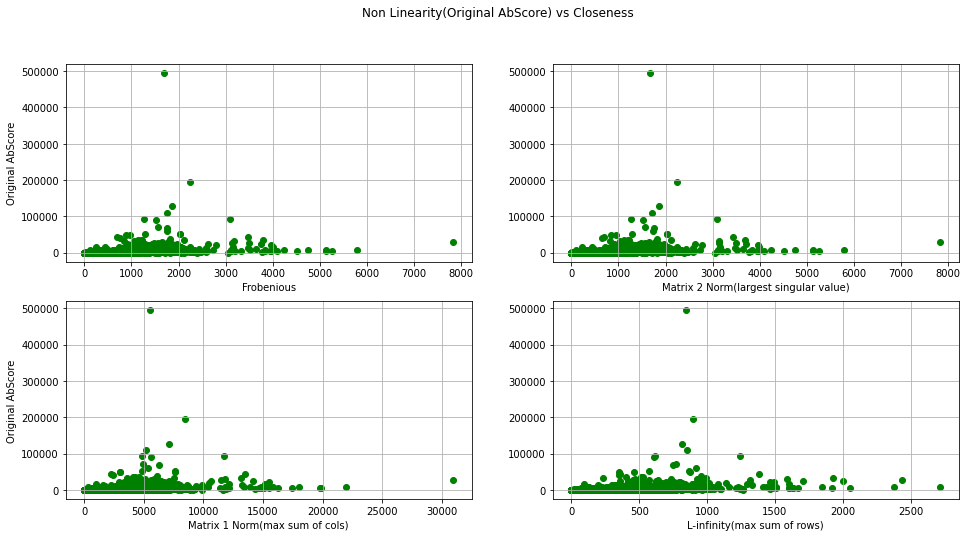

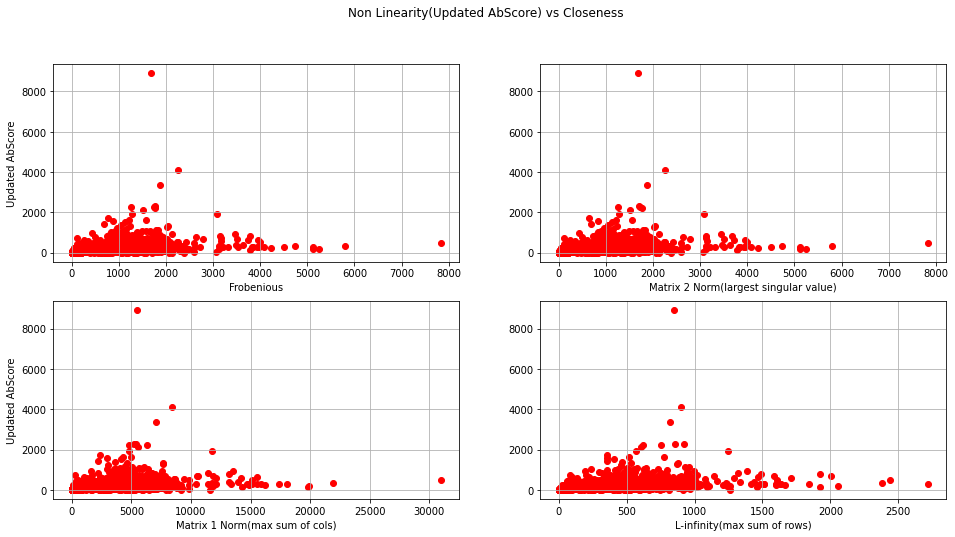

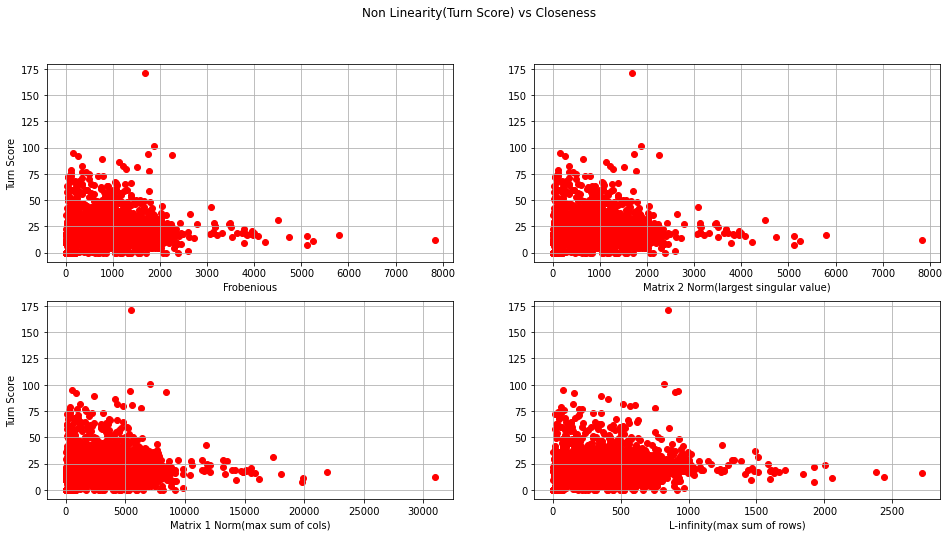

In [ ]:
frobN_traj = []
L2N = []
L1N = []
LinfN = []
for traj in sdd_data:
  frobN_traj.append(frobenious_norm(traj))
  L2N.append(L2_norm(traj))
  L1N.append(L1_norm(traj))
  LinfN.append(Linf_norm(traj))

def plot_madness(abScores_sdd_x, frobN_traj, L2N, L1N, LinfN, yAxis_title):
  colors = ['red', 'green', 'purple', 'gold', 'dodgerblue']
  random.shuffle(colors)
  fig_NLvsCloseness = plt.figure(figsize=(16, 8))

  plt.subplot(2,2,1)
  plt.scatter(frobN_traj, abScores_sdd_x, color=colors[0])
  #plt.plot(np.arange(8000), [80]*8000, color='black', linewidth=2)
  plt.ylabel(yAxis_title)
  plt.xlabel("Frobenious")
  plt.grid(True)

  plt.subplot(2,2,2)
  plt.scatter(L2N, abScores_sdd_x, color=colors[0])
  plt.xlabel("Matrix 2 Norm(largest singular value)")
  #plt.plot(np.arange(8000), [80]*8000, color='black', linewidth=2)
  plt.grid(True)

  plt.subplot(2,2,3)
  plt.scatter(L1N, abScores_sdd_x, color=colors[0])
  plt.ylabel(yAxis_title)
  plt.xlabel("Matrix 1 Norm(max sum of cols)")
  #plt.plot(np.arange(30000), [80]*30000, color='black', linewidth=2)
  plt.grid(True)

  plt.subplot(2,2,4)
  plt.scatter(LinfN, abScores_sdd_x, color=colors[0])
  plt.xlabel("L-infinity(max sum of rows)")
  #plt.plot(np.arange(8000), [80]*8000, color='black', linewidth=2)
  plt.grid(True)

  plt.suptitle(f"Non Linearity({yAxis_title}) vs Closeness")

  plt.show()

plot_madness(abScores_sdd, frobN_traj, L2N, L1N, LinfN, 'Original AbScore')
print("\n\n\n")
plot_madness(updated_abScores_sdd, frobN_traj, L2N, L1N, LinfN, 'Updated AbScore')
print("\n\n\n")
plot_madness(turn_scores_sdd, frobN_traj, L2N, L1N, LinfN, 'Turn Score')

In [ ]:
import statistics
import math
print(f"----------------- SDD Original AbScore Analysis ----------------------")
print(f"Max: {max(abScores_sdd)}\nMin: {min(abScores_sdd)}\nMean: {sum(abScores_sdd)/len(abScores_sdd)}")
#print(f"Var: {statistics.variance(abScores_sdd)}")
print(f"Std: {math.sqrt(statistics.variance(abScores_sdd))}")

print(f"----------------- SDD Updated AbScore Analysis ----------------------")
print(f"Max: {max(updated_abScores_sdd)}\nMin: {min(updated_abScores_sdd)}\nMean: {sum(updated_abScores_sdd)/len(updated_abScores_sdd)}")
#print(f"Var: {statistics.variance(updated_abScores_sdd)}")
print(f"Std: {math.sqrt(statistics.variance(updated_abScores_sdd))}")

print(f"----------------- SDD Turn Score Analysis ----------------------")
print(f"Max: {max(turn_scores_sdd)}\nMin: {min(turn_scores_sdd)}\nMean: {sum(turn_scores_sdd)/len(turn_scores_sdd)}")
#print(f"Var: {statistics.variance(turn_scores_sdd)}")
print(f"Std: {math.sqrt(statistics.variance(turn_scores_sdd))}")

print(f"\n----------------- Ours AbScore Analysis ----------------------")
print(f"Max: {max(abScores_ours)}\nMin: {min(abScores_ours)}\nMean: {sum(abScores_ours)/len(abScores_ours)}")
print(f"Var: {statistics.variance(abScores_ours)}")
print(f"Std: {math.sqrt(statistics.variance(abScores_ours))}")

----------------- SDD Original AbScore Analysis ----------------------
Max: 494866.37340000004
Min: 0.0
Mean: 3430.6653818916607
Std: 11987.341296105073
----------------- SDD Updated AbScore Analysis ----------------------
Max: 8915.726911387588
Min: 0.0
Mean: 201.48020857570629
Std: 288.29383007974604
----------------- SDD Turn Score Analysis ----------------------
Max: 171
Min: 0
Mean: 18.585719335454225
Std: 14.44913116641757

----------------- Ours AbScore Analysis ----------------------
Max: 24033.320328725116
Min: 0.013191782326671841
Mean: 3357.159465270102
Var: 15624325.801291931
Std: 3952.7617941500007


#### [Priority 4] Hierarchical Clustering

**Thresholds:**   


1.   Original AbScore: *4000*
2.   Updated AbScore: *1750*
3.   Turn Score: *80*

**Clustering 1D data => cKMeans.dp.3d**

In [ ]:
def ssq(j, i, sum_x, sum_x_sq):
    if (j > 0):
        muji = (sum_x[i] - sum_x[j-1]) / (i - j + 1)
        sji = sum_x_sq[i] - sum_x_sq[j-1] - (i - j + 1) * muji ** 2
    else:
        sji = sum_x_sq[i] - sum_x[i] ** 2 / (i+1)

    return 0 if sji < 0 else sji

def fill_row_k(imin, imax, k, S, J, sum_x, sum_x_sq, N):
    if imin > imax: return

    i = (imin+imax) // 2
    S[k][i] = S[k-1][i-1]
    J[k][i] = i

    jlow = k

    if imin > k:
        jlow = int(max(jlow, J[k][imin-1]))
    jlow = int(max(jlow, J[k-1][i]))

    jhigh = i-1
    if imax < N-1:
        jhigh = int(min(jhigh, J[k][imax+1]))

    for j in range(jhigh, jlow-1, -1):
        sji = ssq(j, i, sum_x, sum_x_sq)

        if sji + S[k-1][jlow-1] >= S[k][i]: break

        # Examine the lower bound of the cluster border
        # compute s(jlow, i)
        sjlowi = ssq(jlow, i, sum_x, sum_x_sq)

        SSQ_jlow = sjlowi + S[k-1][jlow-1]

        if SSQ_jlow < S[k][i]:
            S[k][i] = SSQ_jlow
            J[k][i] = jlow

        jlow += 1

        SSQ_j = sji + S[k-1][j-1]
        if SSQ_j < S[k][i]:
            S[k][i] = SSQ_j
            J[k][i] = j

    fill_row_k(imin, i-1, k, S, J, sum_x, sum_x_sq, N)
    fill_row_k(i+1, imax, k, S, J, sum_x, sum_x_sq, N)

def fill_dp_matrix(data, S, J, K, N):
    sum_x = np.zeros(N, dtype=np.float_)
    sum_x_sq = np.zeros(N, dtype=np.float_)

    # median. used to shift the values of x to improve numerical stability
    shift = data[N//2]

    for i in range(N):
        if i == 0:
            sum_x[0] = data[0] - shift
            sum_x_sq[0] = (data[0] - shift) ** 2
        else:
            sum_x[i] = sum_x[i-1] + data[i] - shift
            sum_x_sq[i] = sum_x_sq[i-1] + (data[i] - shift) ** 2

        S[0][i] = ssq(0, i, sum_x, sum_x_sq)
        J[0][i] = 0

    for k in range(1, K):
        if (k < K-1):
            imin = max(1, k)
        else:
            imin = N-1

        fill_row_k(imin, N-1, k, S, J, sum_x, sum_x_sq, N)

def ckmeans(data, n_clusters):
    if n_clusters <= 0:
        raise ValueError("Cannot classify into 0 or less clusters")
    if n_clusters > len(data):
        raise ValueError("Cannot generate more classes than there are data values")

    # if there's only one value, return it; there's no sensible way to split
    # it. This means that len(ckmeans([data], 2)) may not == 2. Is that OK?
    unique = len(set(data))
    if unique == 1:
        return [data]

    data.sort()
    n = len(data)

    S = np.zeros((n_clusters, n), dtype=np.float_)

    J = np.zeros((n_clusters, n), dtype=np.uint64)

    fill_dp_matrix(data, S, J, n_clusters, n)

    clusters = []
    cluster_right = n-1

    for cluster in range(n_clusters-1, -1, -1):
        cluster_left = int(J[cluster][cluster_right])
        clusters.append(data[cluster_left:cluster_right+1])

        if cluster > 0:
            cluster_right = cluster_left - 1

    return list(reversed(clusters))

In [ ]:
for_orig = []
for_upd = []
for_turn = []

for i in range(len(sdd_data)):
  traj = sdd_data[i]
  if get_abruptness_score(traj) >= 40000:
    for_orig.append(i)
  if get_updated_abscore(traj) >= 1750:
    for_upd.append(i)
  if get_turn_score(traj) >= 80:
    for_turn.append(i)  

#clusters: 1 | expected: 1
Cluster 0 has len: 2811
#clusters: 2 | expected: 2
Cluster 0 has len: 1247
Cluster 1 has len: 1564
#clusters: 3 | expected: 3
Cluster 0 has len: 902
Cluster 1 has len: 1118
Cluster 2 has len: 791
#clusters: 4 | expected: 4
Cluster 0 has len: 878
Cluster 1 has len: 951
Cluster 2 has len: 952
Cluster 3 has len: 30
#clusters: 5 | expected: 5
Cluster 0 has len: 833
Cluster 1 has len: 660
Cluster 2 has len: 798
Cluster 3 has len: 490
Cluster 4 has len: 30
#clusters: 6 | expected: 6
Cluster 0 has len: 800
Cluster 1 has len: 521
Cluster 2 has len: 603
Cluster 3 has len: 605
Cluster 4 has len: 252
Cluster 5 has len: 30


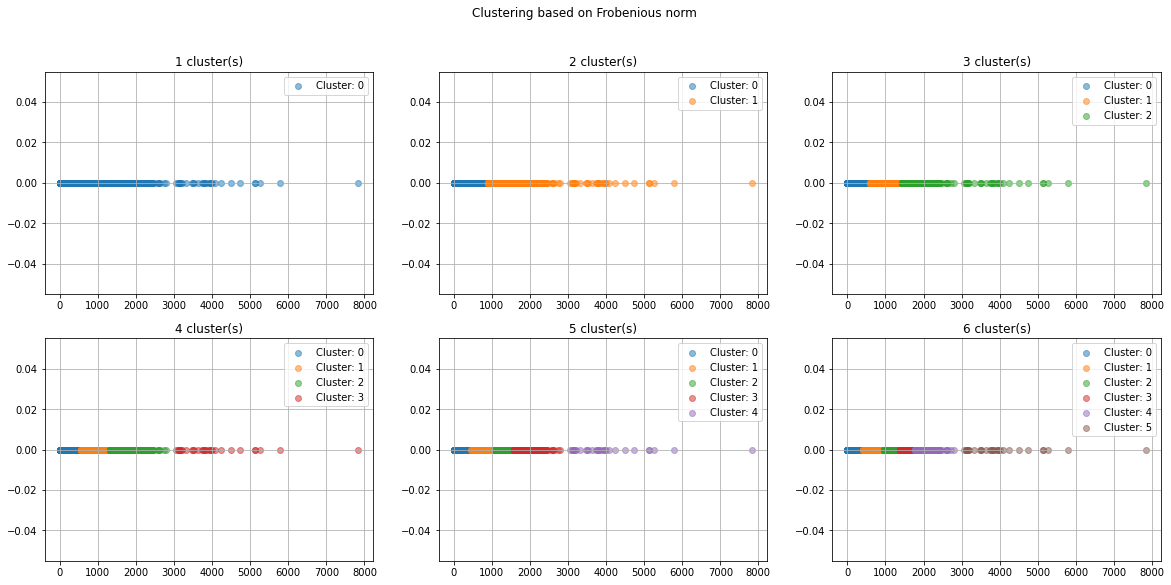

In [ ]:
fig_ckmeans = plt.figure(figsize=(20,9))
for i in range(1,7):
  res = ckmeans([frobN_traj[a] for a in range(len(sdd_data)) if a not in for_orig], i)
  print(f"#clusters: {len(res)} | expected: {i}")

  plt.subplot(2,3,i)
  done = 0
  for j in range(len(res)):
    print(f"Cluster {j} has len: {len(res[j])}")
    plt.scatter(res[j], np.zeros(len(res[j])), label=f"Cluster: {j}", alpha=0.5)
    #plt.plot([sorted(frobN_traj)[done+len(res[j])-1]]*10, np.arange(10), color='black')
    done += len(res[j])-1
  plt.grid(True)
  plt.legend()
  plt.title(f"{i} cluster(s)")
  
plt.suptitle("Clustering based on Frobenious norm")
plt.show()

#### Clusters: 4 | expected: 4
Cluster 0 has len: 878    
Cluster 1 has len: 951   
Cluster 2 has len: 952   
Cluster 3 has len: 30   

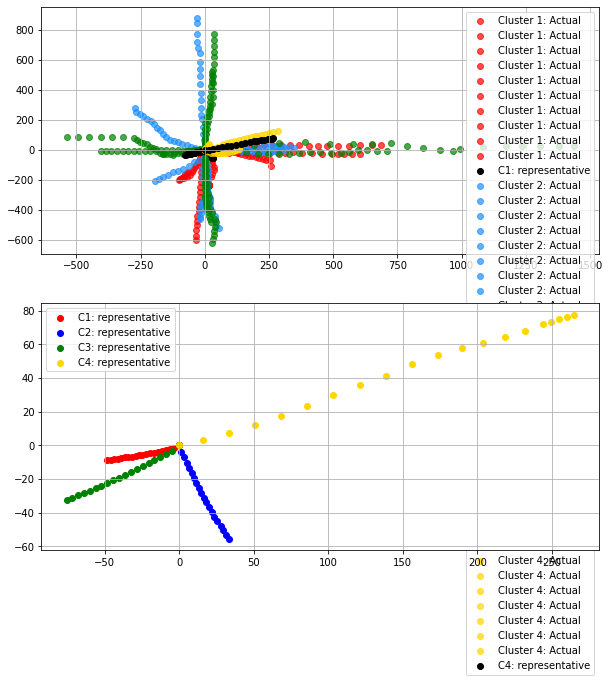

In [ ]:
clean_sdd_data = [sdd_data[a] for a in range(len(sdd_data)) if a not in for_orig] 

# Ind Range :: Cluster Num (size)
# 0 - 877: Cl1  (878)
# 878 - 1828: Cl2 (951)
# 1829 - 2780: Cl3 (952)
# 2781 - 2810: Cl4 (30)

mean_cl1 = sum(sdd_data[:878])/878
mean_cl2 = sum(sdd_data[878:1829])/951
mean_cl3 = sum(sdd_data[1829:2781])/952
mean_cl4 = sum(sdd_data[2781:])/30

chosen_c1 = np.random.randint(0, 878, size=10)
chosen_c2 = np.random.randint(878, 1829, size=10)
chosen_c3 = np.random.randint(1829, 2781, size=10)
chosen_c4 = np.random.randint(2781, 2811, size=10)

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
for r in chosen_c1:
  plt.scatter(sdd_data[r][:,0], sdd_data[r][:, 1], label='Cluster 1: Actual', color='red', alpha=0.7) 
plt.scatter(mean_cl1[:,0], mean_cl1[:,1], color='black', label="C1: representative")

for r in chosen_c2:
  plt.scatter(sdd_data[r][:,0], sdd_data[r][:, 1], label='Cluster 2: Actual', color='dodgerblue', alpha=0.7) 
plt.scatter(mean_cl2[:,0], mean_cl2[:,1], color='black', label="C2: representative")

for r in chosen_c3:
  plt.scatter(sdd_data[r][:,0], sdd_data[r][:, 1], label='Cluster 3: Actual', color='green', alpha=0.7) 
plt.scatter(mean_cl3[:,0], mean_cl3[:,1], color='black', label="C3: representative")

for r in chosen_c4:
  plt.scatter(sdd_data[r][:,0], sdd_data[r][:, 1], label='Cluster 4: Actual', color='gold', alpha=0.7) 
plt.scatter(mean_cl4[:,0], mean_cl4[:,1], color='black', label="C4: representative")
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.scatter(mean_cl1[:,0], mean_cl1[:,1], color='red', label="C1: representative")
plt.scatter(mean_cl2[:,0], mean_cl2[:,1], color='blue', label="C2: representative")
plt.scatter(mean_cl3[:,0], mean_cl3[:,1], color='green', label="C3: representative")
plt.scatter(mean_cl4[:,0], mean_cl4[:,1], color='gold', label="C4: representative")
plt.legend()
plt.grid(True)

plt.show()

Above clustering is indicative of radial boundedness of trajectories but not anything about two or more trajectories being similar

**Required Clustering Analysis Ahead:**

In [ ]:
num_clusters = 4

clusters = []
for i in range(num_clusters):
  clusters.append([])

asd = np.random.randint(0, 2811, size=num_clusters)
mean_trajs = [clean_sdd_data[i] for i in asd]

for i in range(num_clusters):
  clusters[i].append(mean_trajs[i])

#print(f"Initialized:\n{mean_trajs}")

for traj in clean_sdd_data:

  def recalculate_centers():
    for k in range(num_clusters):
      mean_trajs[k] = sum(clusters[k]) / len(clusters[k])

  dist = np.array([frobenious_norm(mean_trajs[i] - traj) for i in range(num_clusters)])
  #print(f"Dist Array: {dist}")
  least_dist_cluster = np.argmin(dist)

  #print(f"Assigned to C: {least_dist_cluster}\n------------------------------------------")
  clusters[least_dist_cluster].append(traj)
  recalculate_centers()

print('Done K-Means.')
clusters = np.array(clusters)
print(clusters.shape)

Done K-Means.
(4,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
sm = 10000 
for cluster in clusters:
  print(np.array(cluster).shape)
  sm = min(sm, np.array(cluster).shape[0])

(509, 20, 2)
(529, 20, 2)
(1381, 20, 2)
(396, 20, 2)


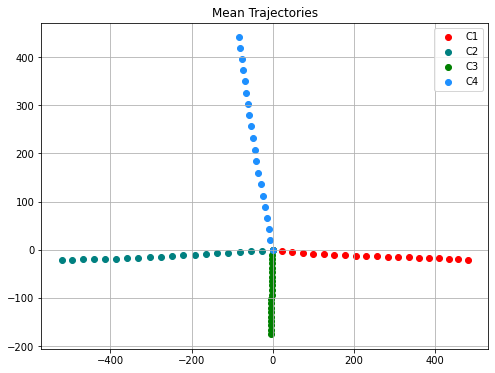

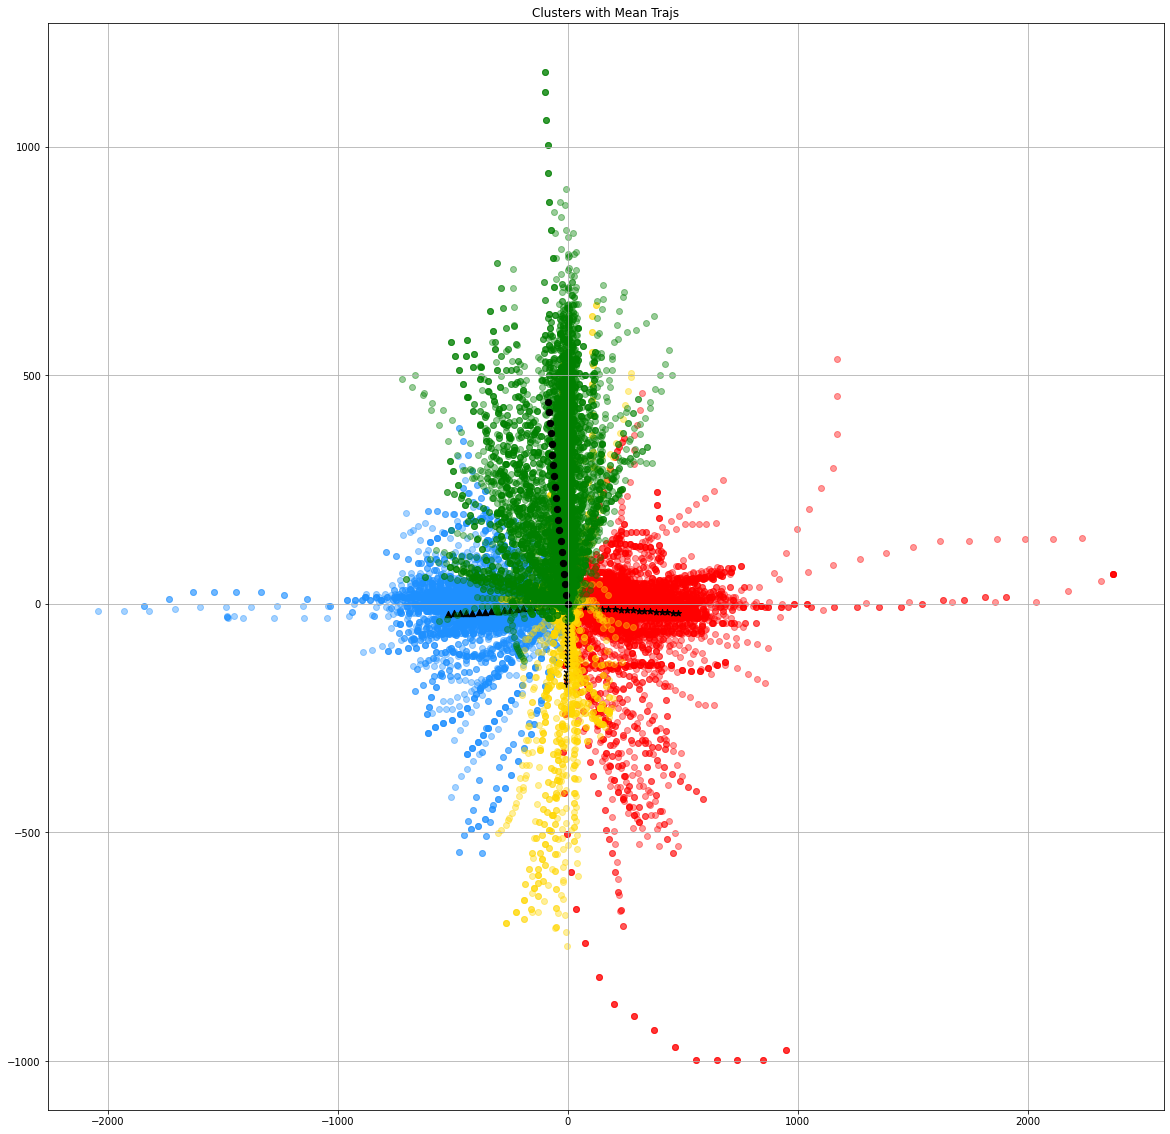

In [ ]:
mean_trajs = np.array(mean_trajs)

col_rdn = ['red', 'dodgerblue', 'gold', 'green', 'aqua', 'lightcoral', 'teal']
random.shuffle(col_rdn)
swad = plt.figure(figsize=(8,6))
for i in range(num_clusters): 
  plt.scatter(mean_trajs[i][:,0], mean_trajs[i][:,1], label=f"C{i+1}", color=col_rdn[i])
plt.grid(True)
plt.legend()
plt.title("Mean Trajectories")
plt.savefig('mean_traj.png')
plt.show()

choose_x = np.random.randint(0, sm, size=sm)
col = ['red', 'dodgerblue', 'gold', 'green', 'aqua']
wMark = ['*', 'o', '^', '+', 'P', 'v', '2', '1', '3', '4', 's']
random.shuffle(wMark)
swad_total = plt.figure(figsize=(20,20))
for r in range(num_clusters):
  for x in choose_x:
    plt.scatter(clusters[r][x][:,0], clusters[r][x][:, 1], label=f'Cluster {r+1}: Actual', color=col[r], alpha=0.4) 
  plt.scatter(mean_trajs[r][:,0], mean_trajs[r][:,1], color='black', label=f"C{r+1}: representative", s=40, marker=wMark[r])
#plt.legend() 
plt.title("Clusters with Mean Trajs")
plt.grid(True)
plt.savefig('clustering_result.png')
plt.show() 

## Gym Environment and DPG RL Agent

> For creating goal oriented intelligent agents  

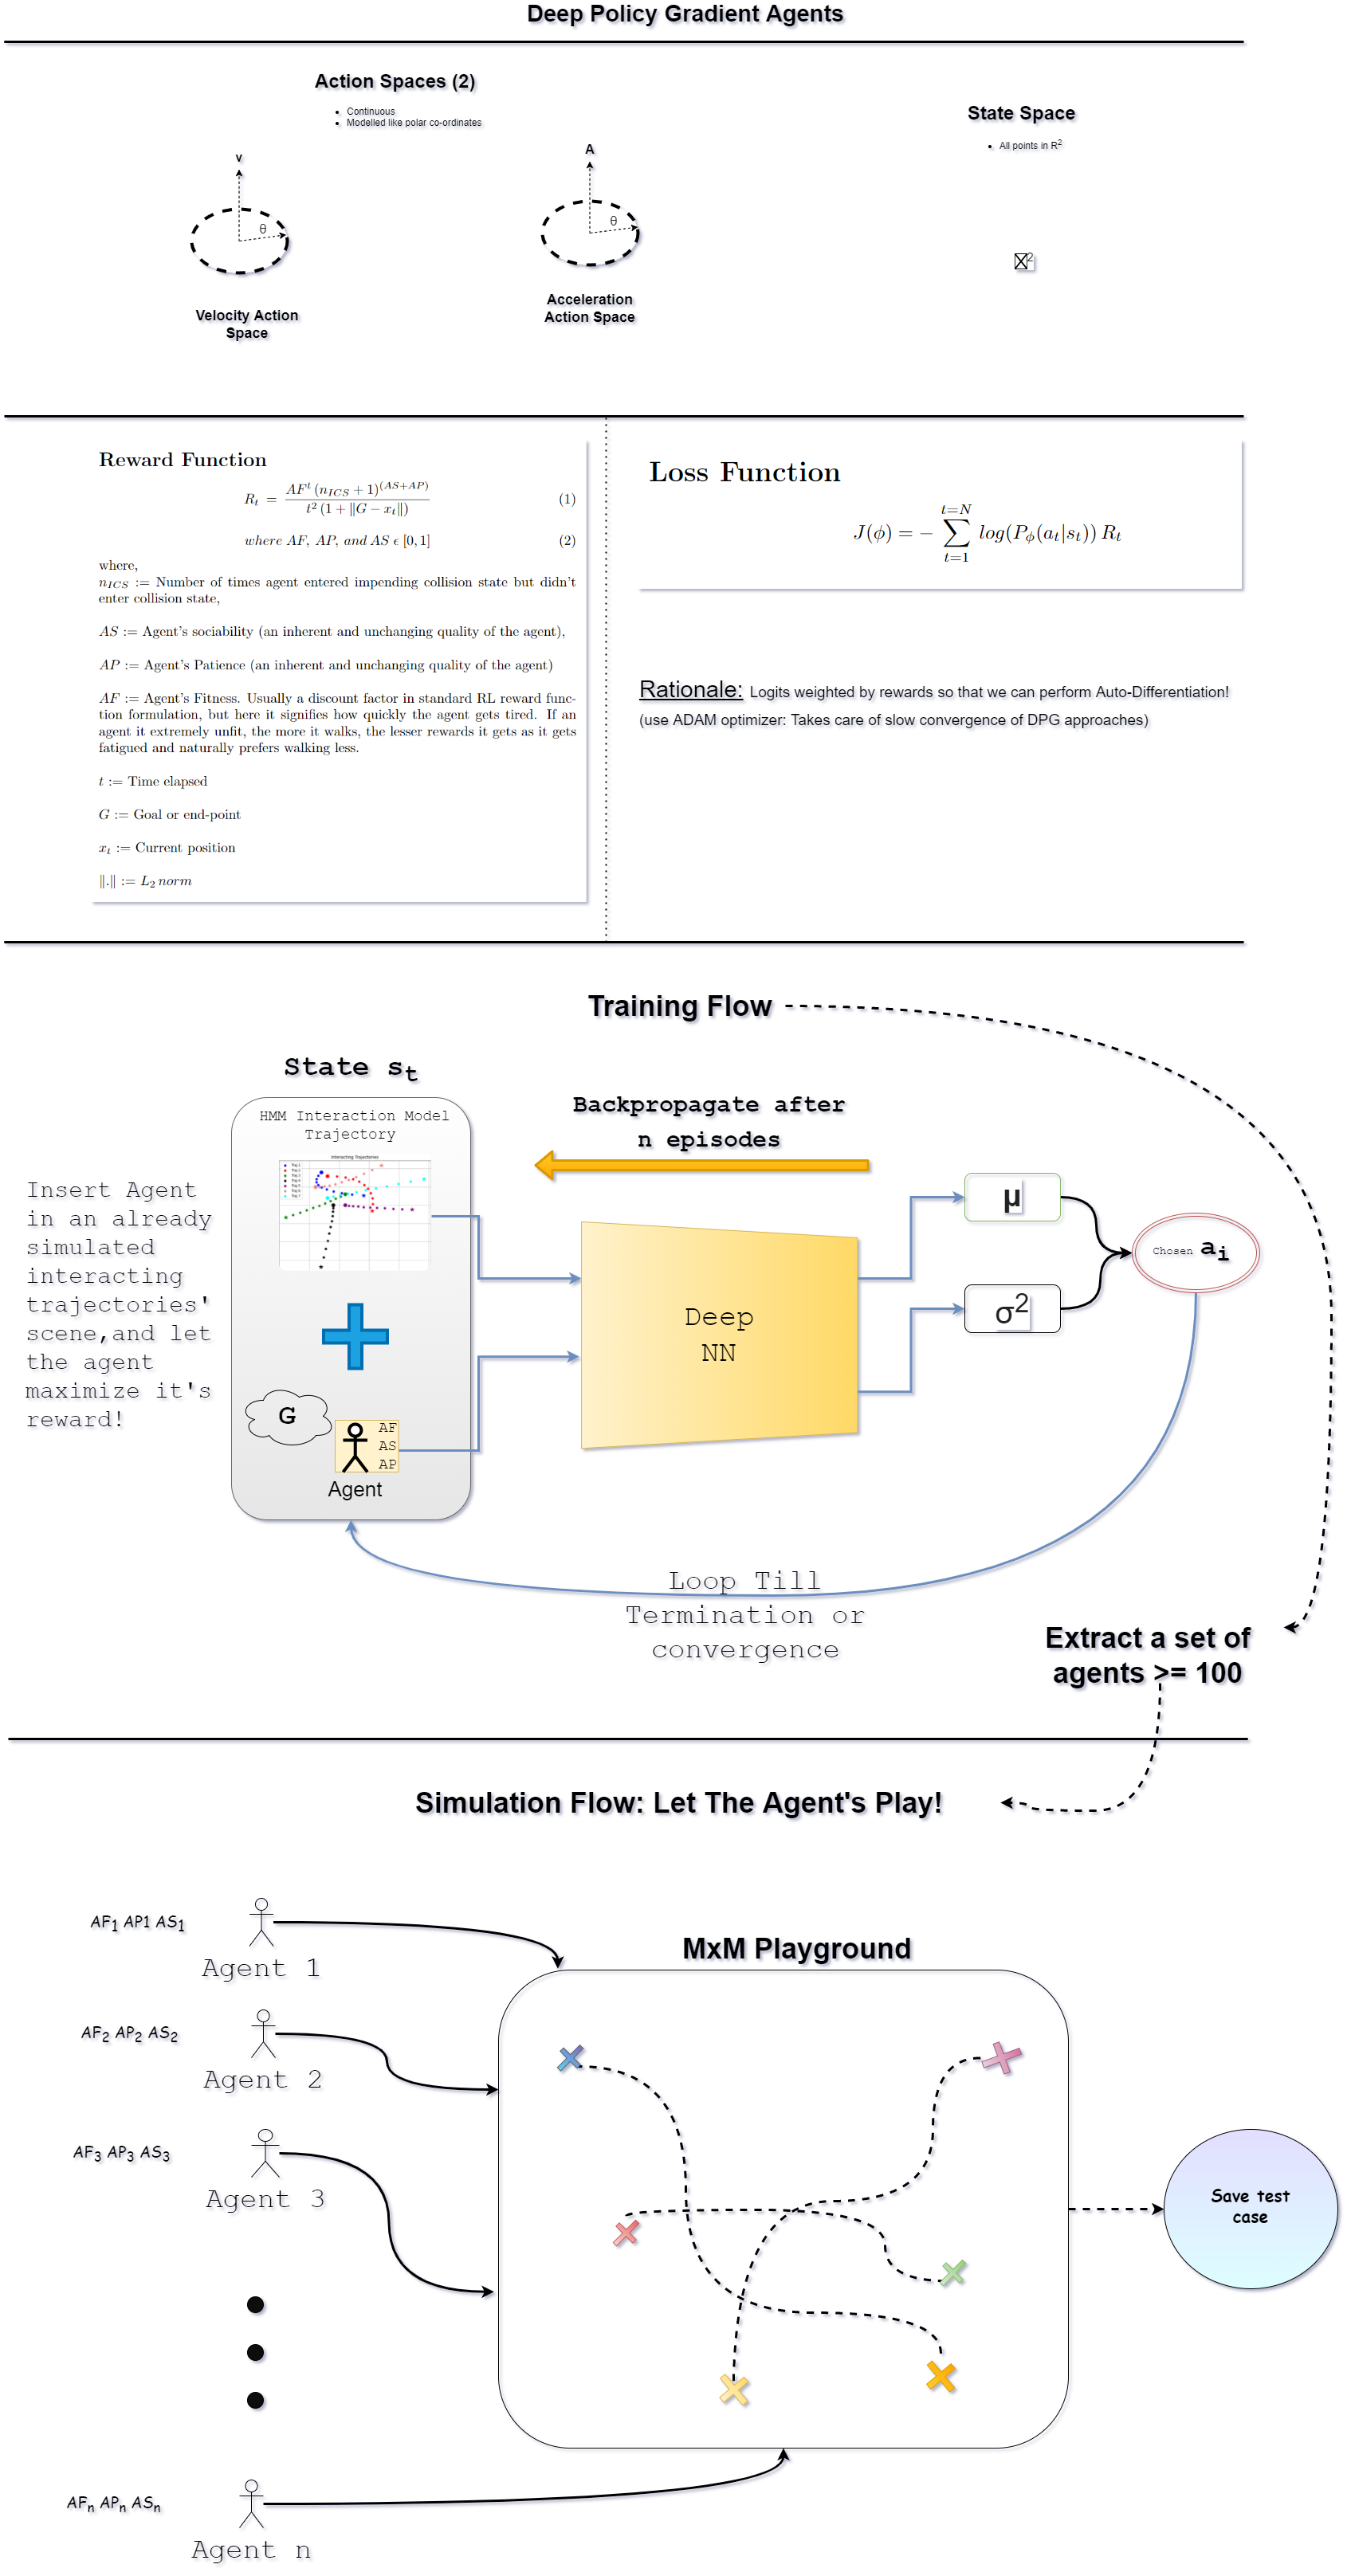

In [ ]:
from gym import Env, spaces
import time

In [ ]:
def plot_interaction_with_agent(trajs, trajLst):
  colors_lst = ['blue', 'red', 'green', 'black', 'gold', 'lightcoral', 'aqua', 'springgreen', 'fuchsia']
  random.shuffle(colors_lst)

  fig = plt.figure(figsize=(12,9))
  for i in range(len(trajs)):
    x = [e[0] for e in trajs[i]]
    y = [e[1] for e in trajs[i]]
    plt.plot(x[0], y[0], color=colors_lst[i], marker='o', markersize=10)
    plt.plot(x[-1], y[-1], color=colors_lst[i], marker='*', markersize=12)
    plt.scatter(x[1:-1],y[1:-1], color=colors_lst[i], label=f'Human: {i+1}', alpha = 0.4)
  
  plt.plot(trajLst[0][0], trajLst[0][1], 'o', color='purple', markersize=8, label='Agent Start Point')
  plt.scatter(trajLst[1:-1,0], trajLst[1:-1,1], color='teal', alpha=0.5)
  plt.plot(trajLst[-1][0], trajLst[-1][1], '*', color='orange', markersize=12, label='Agent End Point')
  plt.plot(GOAL[0], GOAL[1], '^', markersize=14, color='dodgerblue', label='Agent\'s Goal')

  plt.title("Agent + HMM-Interaction Model")
  plt.grid(True)
  plt.legend()

  plt.show()


def magLogit(num, limit):
  negative = -1 if num < 0 else 1
  num = abs(num)
  mag = negative*limit / (1+math.exp(-num))
  # mag += np.random.randint(-1,2) * np.random.rand() # Noise
  # mag = min(limit, mag)
  # mag = max(-limit, mag)
  return mag

def dirLogit(num):
  ans = 359/(1+math.exp(-abs(num)))
  ans += np.random.randint(-2,3) # Noise
  ans %= 360
  return ans

In [ ]:
class playgroundEnv(Env):
  def __init__(self):
    super(playgroundEnv, self).__init__()
    # pos_x, pos_y, vel_mag, vel_dir, acc_mag, acc_dir, nICS
    self.observation_space = spaces.Box(low=np.array([-np.inf, -np.inf, -np.inf, 0, -0.5, 0, 0]),
                                        high=np.array([np.inf, np.inf, np.inf, 359, 0.5, 359, np.inf]), dtype=np.float32)
    
    # Action space outputs: 
    # [vel_mag, vel_dir, acc_mag, acc_dir]
    self.action_space = spaces.Box(low=np.array([-2, 0, -0.5, 0]), high=np.array([2, 359, 0.5, 359]), dtype=np.float32)
    
    self.current_time = 0
    self.play_time = 100 # seconds
    
    # Agent state params 
    self.position = None                 
    self.goal = None  # FIXED

    self.vel_mag = None 
    self.acc_mag = None 
    self.vel_dir, self.acc_dir = np.random.randint(0, 360, size=2)
    
    self.fitness = 0
    self.patience = 0
    self.sociability = 0

    self.nICS = 0
    self.distance_to_nearest_person = 100000.0 
    self.state = None

    self.score = 0


  def step(self, action, i):
    # Apply action on velocity and acc first
    self.vel_mag = action[0] 
    self.vel_dir = action[1] 
    self.acc_mag = action[2] 
    self.acc_dir = action[3]

    self.position[0] += (self.vel_mag*math.cos(math.pi*self.vel_dir/180)) + (self.acc_mag*math.cos(math.pi*self.acc_dir/180))/2
    self.position[1] += (self.vel_mag*math.sin(math.pi*self.vel_dir/180)) + (self.acc_mag*math.sin(math.pi*self.acc_dir/180))/2
                         
    
    has_coll, impending_collisions, self.distance_to_nearest_person = self.has_collided(env.current_time, i, self.position)
    
    reward = 0
    episode_over = False

    if has_coll:
      print(f"[!] Agent Collided.\nAGENT'S HARD DRIVE WILL BE DESTROYED.")
      reward = -self.score - 10000
      self.score = -10000
      episode_over = True

    elif np.linalg.norm(np.array(env.goal) - self.position) <= 2: # epsilon (radius around goal is considered reached goal)
      print(f"Agent gets additional: {(100000 / (self.current_time+1)) + np.linalg.norm(env.goal)} as reward for reaching goal!")
      # reward += self.calculate_reward()
      # reward -= np.linalg.norm(np.array(self.position) - np.array(self.goal), ord = 2)
      reward += (100000 / (self.current_time+1)) + np.linalg.norm(env.goal)
      self.score += reward
      self.nICS += impending_collisions
      episode_over = True

    else:
      # reward = self.calculate_reward()
      # reward -= np.linalg.norm(np.array(self.position) - np.array(self.goal), ord=2)
      self.nICS += impending_collisions
      self.score -= np.linalg.norm(np.array(self.position) - np.array(self.goal), ord=2)
      episode_over = False

    self.state = np.array([self.position[0], self.position[1], self.goal[0], self.goal[1], 
                           self.fitness, self.patience, self.sociability,
                           self.distance_to_nearest_person], dtype=np.float32)
    
    self.current_time += 1

    if episode_over or self.current_time == 100:
      episode_over = True
    
    return np.array(self.position), reward, episode_over, {}
    

  def render(self, mode = "human"):
    assert mode in ["human", "rgb_array"], "Invalid mode, must be either \"human\" or \"rgb_array\""
    return


  def reset(self, i):
    # Clean the render and other params
    self.position = np.zeros(2)
    self.goal = np.random.randint(low=-40, high=41, size=2)  # FIXED

    self.current_time = 0
    self.score = 0

    self.vel_mag, self.vel_dir = np.zeros(2) # Can not go over 2m/s -> While taking a dec
    self.acc_mag, self.acc_dir = np.zeros(2) # Can not go over 1m/s^2 -> While taking a dec 
    
    # Select 50 tuples after full set up; Will need to train 50 times.
    self.fitness = 0.8
    self.patience = 0.8
    self.sociability = 0.8
    
    if i != 0:
      has_coll2, impending_collisions, self.distance_to_nearest_person = self.has_collided(0, i, self.position)

      if has_coll2:
        print("Some human started at (0,0)!!!\n Placing Agent arbitrarily in a 10x10 box around origin")
        self.position = np.random.randint(-100, 101, size=2)/10
    else:
      self.distance_to_nearest_person = 100000.0

    self.nICS = 0
    self.state = np.array([self.position[0], self.position[1], self.goal[0], self.goal[1], 
                           self.fitness, self.patience, self.sociability,
                           self.distance_to_nearest_person], dtype=np.float32)
    
    return self.position, self.score, self.nICS

  def calculate_reward(self):
    Rt = (self.fitness**self.current_time)*((self.nICS + 1)**(self.sociability + self.patience))
    Rt /= (self.current_time + 1) * ( 1 + np.linalg.norm(self.goal - self.position))
    return Rt

  def has_collided(self, time, sample_num, pos):
    threshold = 2
    threshold_impending = 4
    inICS = 0
    collision_happened = False
    nearest_person_dist = []
    for id in range(np.array(traj_indep[sample_num]).shape[0]):
      dst_from_Person = np.linalg.norm(np.array(traj_indep[sample_num][id][time-1]) - pos)
      if  dst_from_Person < threshold:
        collision_happened = True
      elif dst_from_Person < threshold_impending:
        inICS += 1
      nearest_person_dist.append(dst_from_Person)
    nearest_person_dist = np.array(nearest_person_dist)
    #print(f"Agent is closest to person {np.argmin(nearest_person_dist)+1} by {min(nearest_person_dist):.1f} m.")

    return collision_happened, inICS, float(min(nearest_person_dist))

In [ ]:
# Hyper-params
learning_rate = 1e-6

In [ ]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device\n')

class DPG_NN(nn.Module):
    def __init__(self):
        super(DPG_NN, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = DPG_NN().to(device)
print("Model structure:\n\n", model)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#for name, param in model.named_parameters():
#    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Using cpu device

Model structure:

 DPG_NN(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)


In [ ]:
for parms in model.parameters():
  print(parms[:1], parms.shape)

tensor([[ 0.1204,  0.1109,  0.0926,  0.0456,  0.2047,  0.2482, -0.1709, -0.3053]],
       grad_fn=<SliceBackward0>) torch.Size([16, 8])
tensor([0.0401], grad_fn=<SliceBackward0>) torch.Size([16])
tensor([[ 0.1906,  0.2128,  0.0068, -0.2171,  0.0893,  0.2269, -0.0414,  0.1057,
          0.0299, -0.1683, -0.1414,  0.1349, -0.1035, -0.1207, -0.1713, -0.0592]],
       grad_fn=<SliceBackward0>) torch.Size([8, 16])
tensor([-0.0336], grad_fn=<SliceBackward0>) torch.Size([8])
tensor([[-0.0330,  0.0027,  0.0429,  0.0209, -0.1500, -0.0779, -0.1525, -0.2908]],
       grad_fn=<SliceBackward0>) torch.Size([4, 8])
tensor([-0.2654], grad_fn=<SliceBackward0>) torch.Size([4])


/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


G: [ 9 -6]
0 -- Distance to Goal: 10.816653826391969
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 1

********************
Total Episode Loss: 1471.48194331548 | Agent Score: -1471.48194331548
********************



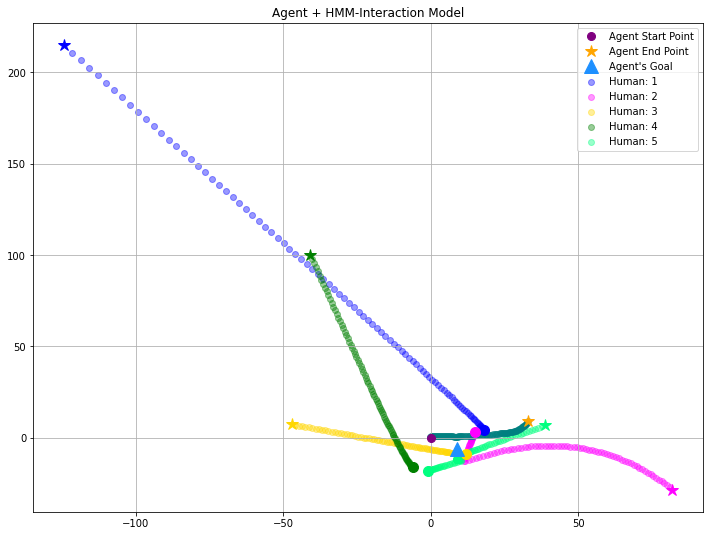

G: [24 24]
0 -- Distance to Goal: 33.94112549695428
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 2

********************
Total Episode Loss: 3411.4367401236314 | Agent Score: -3411.4367401236314
********************



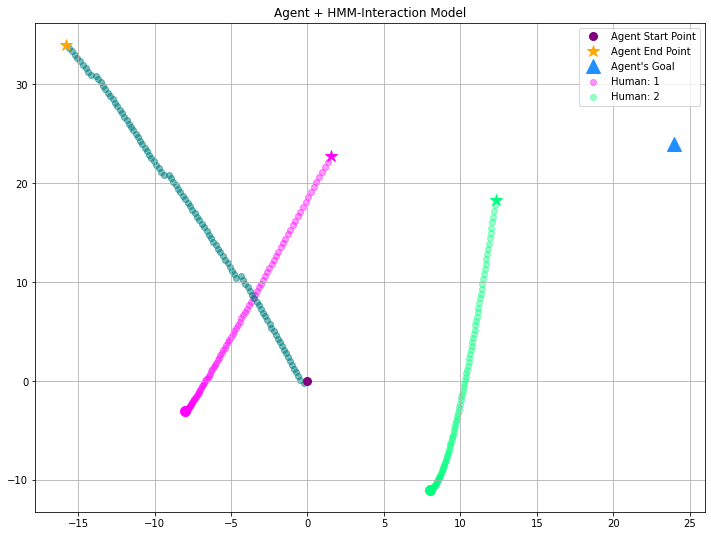

G: [-33  36]
0 -- Distance to Goal: 48.83646178829912
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 3

********************
Total Episode Loss: 3026.926649462855 | Agent Score: -3026.926649462855
********************



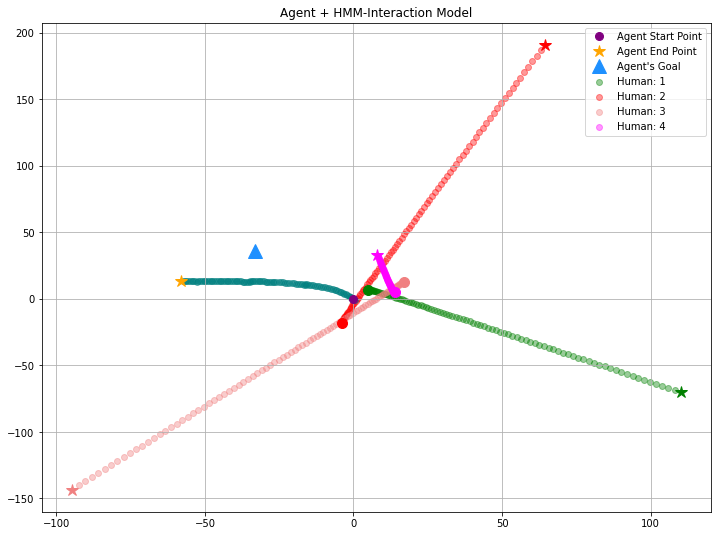

G: [-27  32]
0 -- Distance to Goal: 41.86884283091664
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 4

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 61465.73628373079 | Agent Score: -10000
********************



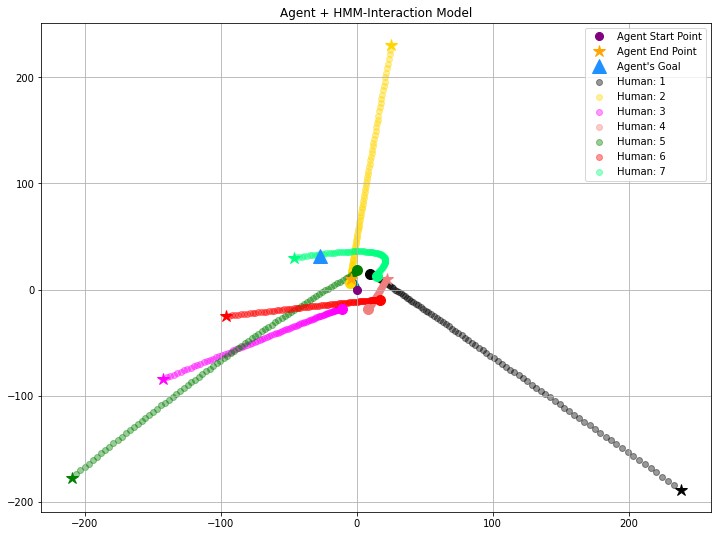

G: [-35  39]
0 -- Distance to Goal: 52.40229002629561
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 5

********************
Total Episode Loss: 3383.1245953050566 | Agent Score: -3383.1245953050566
********************



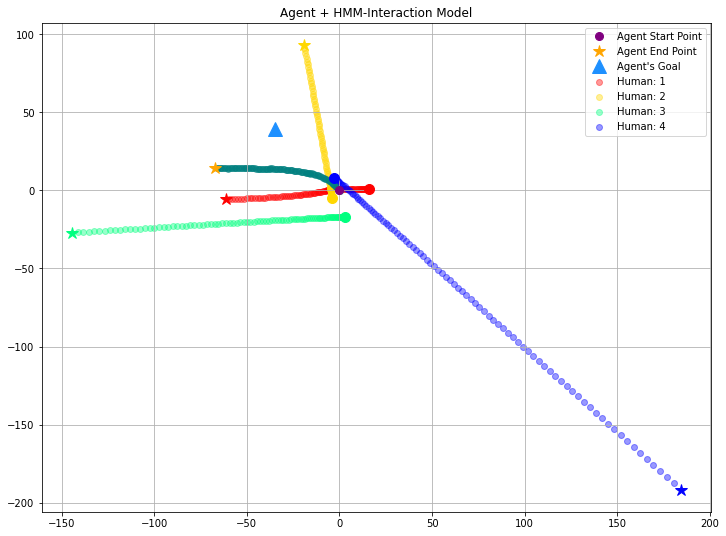

G: [18 16]
0 -- Distance to Goal: 24.08318915758459
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 6

********************
Total Episode Loss: 3227.885874026386 | Agent Score: -3227.885874026386
********************



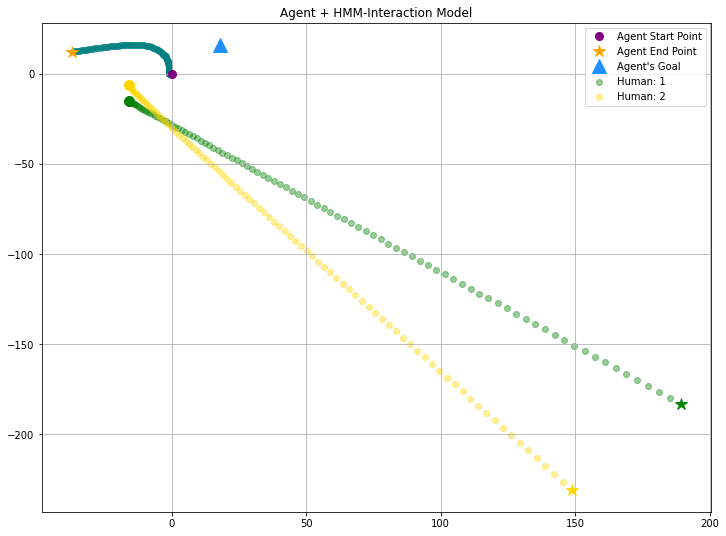

G: [11 11]
0 -- Distance to Goal: 15.556349186104045
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 7

********************
Total Episode Loss: 1247.6838011280545 | Agent Score: -1247.6838011280545
********************



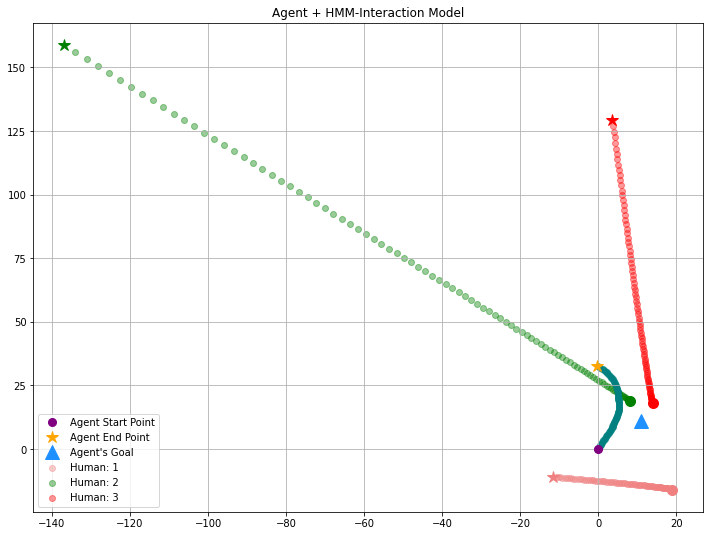

G: [  9 -27]
0 -- Distance to Goal: 28.460498941515414
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 8

********************
Total Episode Loss: 4822.557862877492 | Agent Score: -4822.557862877492
********************



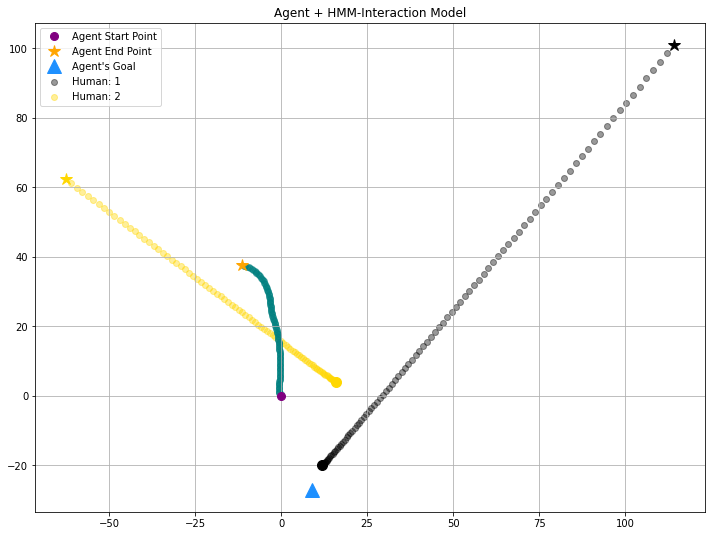

G: [31 15]
0 -- Distance to Goal: 34.438350715445125
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 9

********************
Total Episode Loss: 3850.842492010185 | Agent Score: -3850.842492010185
********************



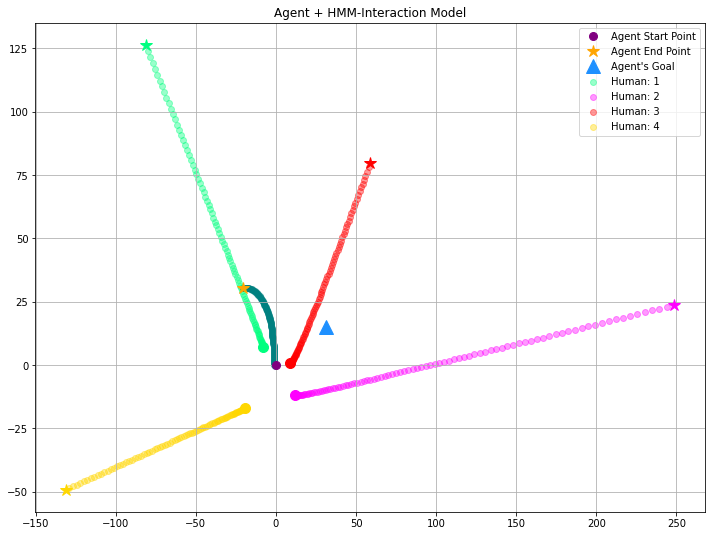

G: [ 37 -24]
0 -- Distance to Goal: 44.10215414239989
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 10

********************
Total Episode Loss: 5599.136570136641 | Agent Score: -5599.136570136641
********************



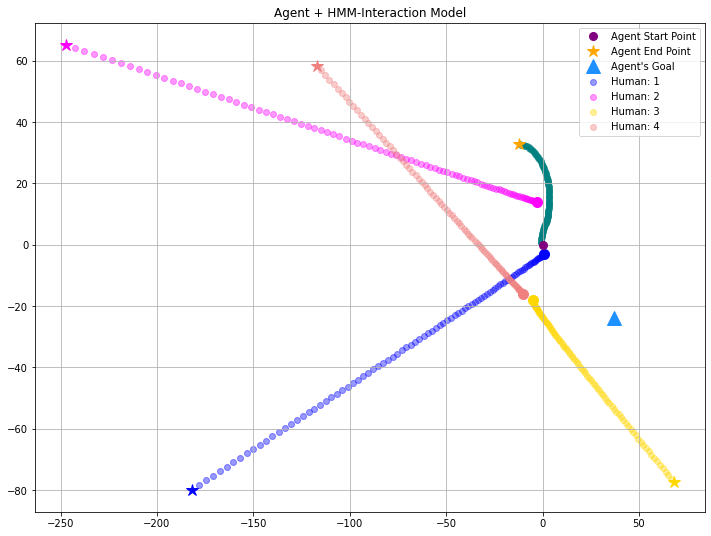

G: [-16  25]
0 -- Distance to Goal: 29.68164415931166
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 11

Agent gets additional: 1381.0329955106629 as reward for reaching goal!
********************
Total Episode Loss: -7693.833027627114 | Agent Score: 175.8124524844484
********************

########### BEST AGENT SCORE SO FAR: 175.8124524844484 ###########


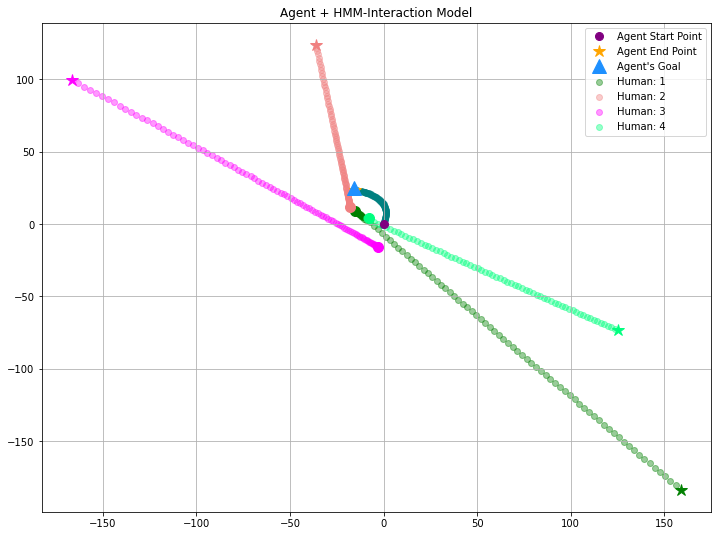

G: [ -8 -26]
0 -- Distance to Goal: 27.202941017470888
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 12

********************
Total Episode Loss: 4196.727926657367 | Agent Score: -4196.727926657367
********************



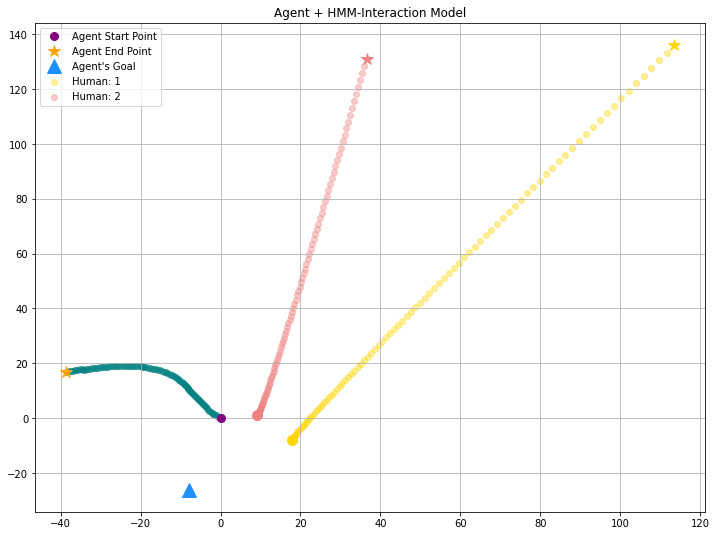

G: [-21  22]
0 -- Distance to Goal: 30.4138126514911
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 13

Agent gets additional: 1617.7153999530783 as reward for reaching goal!
********************
Total Episode Loss: -11130.721446557889 | Agent Score: 625.9297736405721
********************

########### BEST AGENT SCORE SO FAR: 625.9297736405721 ###########


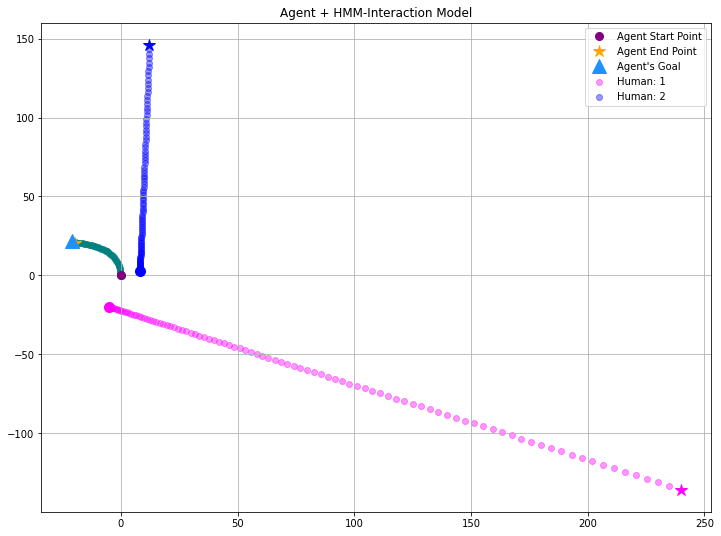

G: [-21  33]
0 -- Distance to Goal: 39.11521443121589
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 14

********************
Total Episode Loss: 1943.9064186020707 | Agent Score: -1943.9064186020707
********************



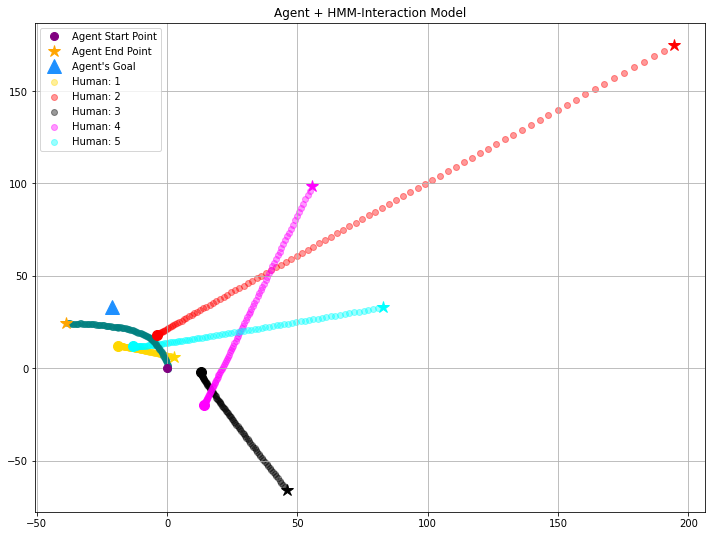

G: [-33  22]
0 -- Distance to Goal: 39.66106403010388
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 15

********************
Total Episode Loss: 2292.9944638024926 | Agent Score: -2292.9944638024926
********************



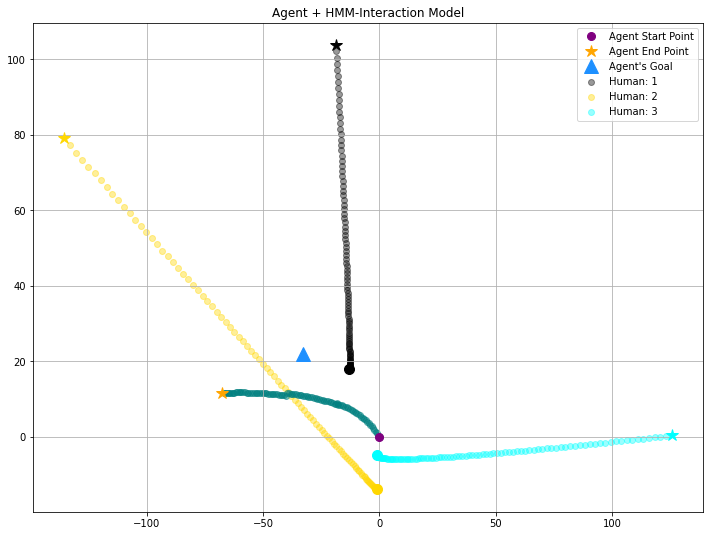

G: [20 25]
0 -- Distance to Goal: 32.01562118716424
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 16

********************
Total Episode Loss: 3418.2166916285532 | Agent Score: -3418.2166916285532
********************



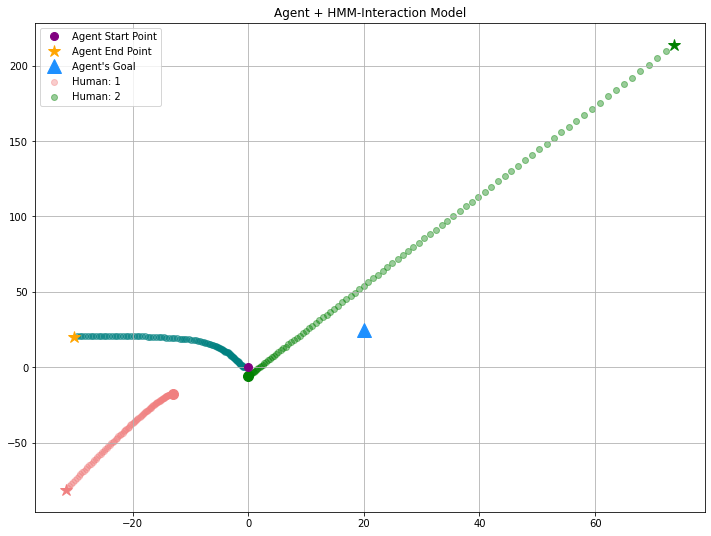

G: [-31   1]
0 -- Distance to Goal: 31.016124838541646
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 17

********************
Total Episode Loss: 1660.1488474547543 | Agent Score: -1660.1488474547543
********************



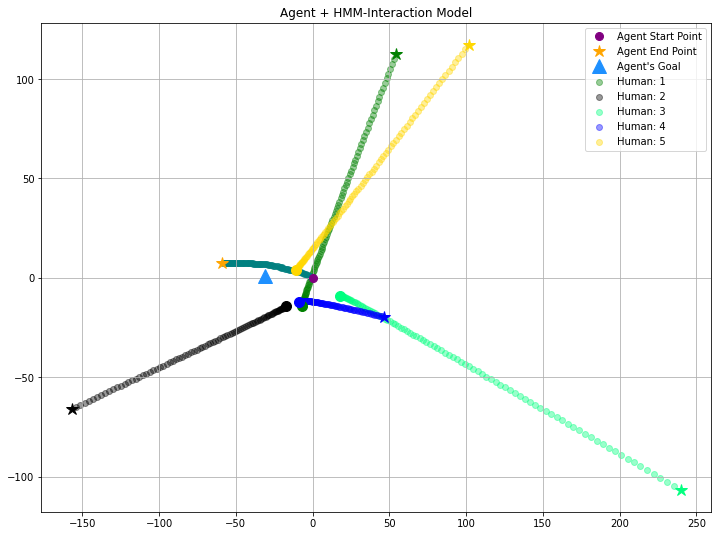

G: [4 1]
0 -- Distance to Goal: 4.123105625617661
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 18

Agent gets additional: 8337.456438958952 as reward for reaching goal!
********************
Total Episode Loss: -26049.86242168024 | Agent Score: 8296.45538330326
********************

########### BEST AGENT SCORE SO FAR: 8296.45538330326 ###########


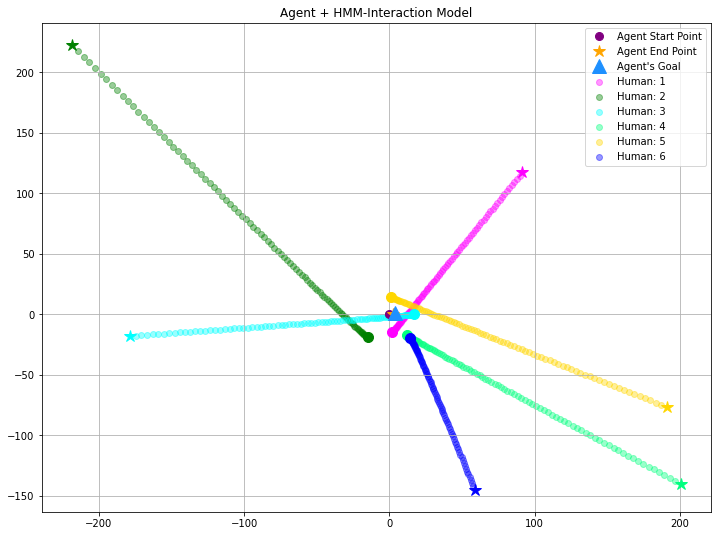

G: [-15   9]
0 -- Distance to Goal: 17.4928556845359
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 19

********************
Total Episode Loss: 1826.0594986907745 | Agent Score: -1826.0594986907745
********************



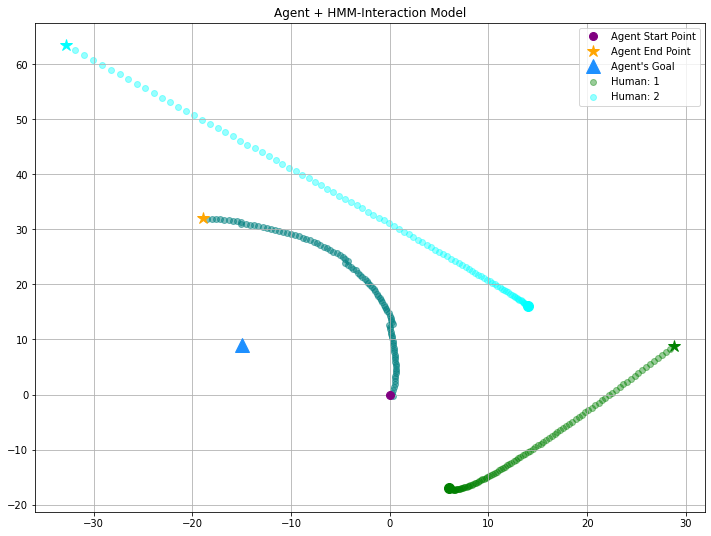

G: [-34  17]
0 -- Distance to Goal: 38.01315561749642
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 20

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 89776.35836543237 | Agent Score: -10000
********************



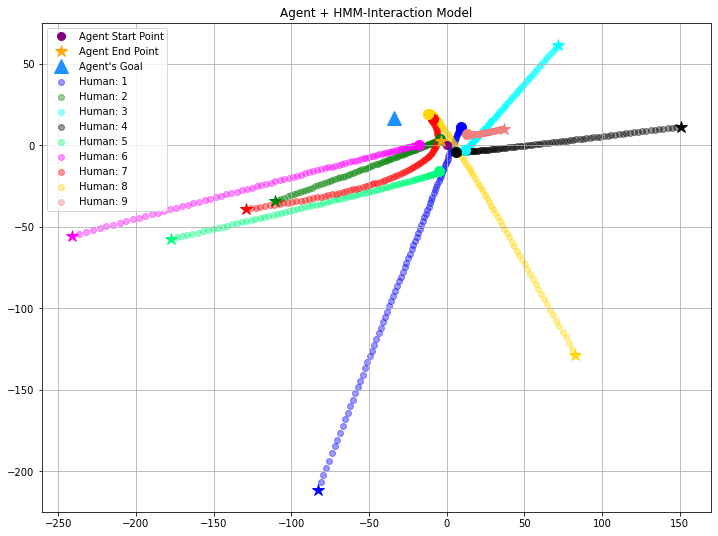

G: [-6 12]
0 -- Distance to Goal: 13.416407864998739
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 21

********************
Total Episode Loss: 1065.6101244947217 | Agent Score: -1065.6101244947217
********************



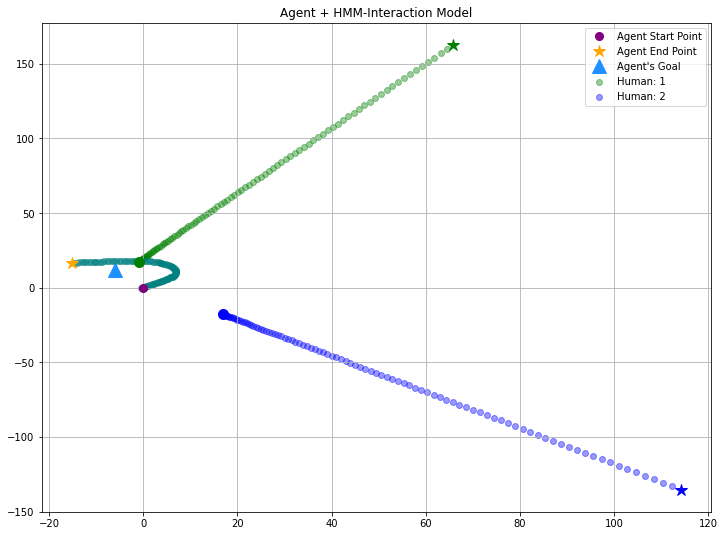

G: [ 9 26]
0 -- Distance to Goal: 27.51363298439521
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 22

********************
Total Episode Loss: 1991.0167467648275 | Agent Score: -1991.0167467648275
********************



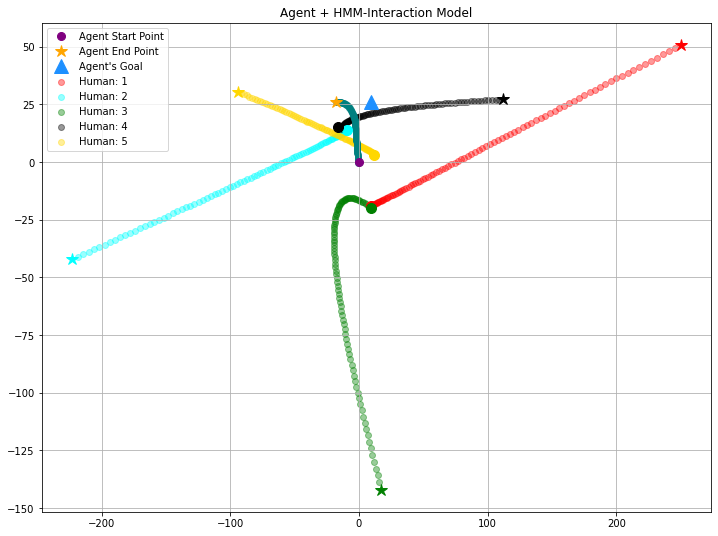

G: [10  0]
0 -- Distance to Goal: 10.0
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 23

Agent gets additional: 3458.2758620689656 as reward for reaching goal!
********************
Total Episode Loss: -10640.703680381528 | Agent Score: 3268.9967538349447
********************



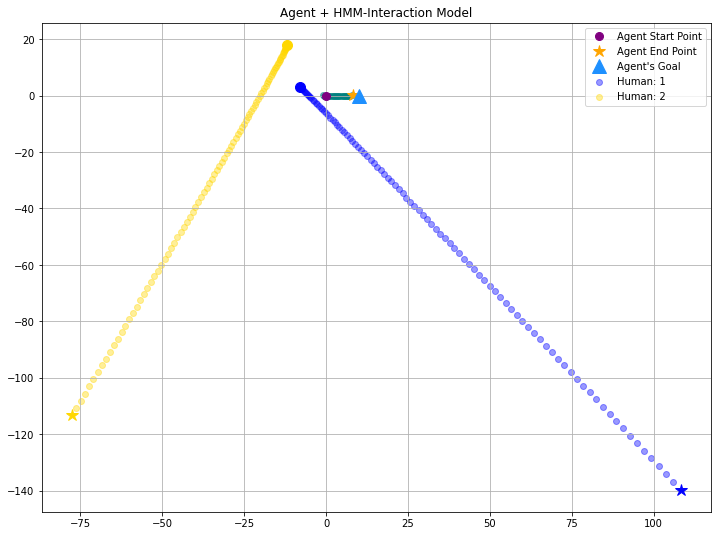

G: [-34 -26]
0 -- Distance to Goal: 42.80186911806539
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 24

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 75141.88928838281 | Agent Score: -10000
********************



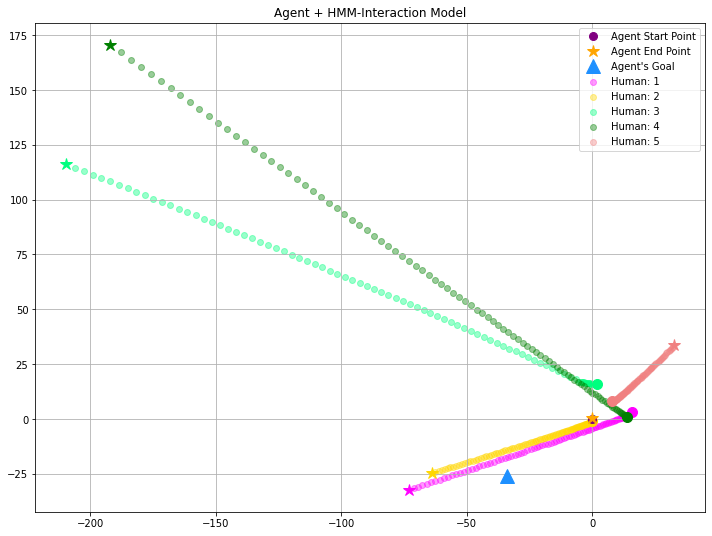

G: [7 8]
0 -- Distance to Goal: 10.63014581273465
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 25

********************
Total Episode Loss: 953.3230654721599 | Agent Score: -953.3230654721599
********************



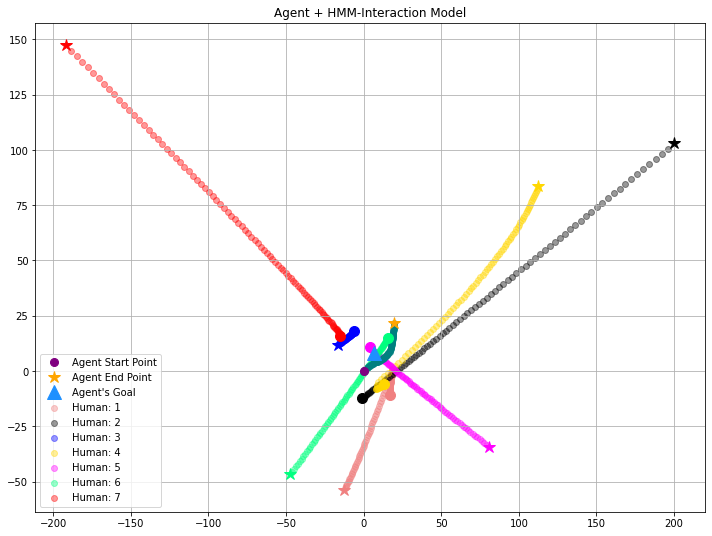

G: [-16  39]
0 -- Distance to Goal: 42.15447781671598
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 26

********************
Total Episode Loss: 2635.3856508439712 | Agent Score: -2635.3856508439712
********************



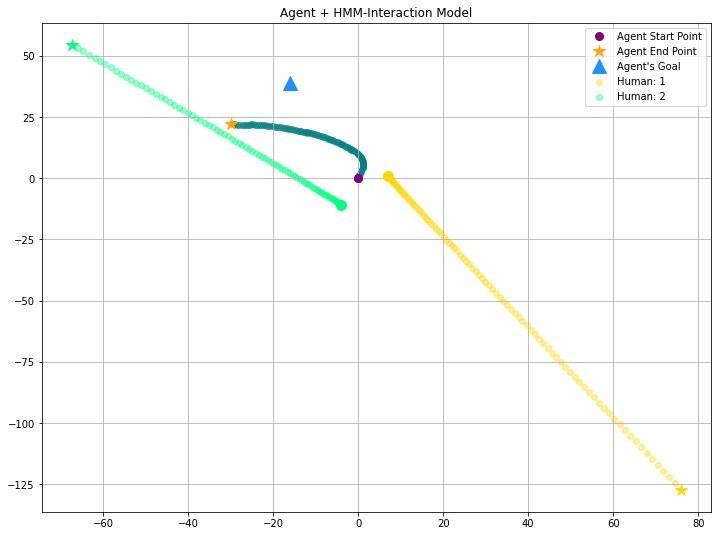

G: [  4 -39]
0 -- Distance to Goal: 39.20459156782532
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 27

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 46664.225389521845 | Agent Score: -10000
********************



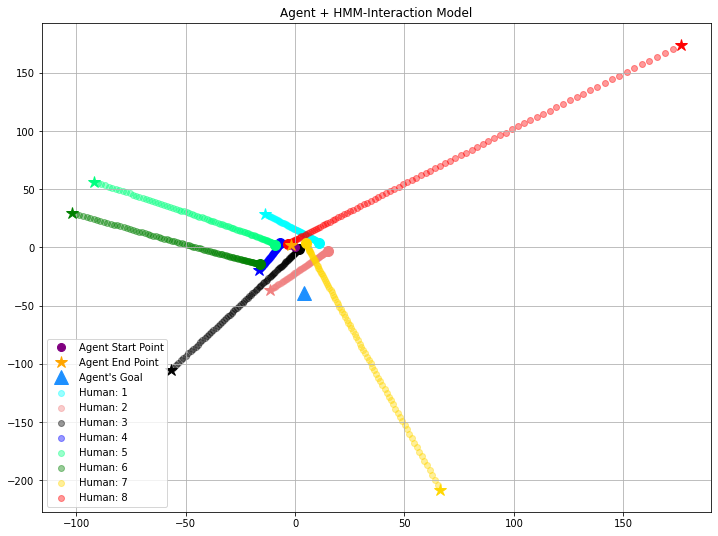

G: [11 -1]
0 -- Distance to Goal: 11.045361017187261
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 28

********************
Total Episode Loss: 1067.5173740805571 | Agent Score: -1067.5173740805571
********************



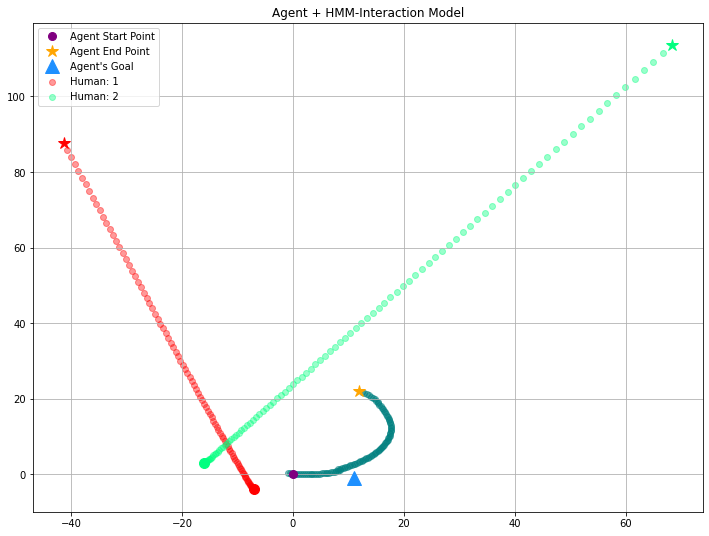

G: [-11 -22]
0 -- Distance to Goal: 24.596747752497688
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 29

********************
Total Episode Loss: 3493.254796083667 | Agent Score: -3493.254796083667
********************



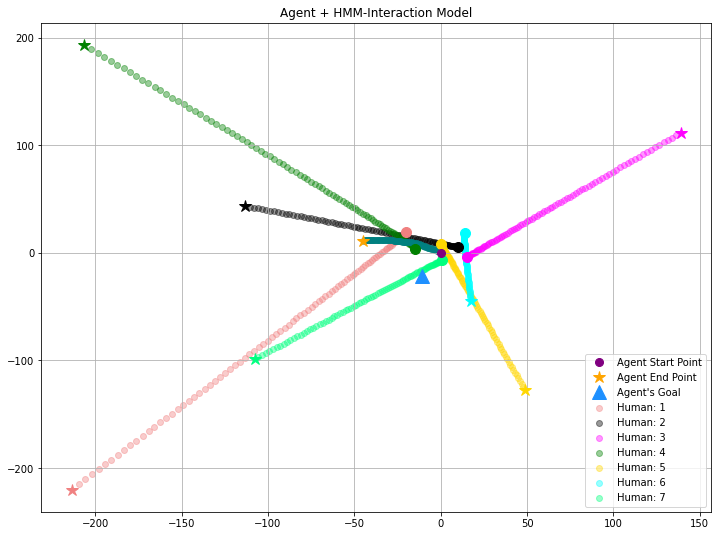

G: [-15 -12]
0 -- Distance to Goal: 19.209372712298546
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 30

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 75872.13003731747 | Agent Score: -10000
********************



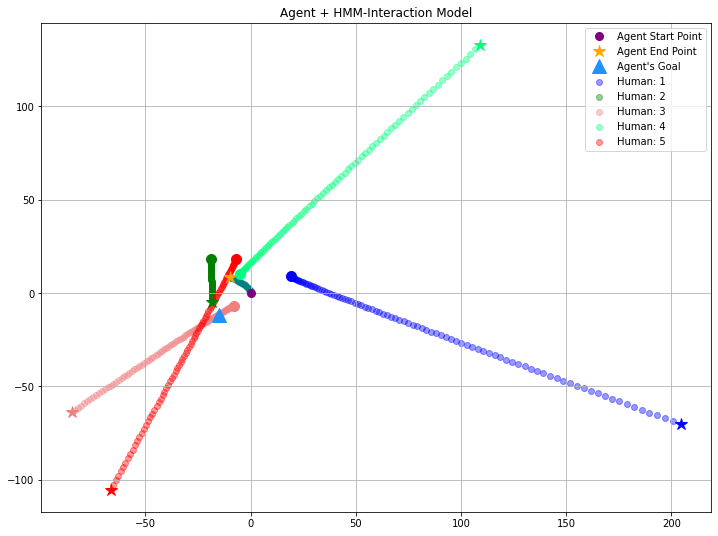

G: [-10 -19]
0 -- Distance to Goal: 21.470910553583888
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 31

********************
Total Episode Loss: 3596.5557058780983 | Agent Score: -3596.5557058780983
********************



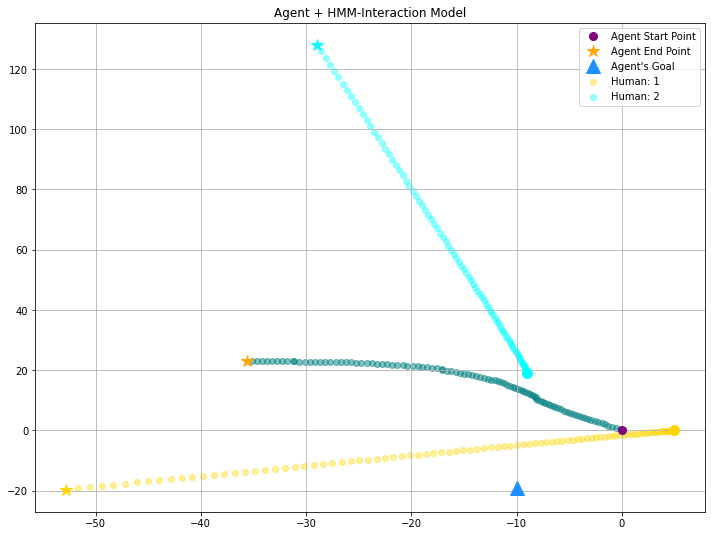

G: [ 33 -11]
0 -- Distance to Goal: 34.785054261852174
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 32

********************
Total Episode Loss: 3275.2527375529335 | Agent Score: -3275.2527375529335
********************



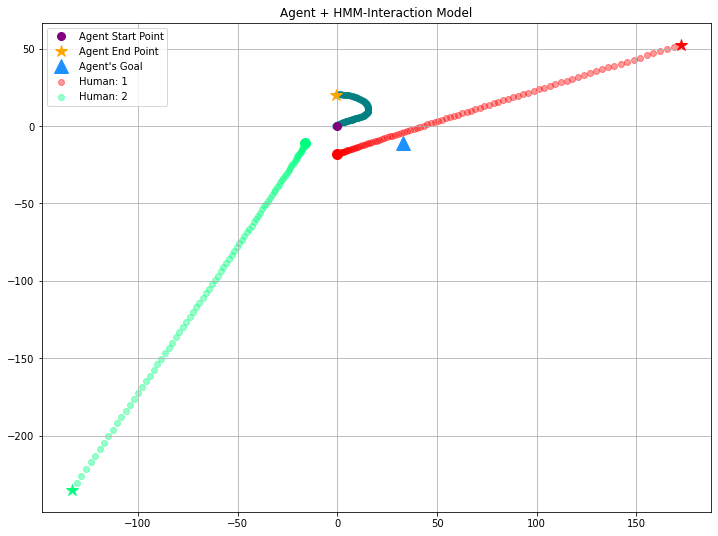

G: [20 24]
0 -- Distance to Goal: 31.240998703626616
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 33

********************
Total Episode Loss: 2991.204468846826 | Agent Score: -2991.204468846826
********************



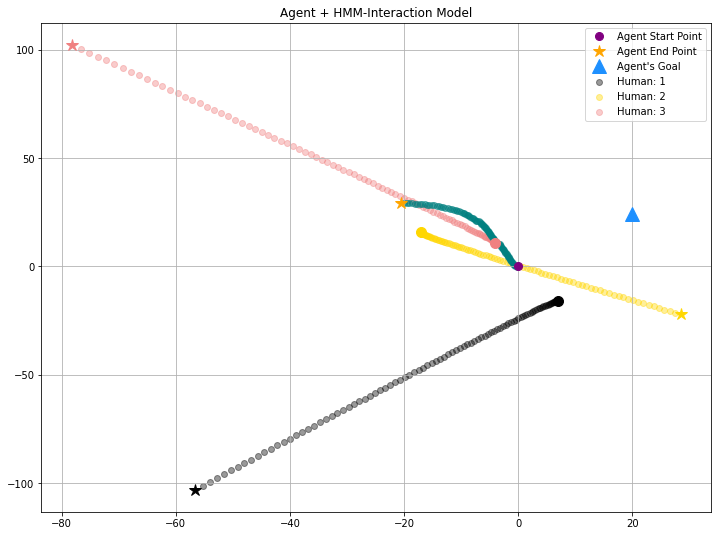

G: [ 10 -25]
0 -- Distance to Goal: 26.92582403567252
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 34

********************
Total Episode Loss: 4519.596904509286 | Agent Score: -4519.596904509286
********************



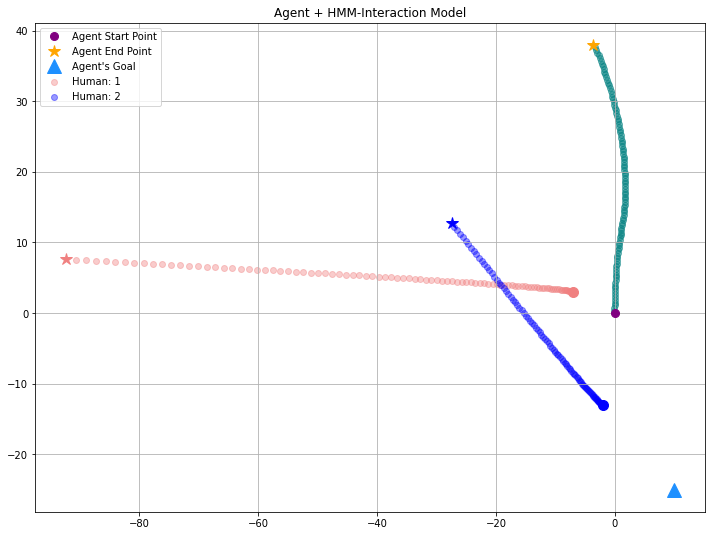

G: [ 39 -25]
0 -- Distance to Goal: 46.32493928760188
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 35

********************
Total Episode Loss: 5286.933707782098 | Agent Score: -5286.933707782098
********************



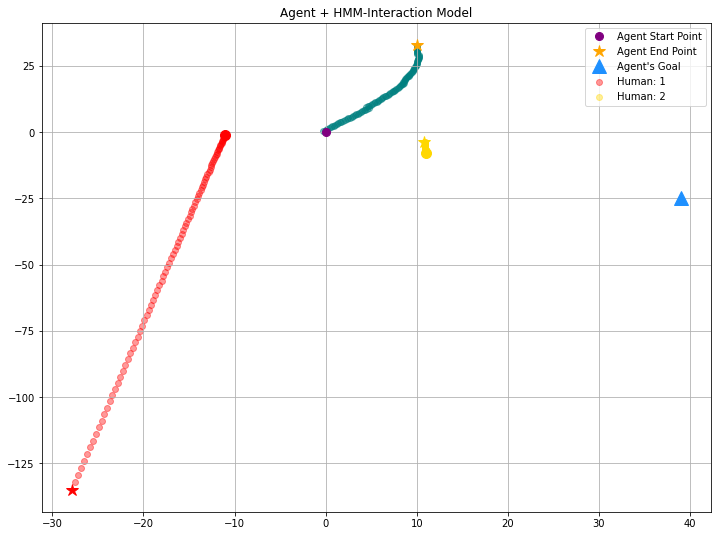

G: [-21   0]
0 -- Distance to Goal: 21.0
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 36

********************
Total Episode Loss: 1871.5047283552374 | Agent Score: -1871.5047283552374
********************



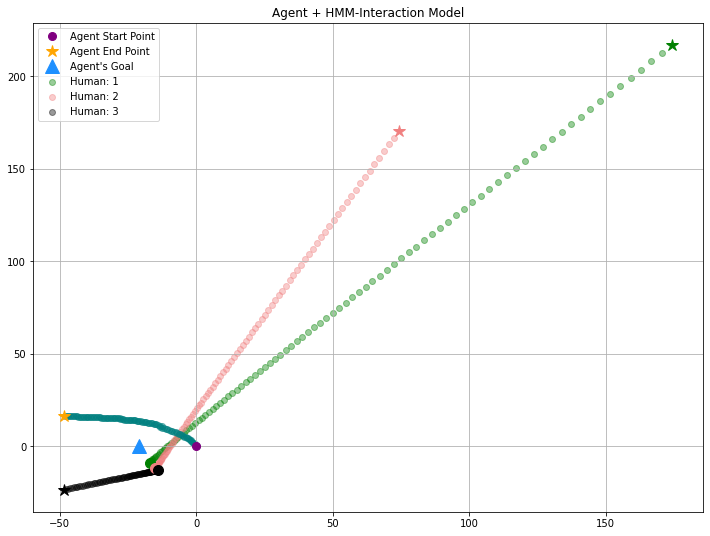

G: [23 -4]
0 -- Distance to Goal: 23.345235059857504
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 37

********************
Total Episode Loss: 1597.852607529691 | Agent Score: -1597.852607529691
********************



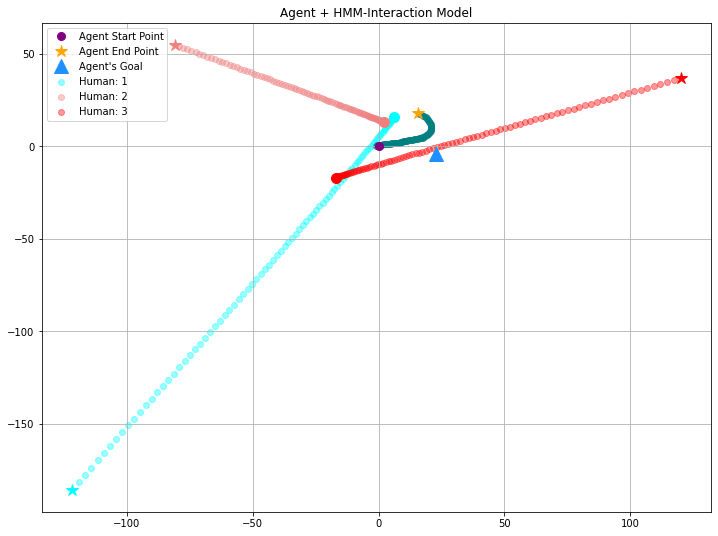

G: [-10  38]
0 -- Distance to Goal: 39.293765408777
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 38

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 37445.47242853412 | Agent Score: -10000
********************



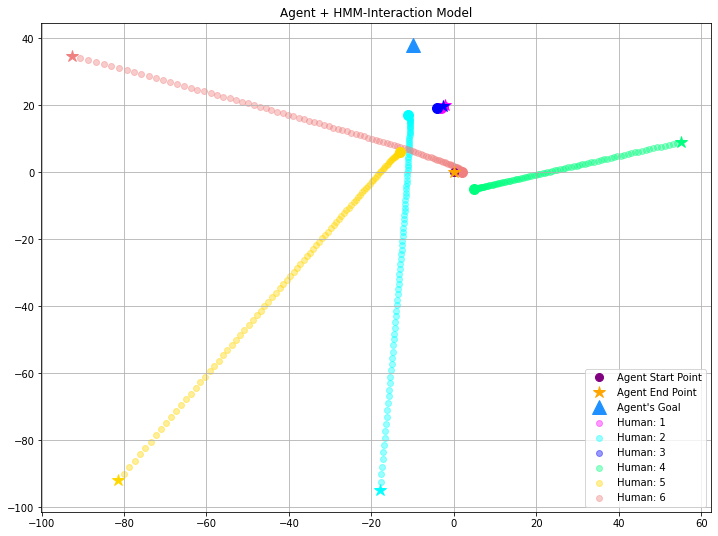

G: [-20  33]
0 -- Distance to Goal: 38.58756276314948
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 39

********************
Total Episode Loss: 2117.277986907152 | Agent Score: -2117.277986907152
********************



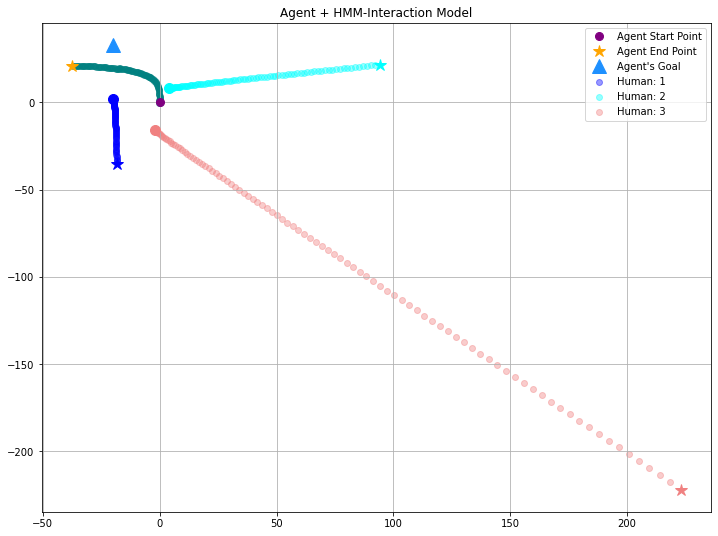

G: [-17  25]
0 -- Distance to Goal: 30.23243291566195
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 40

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 43041.84293279313 | Agent Score: -10000
********************



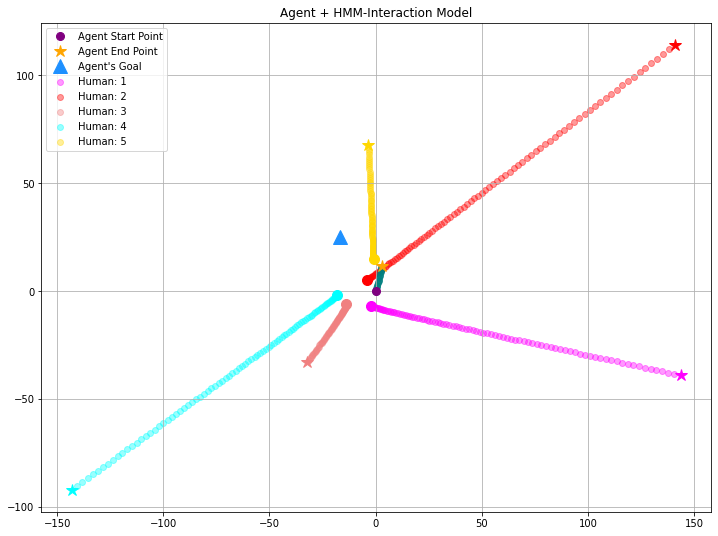

G: [-20 -28]
0 -- Distance to Goal: 34.40930106817051
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 41

********************
Total Episode Loss: 3493.912491738289 | Agent Score: -3493.912491738289
********************



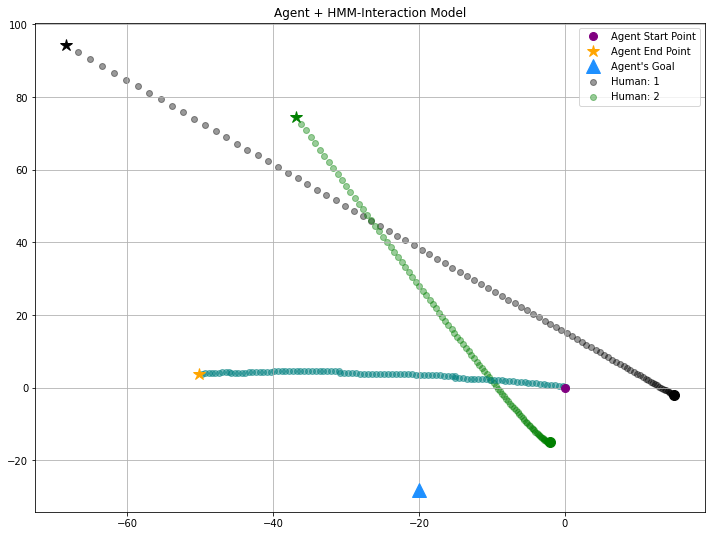

G: [37 15]
0 -- Distance to Goal: 39.92492955535426
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 42

********************
Total Episode Loss: 4745.777018684001 | Agent Score: -4745.777018684001
********************



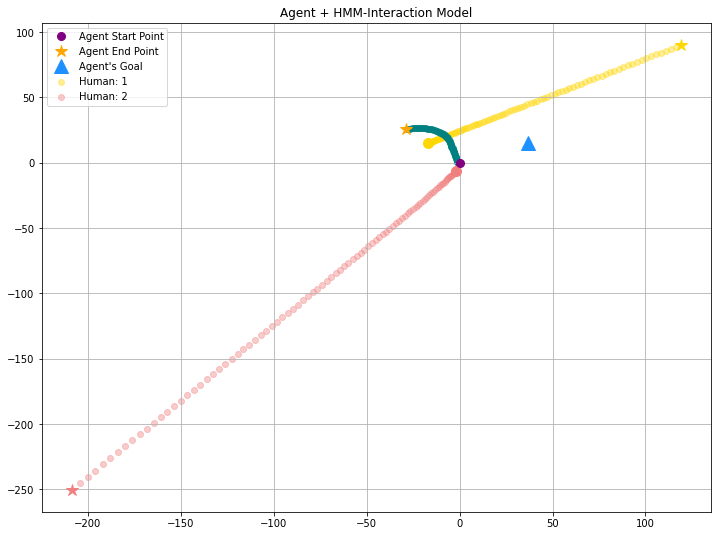

G: [25 13]
0 -- Distance to Goal: 28.178005607210743
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 43

********************
Total Episode Loss: 2643.0771929637804 | Agent Score: -2643.0771929637804
********************



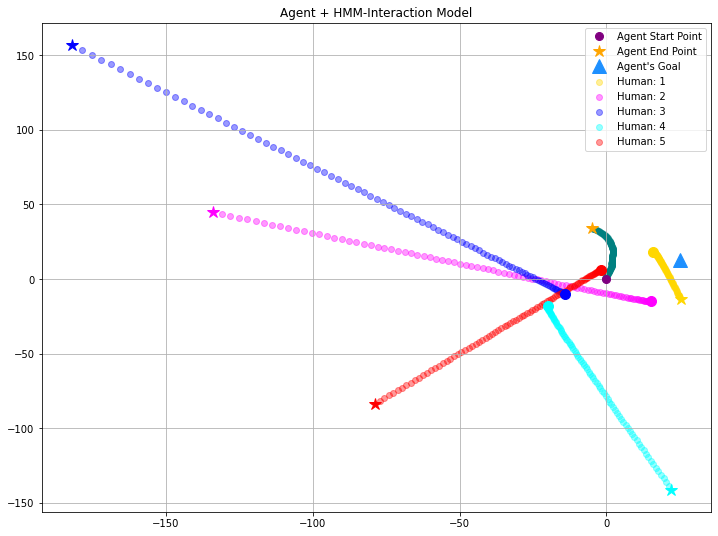

G: [-29   8]
0 -- Distance to Goal: 30.083217912982647
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 44

Agent gets additional: 2302.810490640255 as reward for reaching goal!
********************
Total Episode Loss: -22847.436269934773 | Agent Score: 1604.1798664279022
********************



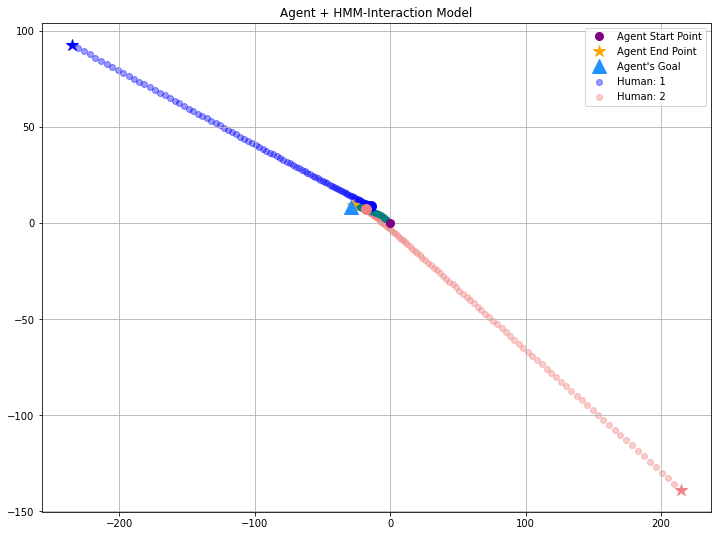

G: [-26  -4]
0 -- Distance to Goal: 26.30589287593181
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 45

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 105251.59995443685 | Agent Score: -10000
********************



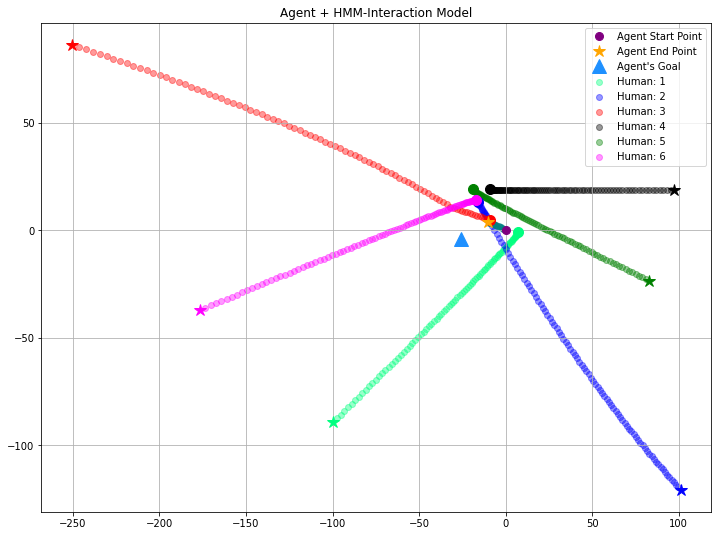

G: [-34 -24]
0 -- Distance to Goal: 41.617304093369626
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 46

********************
Total Episode Loss: 3095.93110548676 | Agent Score: -3095.93110548676
********************



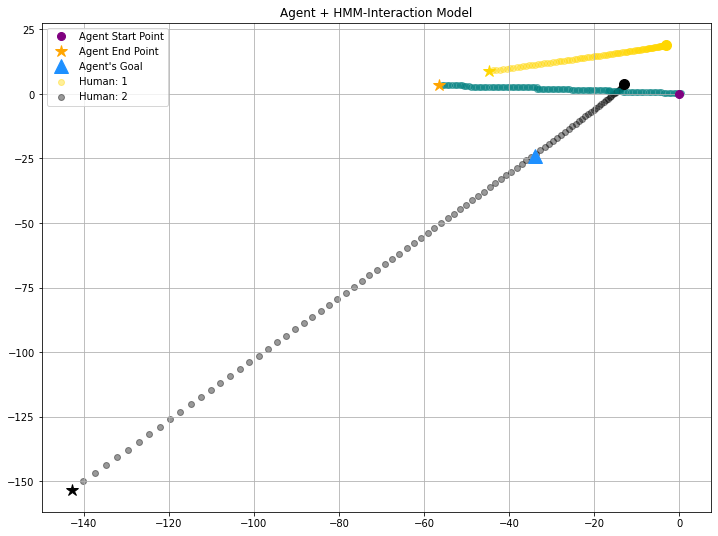

G: [-19  34]
0 -- Distance to Goal: 38.948684188300895
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 47

********************
Total Episode Loss: 2284.018423956895 | Agent Score: -2284.018423956895
********************



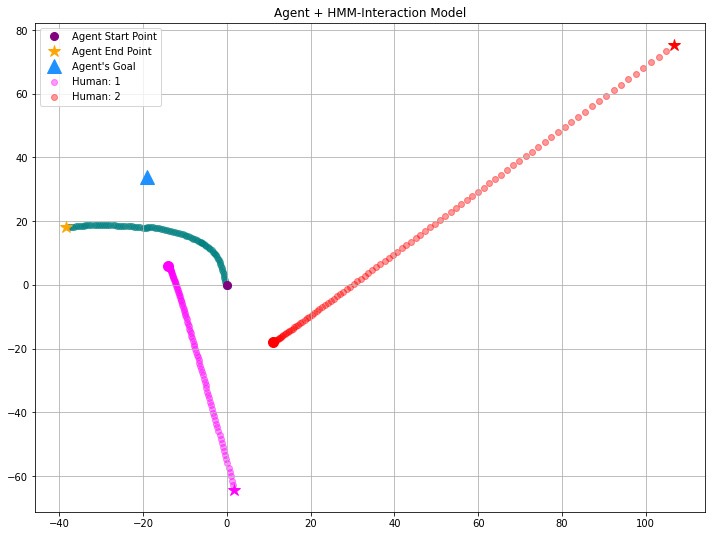

G: [31 24]
0 -- Distance to Goal: 39.20459156782532
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 48

********************
Total Episode Loss: 4668.379420320116 | Agent Score: -4668.379420320116
********************



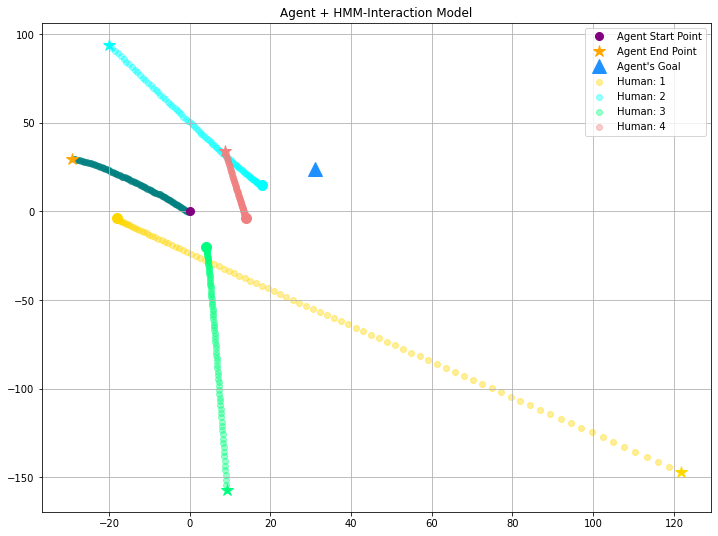

G: [-22 -15]
0 -- Distance to Goal: 26.627053911388696
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 49

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 97583.21245082996 | Agent Score: -10000
********************



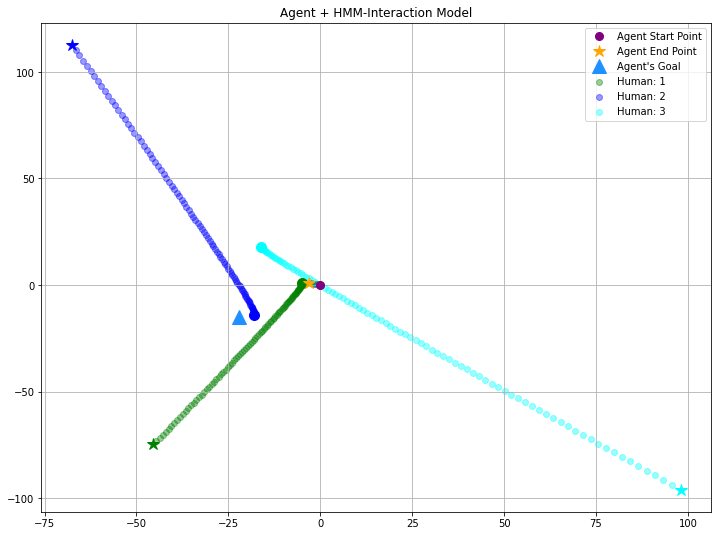

G: [ 39 -18]
0 -- Distance to Goal: 42.95346318982906
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 50

********************
Total Episode Loss: 4185.3740895527735 | Agent Score: -4185.3740895527735
********************



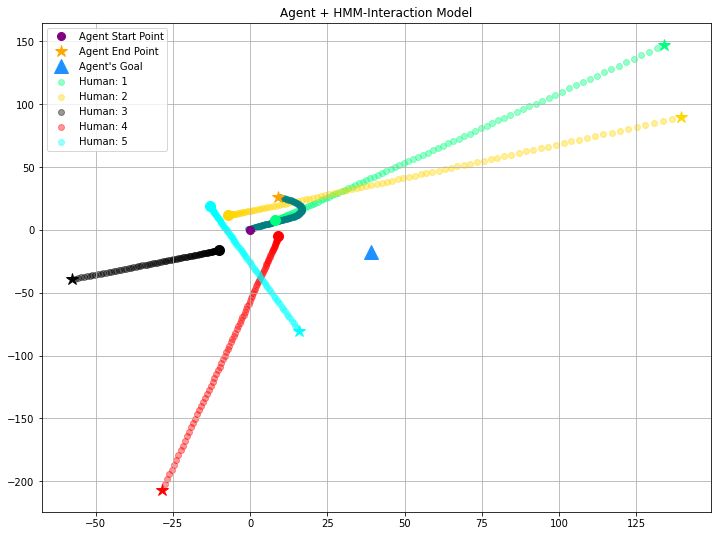

G: [28 -4]
0 -- Distance to Goal: 28.284271247461902
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 51

********************
Total Episode Loss: 2469.5799985701233 | Agent Score: -2469.5799985701233
********************



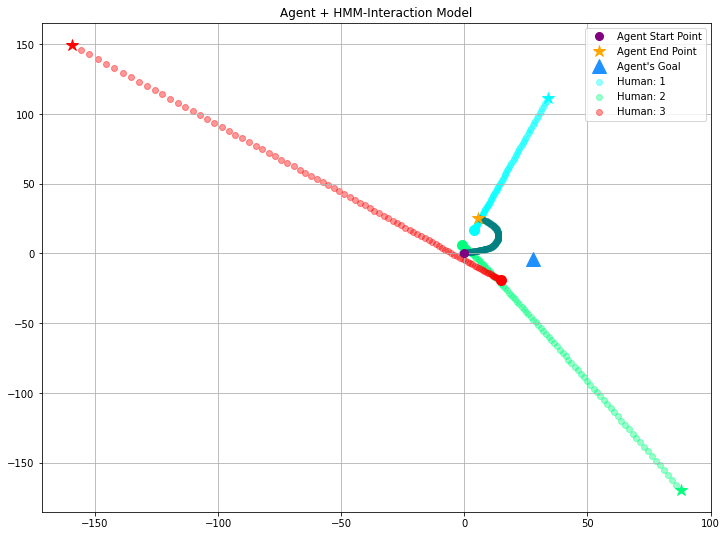

G: [ 4 35]
0 -- Distance to Goal: 35.22782990761707
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 52

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 35290.15226714234 | Agent Score: -10000
********************



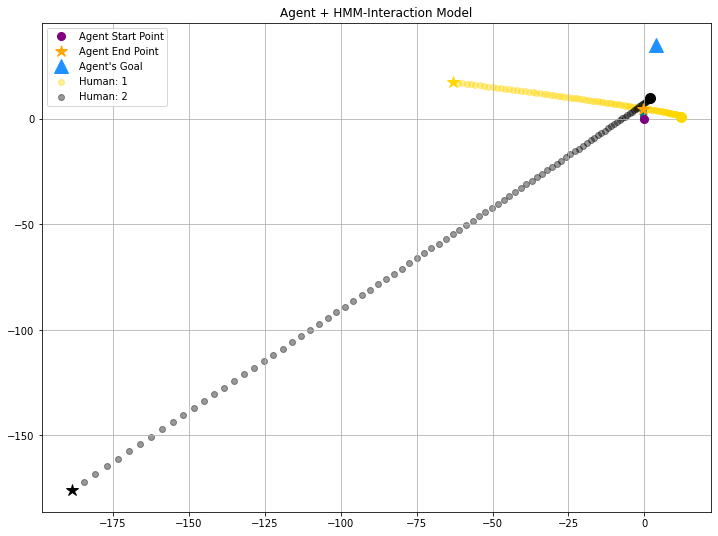

G: [-40 -20]
0 -- Distance to Goal: 44.721359549995796
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 53

********************
Total Episode Loss: 2897.513635779269 | Agent Score: -2897.513635779269
********************



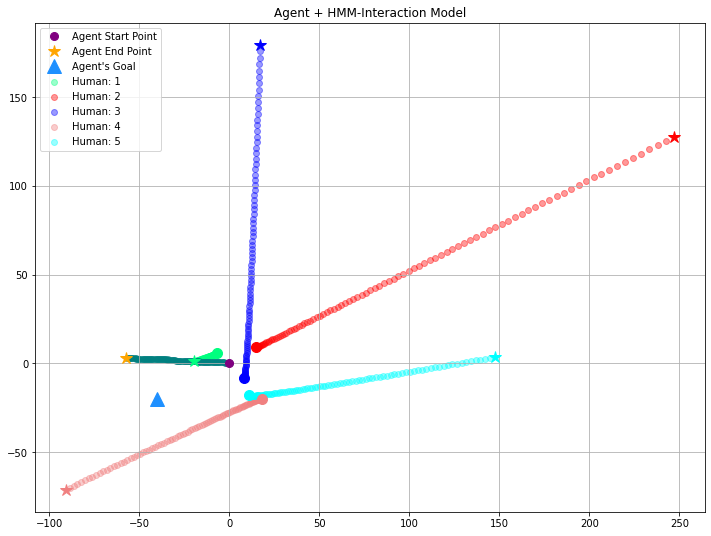

G: [ 20 -25]
0 -- Distance to Goal: 32.01562118716424
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 54

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 36084.566951203604 | Agent Score: -10000
********************



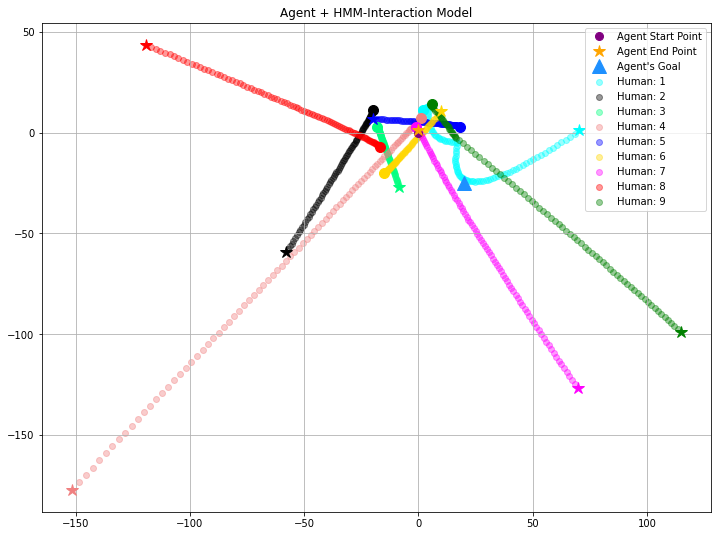

G: [-38  14]
0 -- Distance to Goal: 40.496913462633174
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 55

********************
Total Episode Loss: 2110.478946336443 | Agent Score: -2110.478946336443
********************



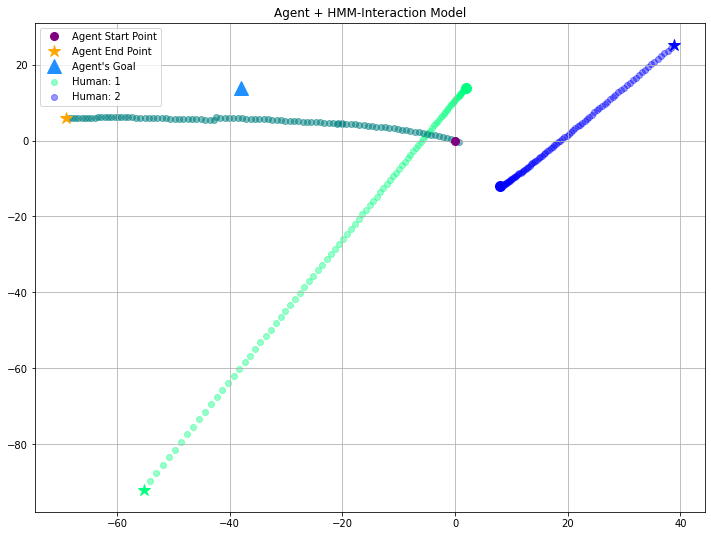

G: [22  8]
0 -- Distance to Goal: 23.40939982143925
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 56

********************
Total Episode Loss: 2028.145955134781 | Agent Score: -2028.145955134781
********************



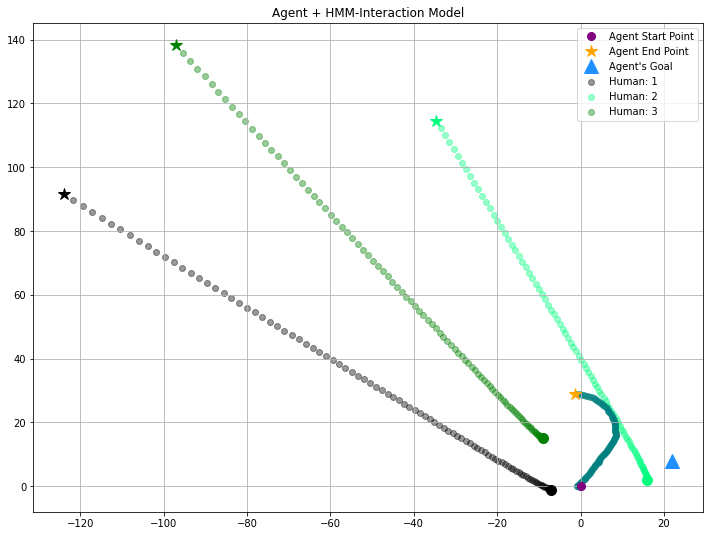

G: [ 30 -27]
0 -- Distance to Goal: 40.36087214122113
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 57

********************
Total Episode Loss: 5652.7328924693065 | Agent Score: -5652.7328924693065
********************



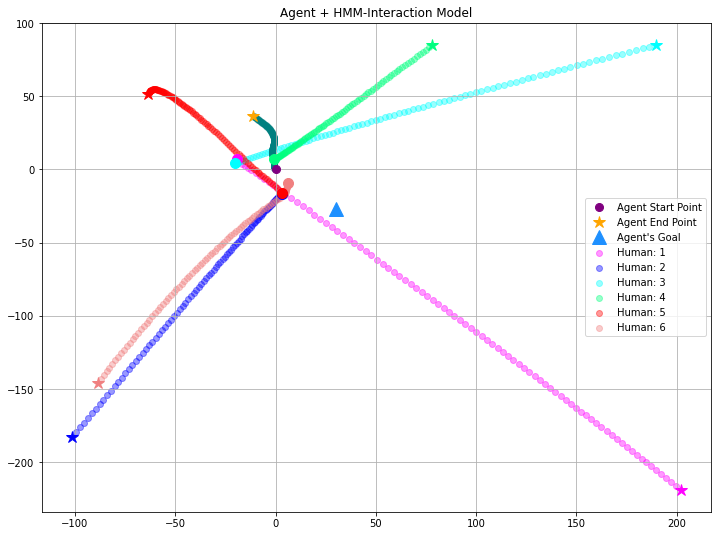

G: [10 36]
0 -- Distance to Goal: 37.36308338453881
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 58

********************
Total Episode Loss: 3028.6623996252943 | Agent Score: -3028.6623996252943
********************



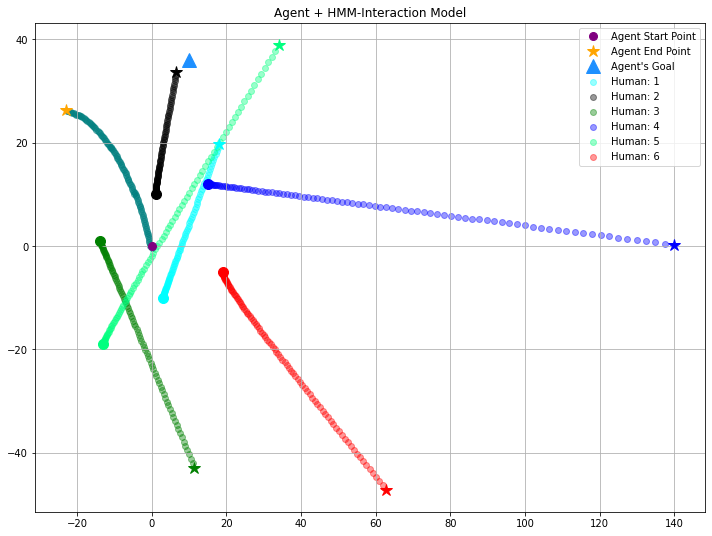

G: [ 7 -2]
0 -- Distance to Goal: 7.280109889280518
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 59

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 30006.173553443918 | Agent Score: -10000
********************



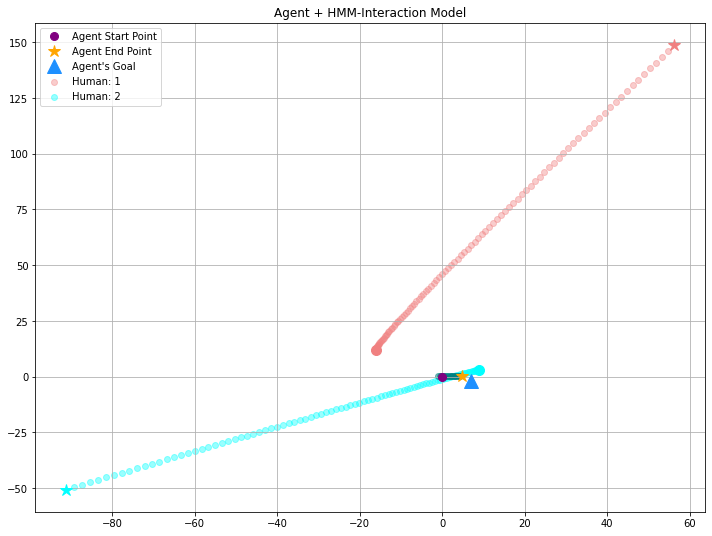

G: [21  8]
0 -- Distance to Goal: 22.47220505424423
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 60

********************
Total Episode Loss: 2172.6638879038037 | Agent Score: -2172.6638879038037
********************



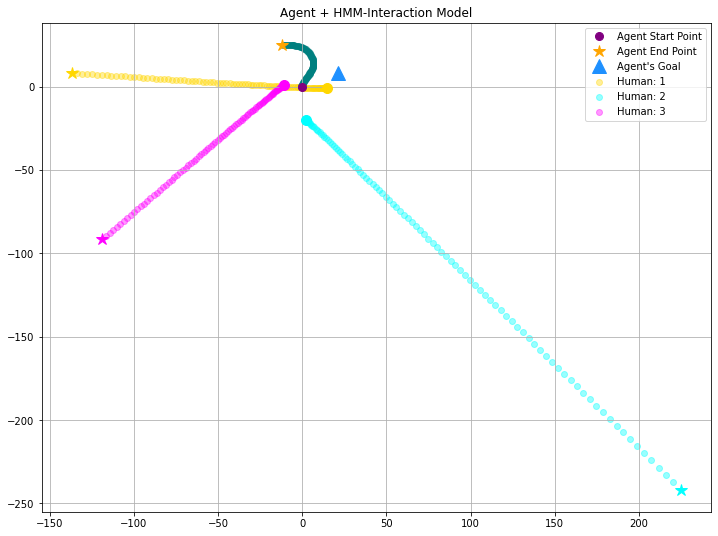

G: [ 21 -18]
0 -- Distance to Goal: 27.65863337187866
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 61

********************
Total Episode Loss: 3120.256239492955 | Agent Score: -3120.256239492955
********************



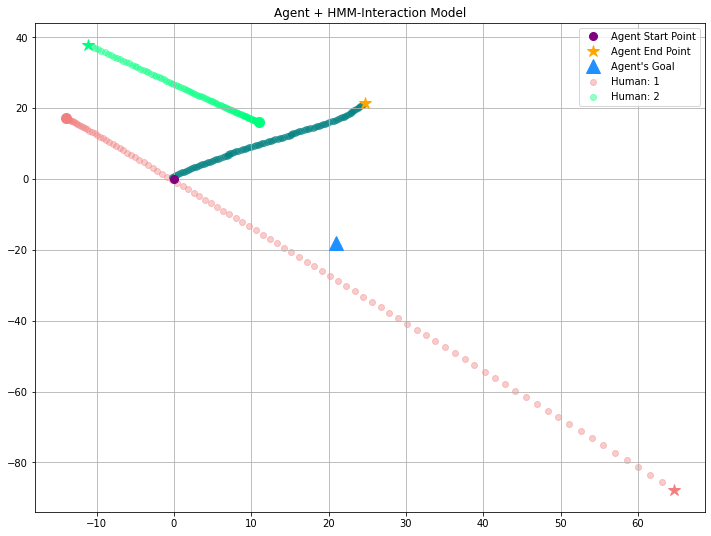

G: [-28 -26]
0 -- Distance to Goal: 38.2099463490856
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 62

********************
Total Episode Loss: 3234.890107737075 | Agent Score: -3234.890107737075
********************



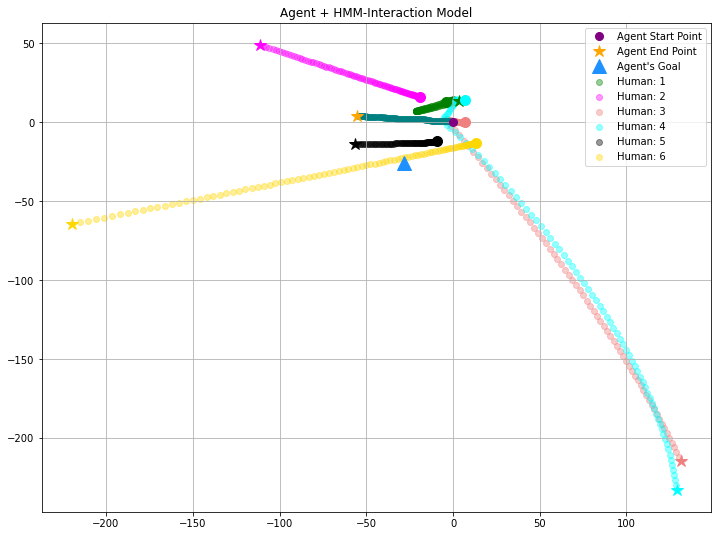

G: [ -1 -10]
0 -- Distance to Goal: 10.04987562112089
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 63

********************
Total Episode Loss: 2271.4106821205987 | Agent Score: -2271.4106821205987
********************



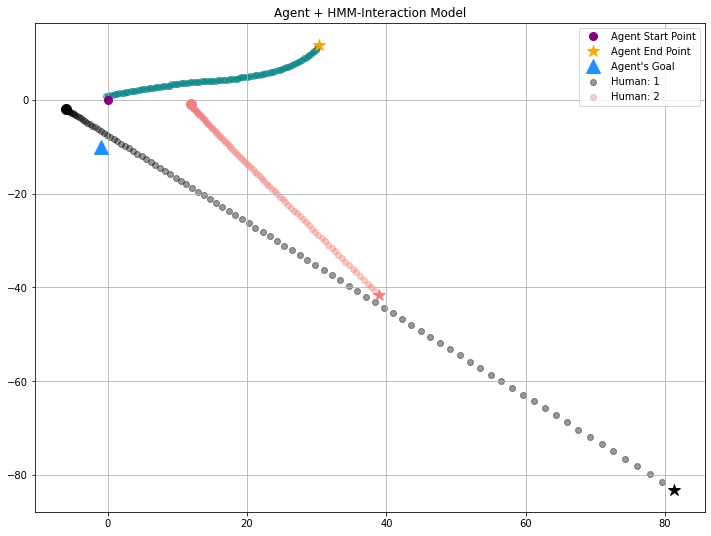

G: [-39 -23]
0 -- Distance to Goal: 45.27692569068709
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 64

********************
Total Episode Loss: 2945.0694414527693 | Agent Score: -2945.0694414527693
********************



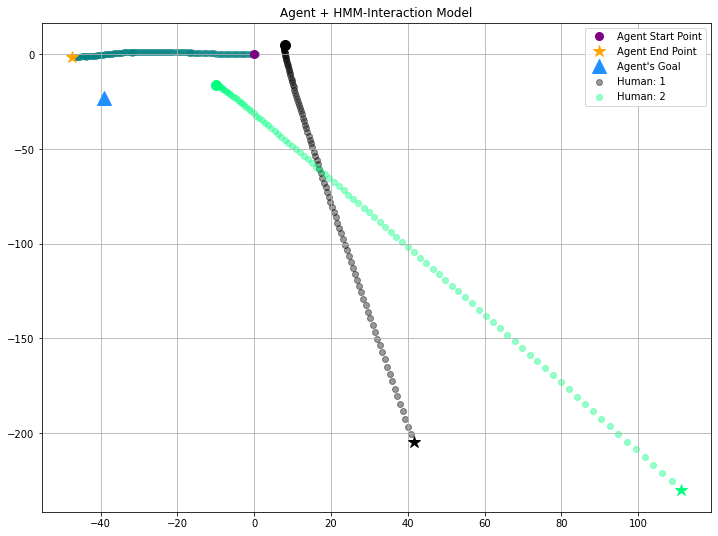

G: [-31 -21]
0 -- Distance to Goal: 37.44329045369811
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 65

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 127705.58012034232 | Agent Score: -10000
********************



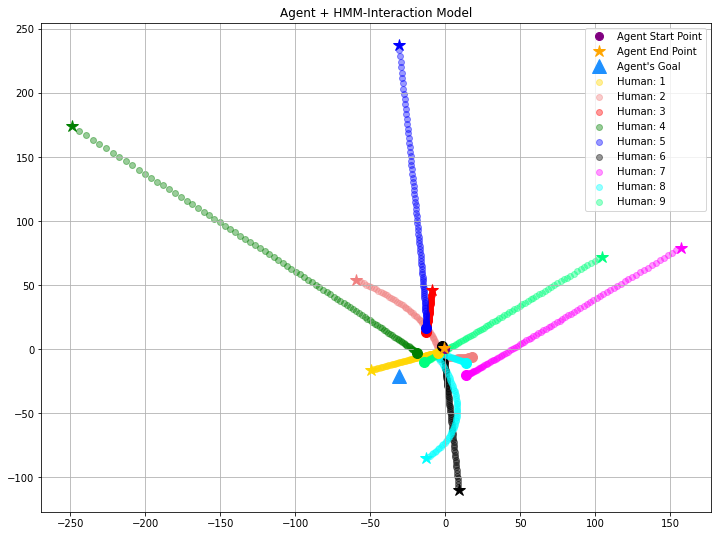

G: [-17  28]
0 -- Distance to Goal: 32.7566787083184
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 66

********************
Total Episode Loss: 1742.731202858512 | Agent Score: -1742.731202858512
********************



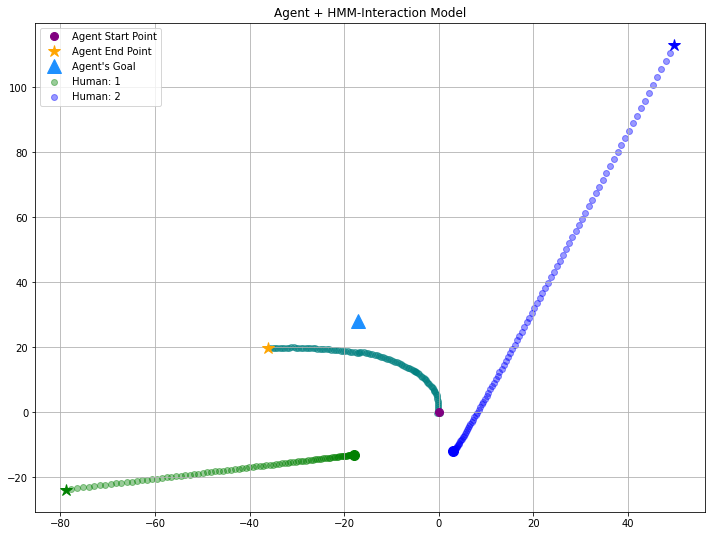

G: [-6 17]
0 -- Distance to Goal: 18.027756377319946
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 67

********************
Total Episode Loss: 1440.0609034900692 | Agent Score: -1440.0609034900692
********************



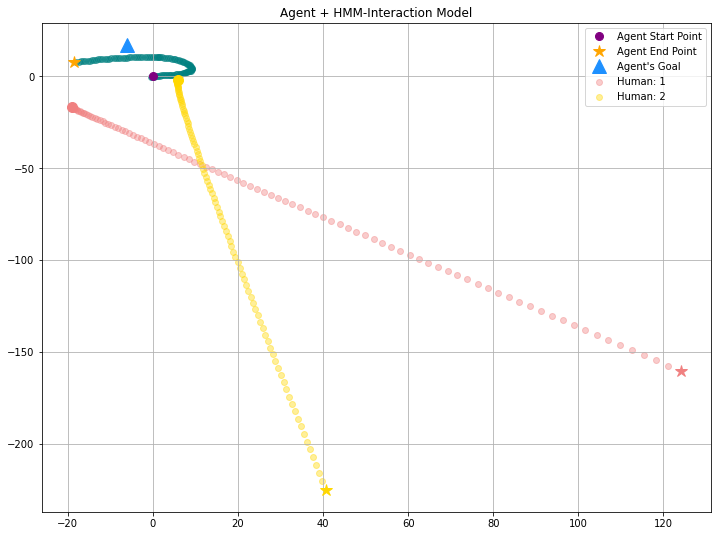

G: [ 17 -27]
0 -- Distance to Goal: 31.906112267087632
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 68

********************
Total Episode Loss: 4920.74980785624 | Agent Score: -4920.74980785624
********************



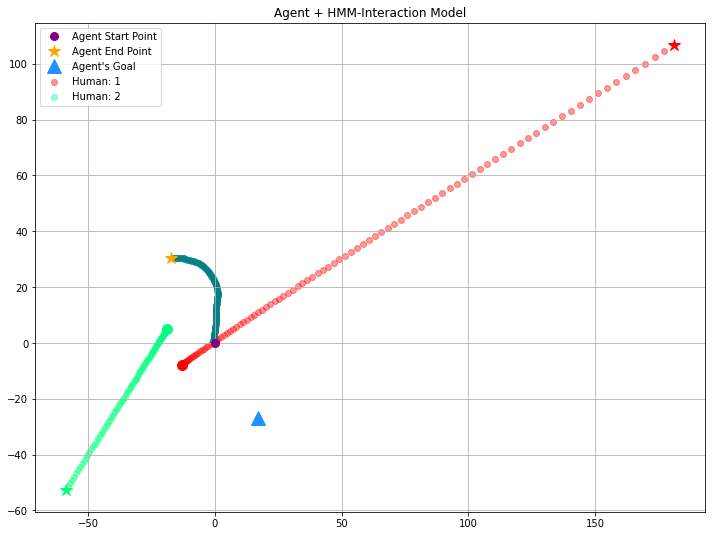

G: [33 32]
0 -- Distance to Goal: 45.967379738244816
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 69

********************
Total Episode Loss: 5266.318011817517 | Agent Score: -5266.318011817517
********************



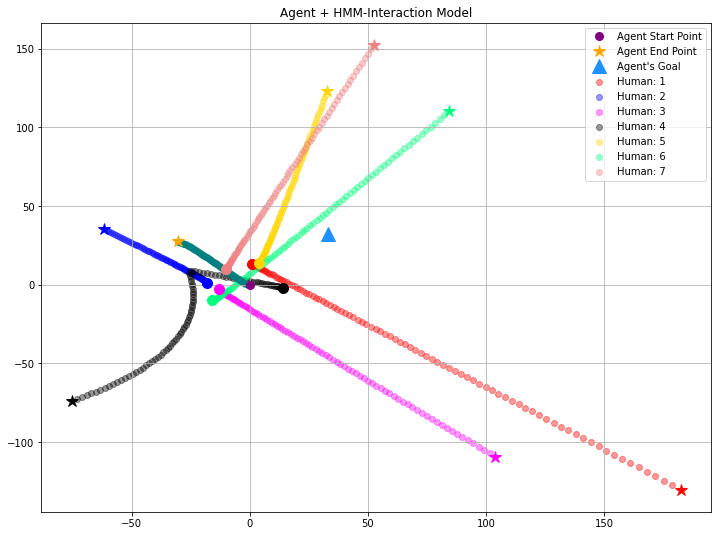

G: [  8 -34]
0 -- Distance to Goal: 34.92849839314596
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 70

********************
Total Episode Loss: 5739.753756553361 | Agent Score: -5739.753756553361
********************



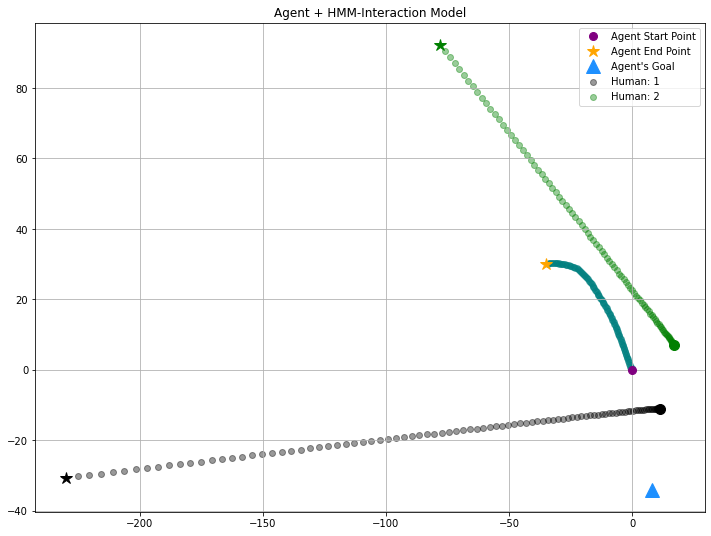

G: [16 38]
0 -- Distance to Goal: 41.23105625617661
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 71

********************
Total Episode Loss: 3927.2457812250823 | Agent Score: -3927.2457812250823
********************



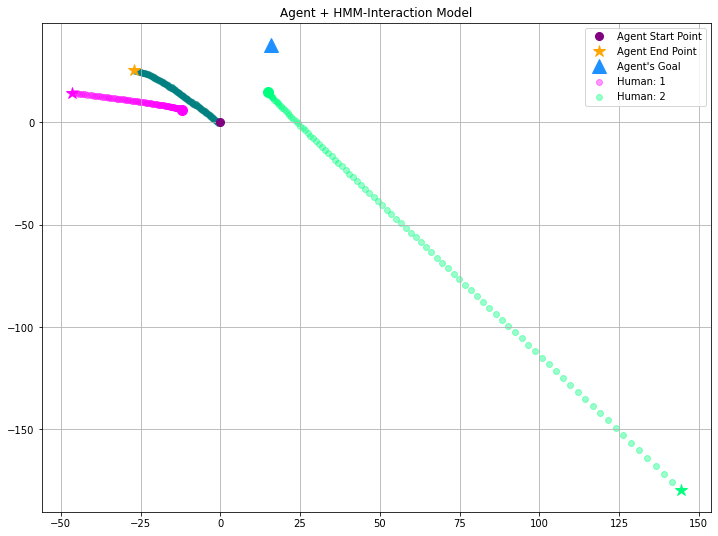

G: [-12   0]
0 -- Distance to Goal: 12.0
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 72

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 41966.30510721929 | Agent Score: -10000
********************



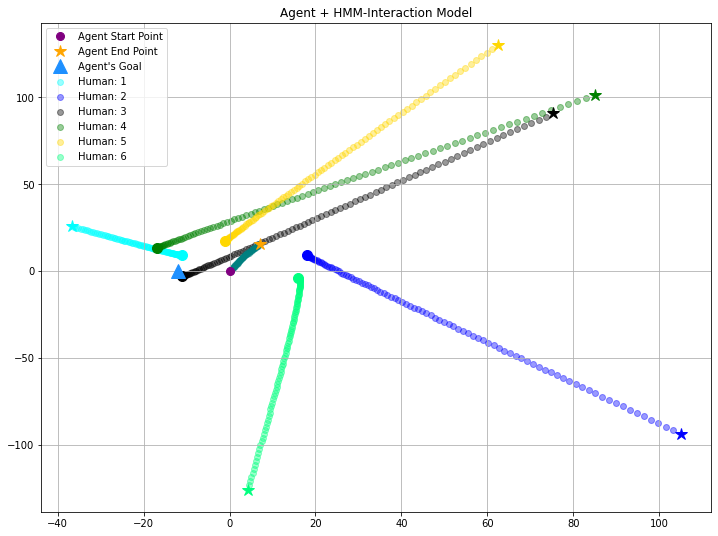

G: [-23 -35]
0 -- Distance to Goal: 41.88078318274385
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 73

********************
Total Episode Loss: 3917.5398928084583 | Agent Score: -3917.5398928084583
********************



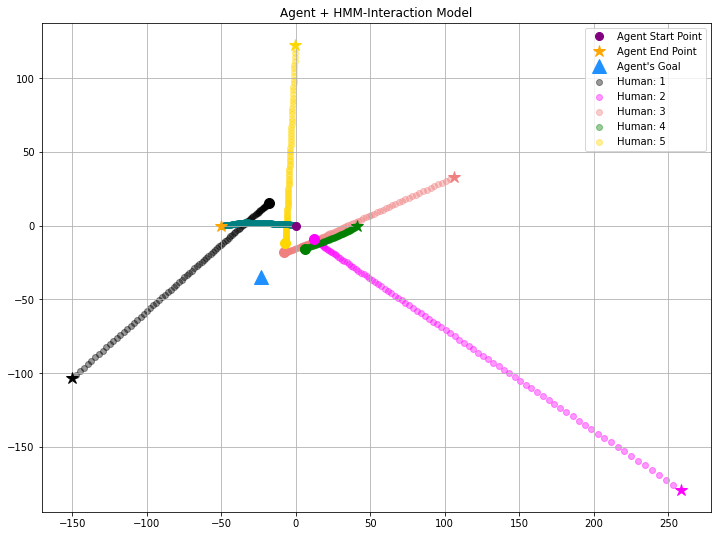

G: [-19  35]
0 -- Distance to Goal: 39.824615503479755
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 74

********************
Total Episode Loss: 2016.7214210362665 | Agent Score: -2016.7214210362665
********************



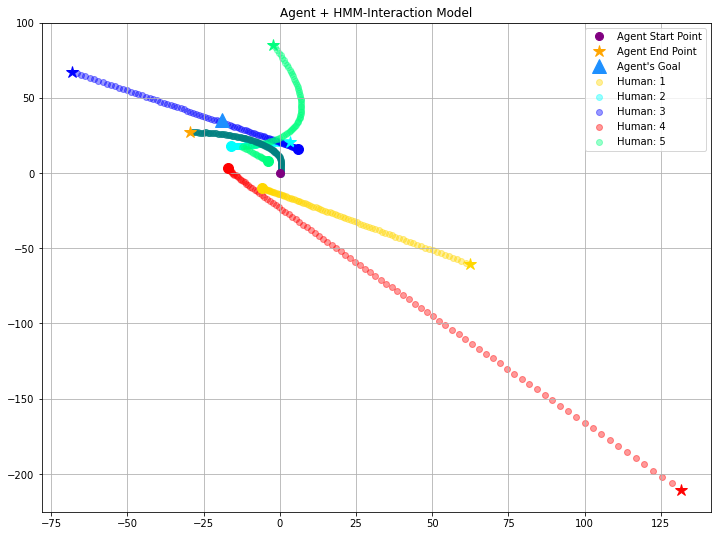

G: [22 -7]
0 -- Distance to Goal: 23.08679276123039
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 75

********************
Total Episode Loss: 1669.4517845605724 | Agent Score: -1669.4517845605724
********************



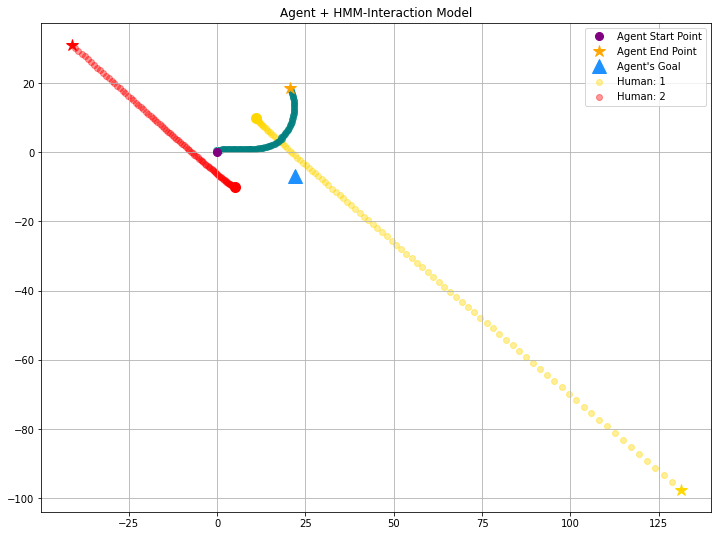

G: [-40  37]
0 -- Distance to Goal: 54.48853090330111
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 76

********************
Total Episode Loss: 3477.507980567584 | Agent Score: -3477.507980567584
********************



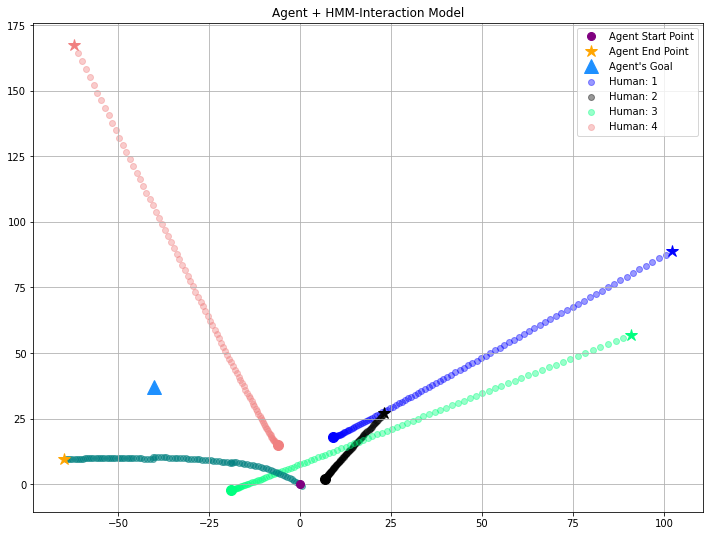

G: [-31  -7]
0 -- Distance to Goal: 31.78049716414141
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 77

********************
Total Episode Loss: 2024.4861648098693 | Agent Score: -2024.4861648098693
********************



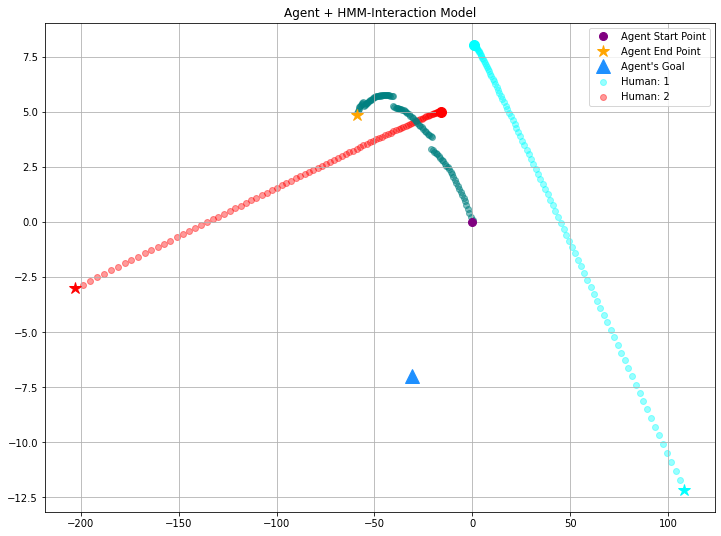

G: [-38 -39]
0 -- Distance to Goal: 54.45181356024793
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 78

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 174196.73559416967 | Agent Score: -10000
********************



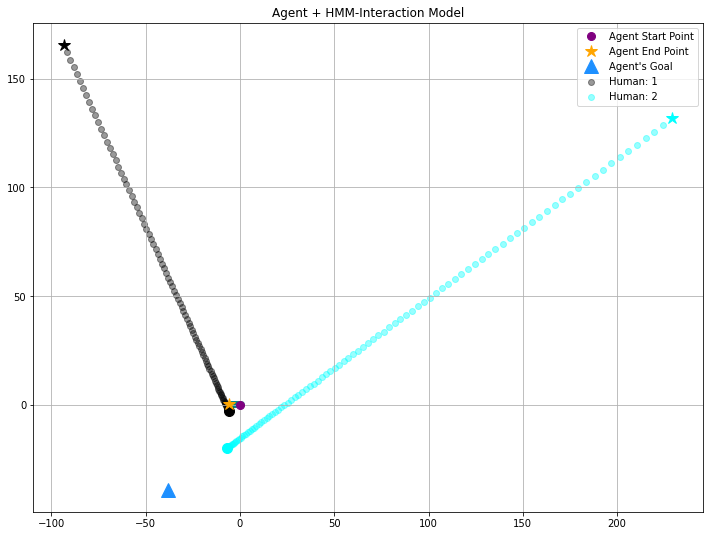

G: [ 16 -29]
0 -- Distance to Goal: 33.12099032335839
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 79

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 35388.319580615535 | Agent Score: -10000
********************



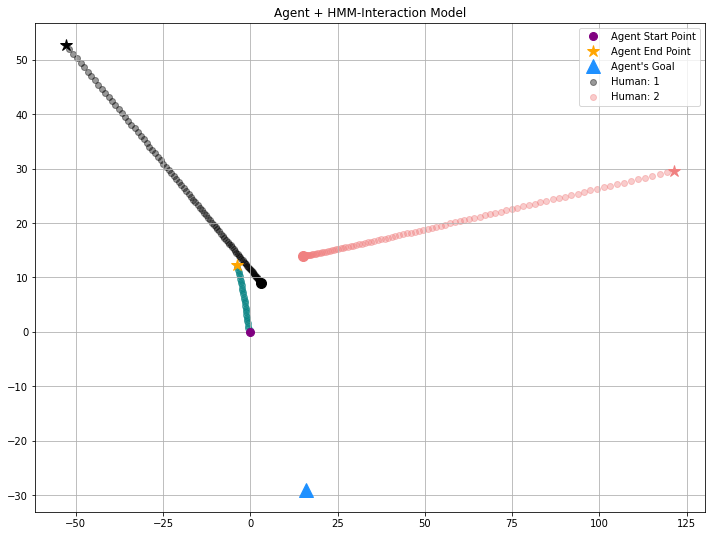

G: [ 31 -31]
0 -- Distance to Goal: 43.840620433565945
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 80

********************
Total Episode Loss: 6080.103012699727 | Agent Score: -6080.103012699727
********************



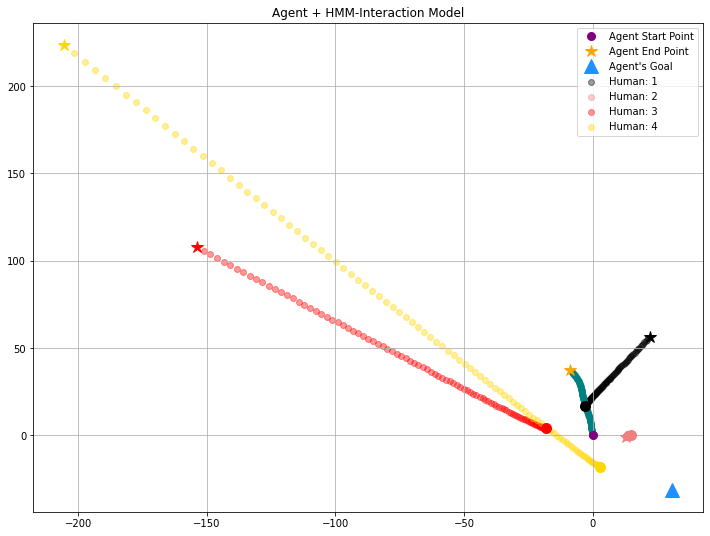

G: [ 30 -37]
0 -- Distance to Goal: 47.634021455258214
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 81

********************
Total Episode Loss: 7063.892026225067 | Agent Score: -7063.892026225067
********************



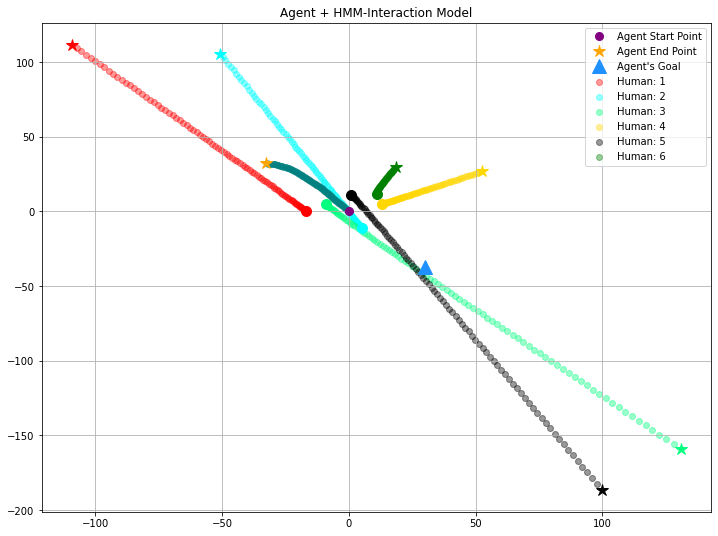

G: [40 14]
0 -- Distance to Goal: 42.37924020083418
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 82

********************
Total Episode Loss: 4880.10510513236 | Agent Score: -4880.10510513236
********************



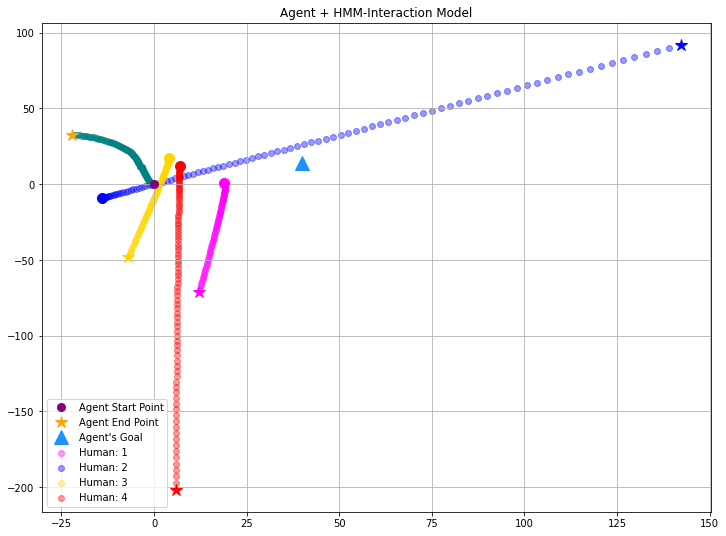

G: [-34  -9]
0 -- Distance to Goal: 35.17101079013795
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 83

********************
Total Episode Loss: 2083.229245688316 | Agent Score: -2083.229245688316
********************



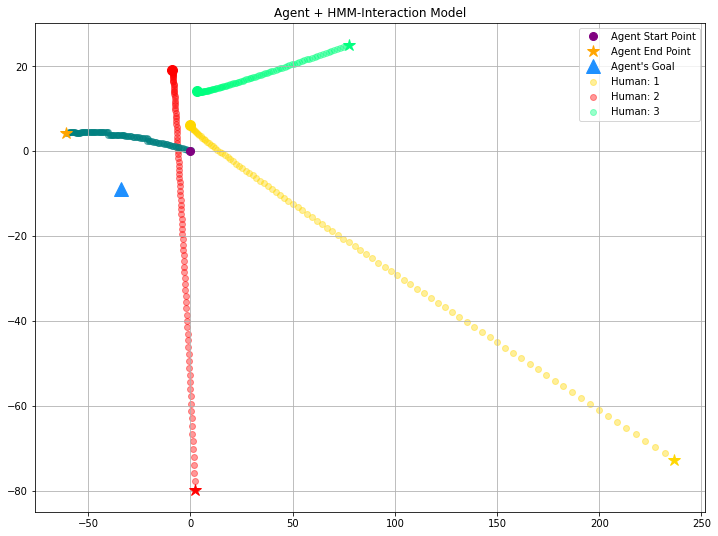

G: [ 40 -19]
0 -- Distance to Goal: 44.28317965096906
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 84

********************
Total Episode Loss: 4134.531412178534 | Agent Score: -4134.531412178534
********************



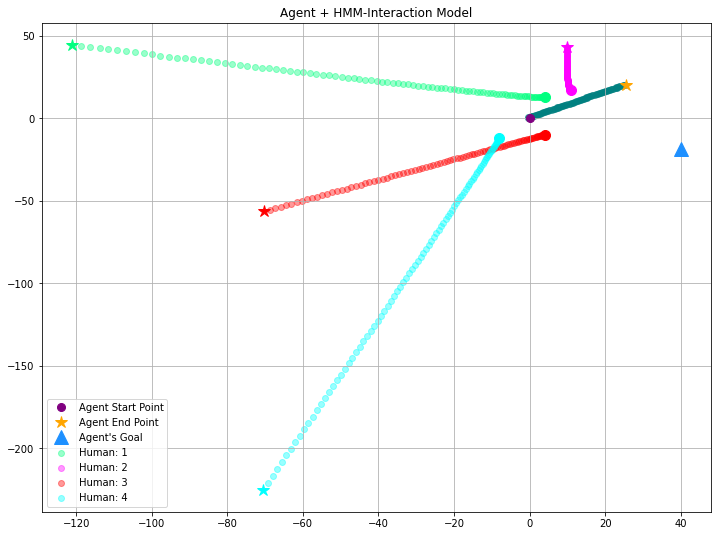

G: [-16  31]
0 -- Distance to Goal: 34.88552708502482
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 85

********************
Total Episode Loss: 1904.1854419128824 | Agent Score: -1904.1854419128824
********************



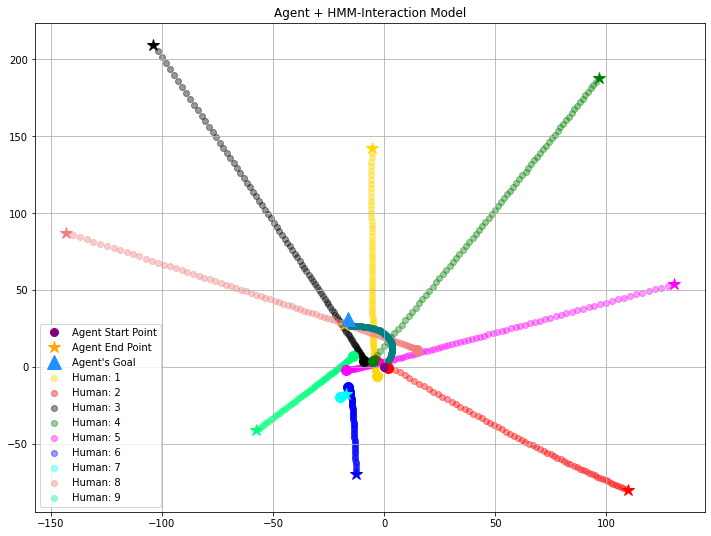

G: [-20 -28]
0 -- Distance to Goal: 34.40930106817051
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 86

********************
Total Episode Loss: 3388.918992020756 | Agent Score: -3388.918992020756
********************



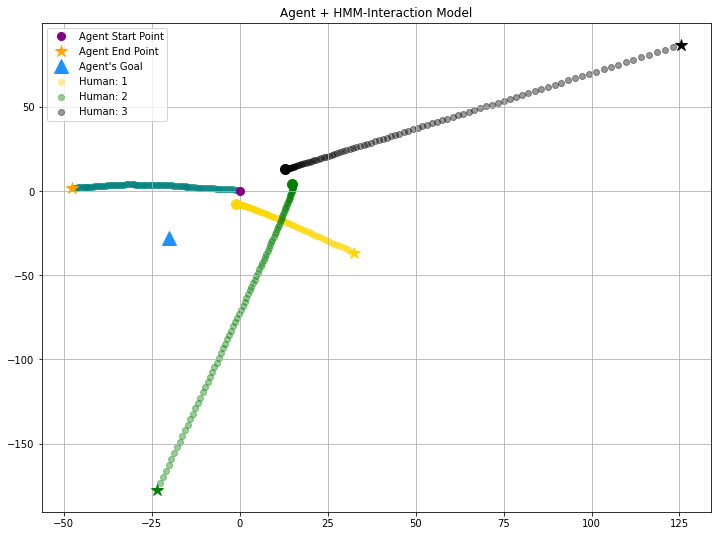

G: [  6 -27]
0 -- Distance to Goal: 27.65863337187866
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 87

********************
Total Episode Loss: 4866.7338842552135 | Agent Score: -4866.7338842552135
********************



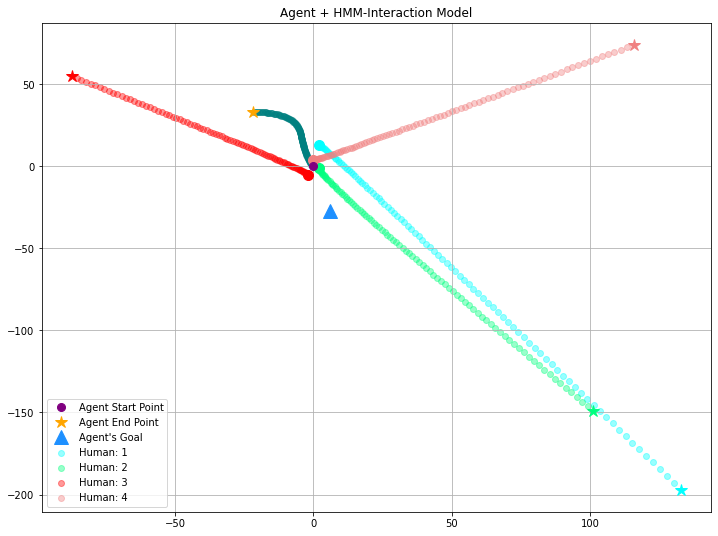

G: [-31  36]
0 -- Distance to Goal: 47.50789408087881
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 88

********************
Total Episode Loss: 3020.5609091633737 | Agent Score: -3020.5609091633737
********************



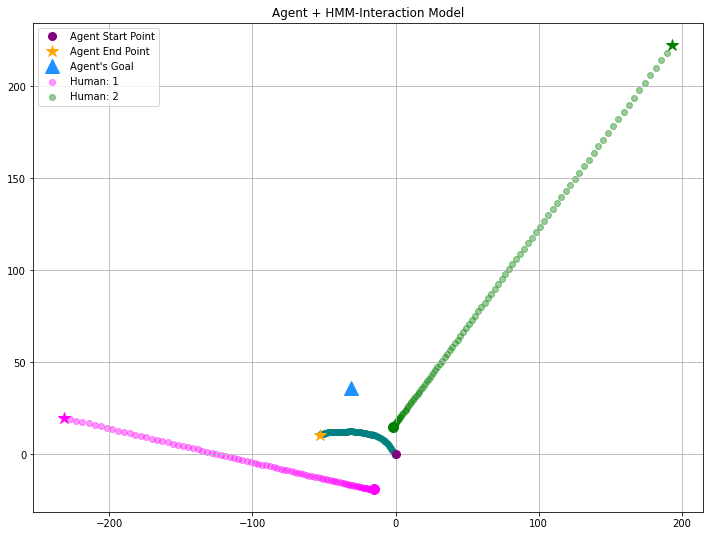

G: [  1 -36]
0 -- Distance to Goal: 36.013886210738214
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 89

********************
Total Episode Loss: 5486.6254138947825 | Agent Score: -5486.6254138947825
********************



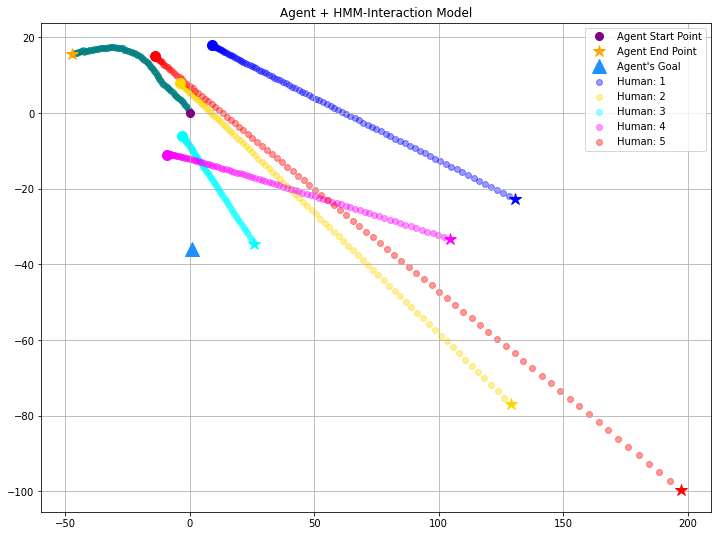

G: [ 1 29]
0 -- Distance to Goal: 29.017236257093817
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 90

********************
Total Episode Loss: 1720.1067465199199 | Agent Score: -1720.1067465199199
********************



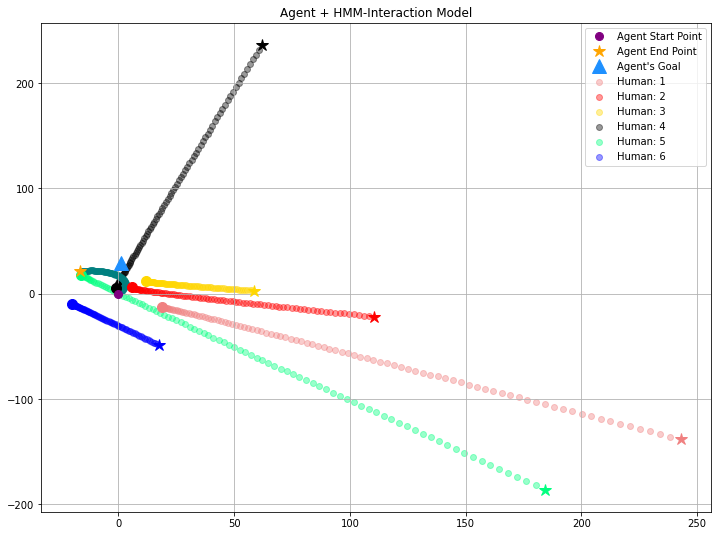

G: [-17  18]
0 -- Distance to Goal: 24.758836806279895
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 91

********************
Total Episode Loss: 1235.3685624414468 | Agent Score: -1235.3685624414468
********************



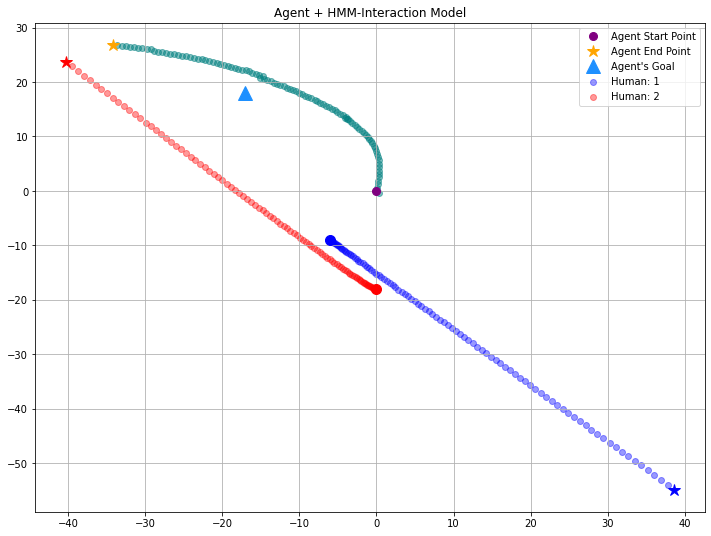

G: [-15 -28]
0 -- Distance to Goal: 31.76476034853718
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 92

********************
Total Episode Loss: 3726.604062048228 | Agent Score: -3726.604062048228
********************



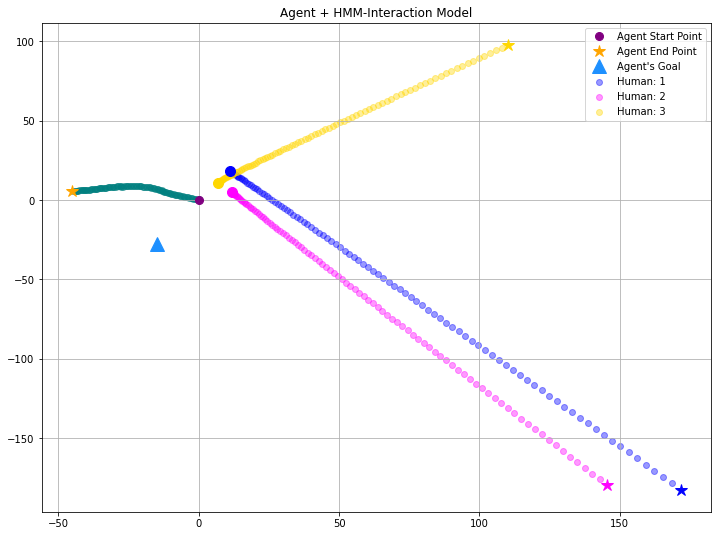

G: [-40 -20]
0 -- Distance to Goal: 44.721359549995796
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 93

********************
Total Episode Loss: 2891.407946463718 | Agent Score: -2891.407946463718
********************



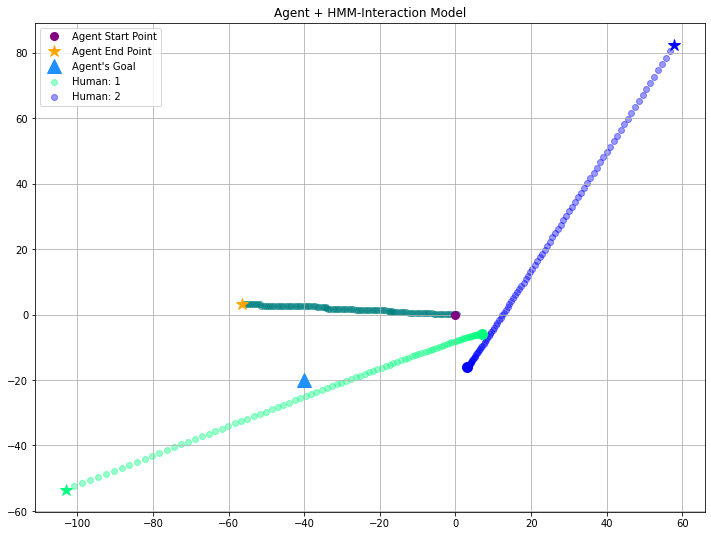

G: [-40  -3]
0 -- Distance to Goal: 40.11234224026316
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 94

********************
Total Episode Loss: 1885.551250155079 | Agent Score: -1885.551250155079
********************



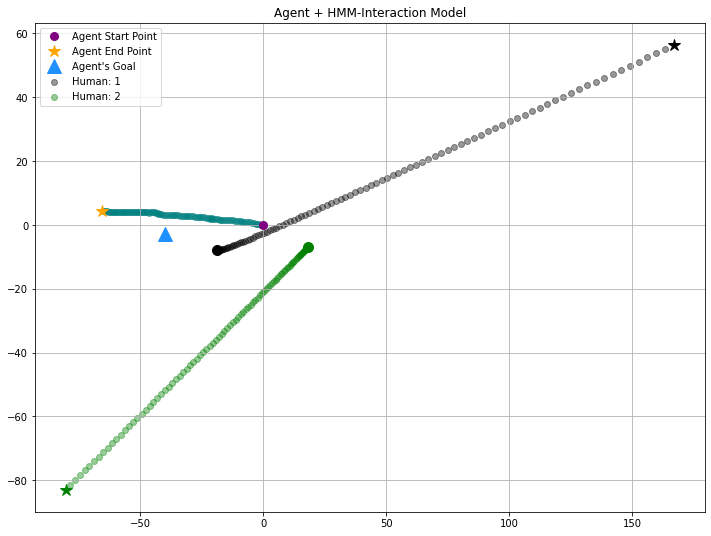

G: [ 22 -19]
0 -- Distance to Goal: 29.068883707497267
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 95

********************
Total Episode Loss: 3381.3095839436464 | Agent Score: -3381.3095839436464
********************



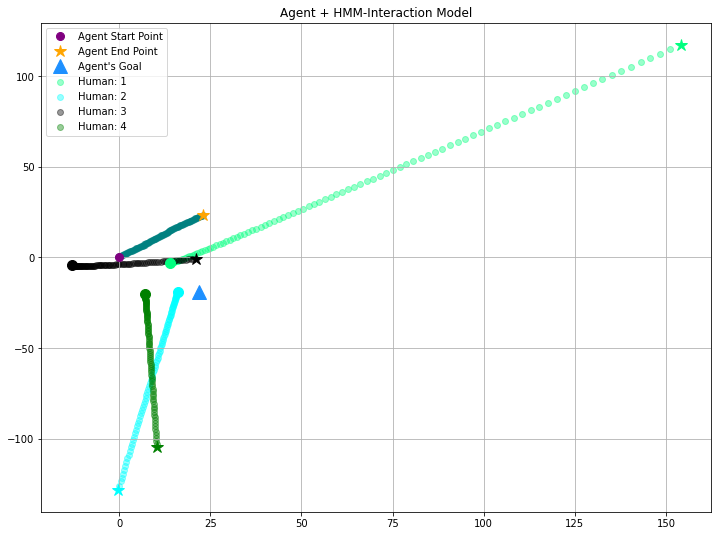

G: [ -1 -17]
0 -- Distance to Goal: 17.029386365926403
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 96

********************
Total Episode Loss: 3291.6608940078863 | Agent Score: -3291.6608940078863
********************



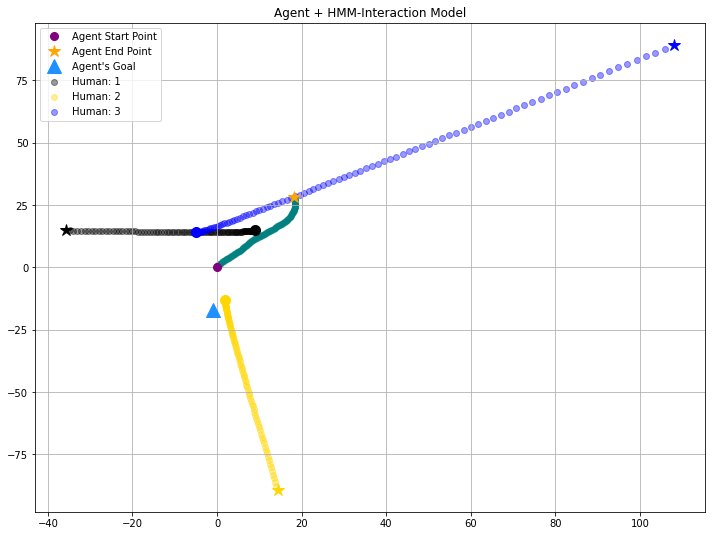

G: [10  5]
0 -- Distance to Goal: 11.180339887498949
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 97

Agent gets additional: 3041.4833701905295 as reward for reaching goal!
********************
Total Episode Loss: -9645.062945621772 | Agent Score: 2834.337417977017
********************



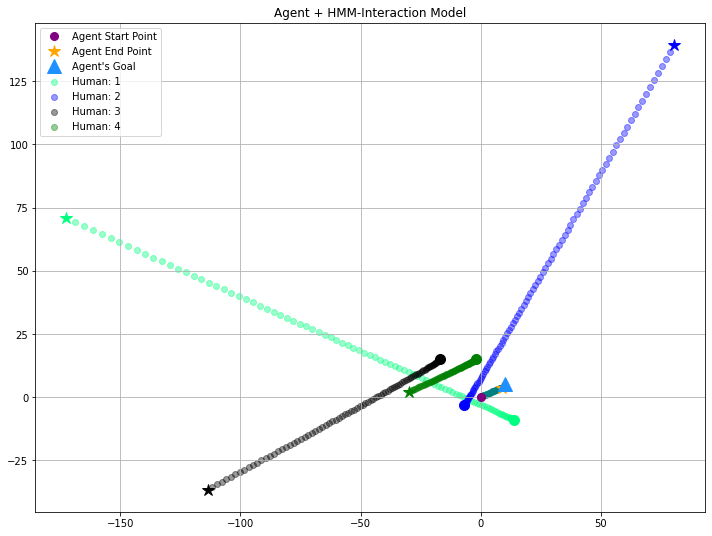

G: [ 3 28]
0 -- Distance to Goal: 28.160255680657446
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 98

[!] Agent Collided.
AGENT'S HARD DRIVE WILL BE DESTROYED.
********************
Total Episode Loss: 34330.12170857628 | Agent Score: -10000
********************



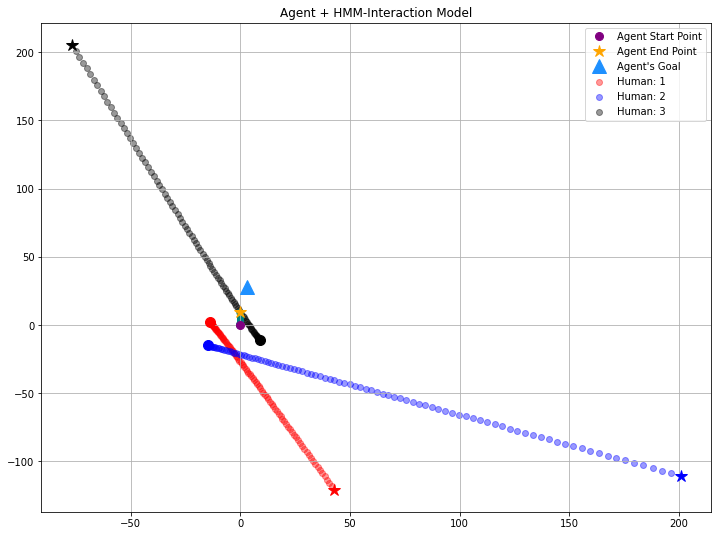

G: [ 24 -31]
0 -- Distance to Goal: 39.20459156782532
T: 0 | Score: 0.0000 | Currently At: (0.0, 0.0)

Episode: 99

********************
Total Episode Loss: 5811.6757820001085 | Agent Score: -5811.6757820001085
********************



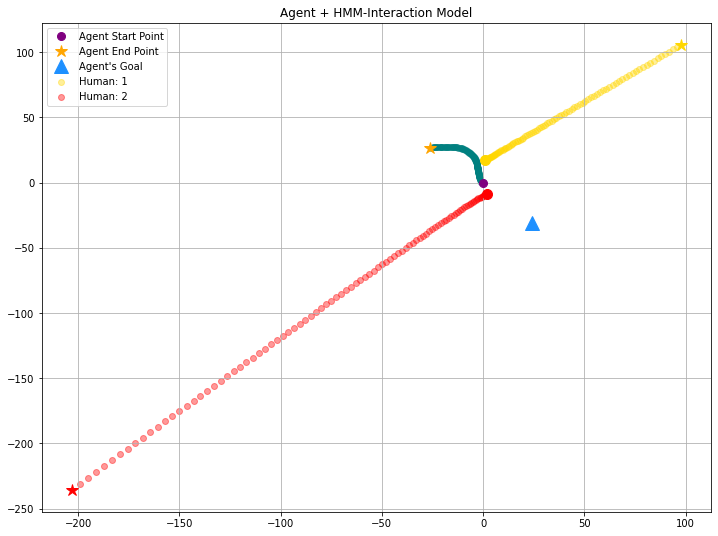

In [ ]:
env = playgroundEnv()

episodes = len(traj_indep)-1
best_score_so_far = 0
train_every_nStep = 1

for i in range(1, episodes+1):
  trajLst = []
  pos, score, nICS = env.reset(i)
  trajLst.append([pos[0], pos[1]])
  GOAL = env.goal
  
  print(f"G: {GOAL}")
  #print(f"Curr Vel: {env.vel_mag}\nCurr Vel Dir: {env.vel_dir}\nCurr Acc Mag: {env.acc_mag}\nCurr Acc Dir: {env.acc_dir}\n")
  print(f"{env.current_time} -- Distance to Goal: {np.linalg.norm(np.array(env.goal) - pos)}")
  print(f"T: {env.current_time} | Score: {score:.4f} | Currently At: ({pos[0]:.1f}, {pos[1]:.1f})")
  
  done = False
  
  
  print(f"\nEpisode: {i}\n")
  scoreE = score
  loss = 0

  while not done:
    #Replay_Buffer[i][env.current_time+1] = {}
    #print(env.state, env.state.dtype)
    #Replay_Buffer[i][env.current_time+1]['state'] = env.state
    #print(Replay_Buffer[i])

    torch.autograd.set_detect_anomaly(True)
    
    input = torch.tensor(env.state)

    if env.current_time % train_every_nStep == 0: # Train every alternate step
      action_logits = model(input)

      action_logits_npy = action_logits.detach().clone().numpy()
      #print(action_logits_npy)
      # Make logits fall within permissible ranges
      action = [magLogit(action_logits_npy[0], 0.7), dirLogit(action_logits_npy[1]), 
                magLogit(action_logits_npy[2], 0.3), dirLogit(action_logits_npy[3])]

      if env.current_time % 30 == 0:
        temp_dir = 180 * math.atan2(env.goal[1] - env.position[1], env.goal[0] - env.position[0]) / math.pi 
        if temp_dir < 0:
          temp_dir += 360
        action[1] = temp_dir
        action[3] = temp_dir
      # print(f"Chosen action(vel_mag, vel_dir, acc_mag, acc_dir): {action}")
      #print(Replay_Buffer[i])

      pos, reward, done, info = env.step(action, i)
      #print(f"Current Step Reward: {reward}")

      total_loss = torch.add(torch.tensor(np.linalg.norm(env.position - env.goal)),
                             torch.sum(torch.mul(torch.nn.functional.logsigmoid(action_logits), torch.tensor(reward))))

      optimizer.zero_grad()
      total_loss.backward()
      optimizer.step()

      loss += total_loss.item()

    else:
      with torch.no_grad():
        action_logits = model(input)
        action_logits_npy = action_logits.detach().clone().numpy()
      
        action = [magLogit(action_logits_npy[0], 0.7), dirLogit(action_logits_npy[1]), 
                magLogit(action_logits_npy[2], 0.3), dirLogit(action_logits_npy[3])]

        pos, reward, done, info = env.step(action, i)

      #print(f"---------------------------\nCurrent Step Loss: {total_loss.item()}\nRunning Loss: {loss}\n---------------------------")
      total_loss = 0
    #print(f"T: {env.current_time} | Score: {env.score:.4f} | Currently At: ({pos[0]:.1f}, {pos[1]:.1f})")
    trajLst.append([pos[0], pos[1]])
    #print("step", i, pos, reward, done, info)
    #print(f"{env.current_time} -- Distance to Goal: {np.linalg.norm(np.array(env.goal) - pos)}")
  print(f"********************\nTotal Episode Loss: {loss} | Agent Score: {env.score}\n********************\n")
  if env.score > best_score_so_far:
    best_score_so_far = env.score
    print(f"########### BEST AGENT SCORE SO FAR: {best_score_so_far} ###########")
    torch.save({
            'episode': i,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'agent_score': score,
            'agent_patience': env.patience,
            'agent_sociability': env.sociability,
            'agent_fitness': env.fitness,
            }, 'agent_001.pth')
    
  #print(f"-----------------------\nAgent Score: {env.score:>7f}\n-----------------------")
  
  trajLst = np.array(trajLst)
  plot_interaction_with_agent(np.array(traj_indep[i]), trajLst)

env.close()

In [ ]:
for params in model.parameters():
  print(params[:1], params.shape)

tensor([[-0.2571, -0.0062,  0.1086,  0.1706,  0.1255,  0.3409, -0.0487,  0.1599,
         -0.2878,  0.3938,  0.2648,  0.0235, -0.0450,  0.0383, -0.0935, -0.0108]],
       grad_fn=<SliceBackward0>) torch.Size([24, 16])
tensor([-0.0400], grad_fn=<SliceBackward0>) torch.Size([24])
tensor([[ 0.0265,  0.1293, -0.1172, -0.1963, -0.1224,  0.1492, -0.0195, -0.1856,
          0.1019, -0.1193, -0.1791,  0.0734,  0.1846, -0.0630,  0.1901, -0.0729,
          0.0007, -0.1833, -0.2130, -0.1908,  0.1916, -0.0473, -0.1684, -0.0731]],
       grad_fn=<SliceBackward0>) torch.Size([16, 24])
tensor([-0.0565], grad_fn=<SliceBackward0>) torch.Size([16])
tensor([[ 0.1073,  0.2122, -0.1902, -0.4079, -0.2882, -0.2494, -0.3578, -0.0953,
         -0.1740, -0.0097, -0.1591, -0.3674, -0.2041,  0.0693, -0.1173, -0.1992]],
       grad_fn=<SliceBackward0>) torch.Size([4, 16])
tensor([-0.2411], grad_fn=<SliceBackward0>) torch.Size([4])


### Somehow I've managed to break the computational graph inside pyTorch.

**Will be implementing everything from scratch now.**

In [ ]:
class MLP:
  def __init__(self):
    self.epochs = 5
    self.batch_size = 2
    self.learning_rate = 0.001
    self.optimizer = 'SGD' # Code up ADAM subsequently

  def init_weights(self, n_input, n_hidden_1, n_hidden_2, n_output):
    pass

  def add_bias_unit(self, layer, orientation):
    pass

  def forward(self):
    pass

  def predict_action(self):
    pass

  def calculate_loss(self):
    pass

  def backward(self):
    pass

######To render the video in the NB itself:(Extremely HARD and pointless task at the moment)

In [ ]:
from base64 import b64encode
def render_mp4(videopath: str) -> str:
  """
  Gets a string containing a b4-encoded version of the MP4 video
  at the specified path.
  """
  mp4 = open(videopath, 'rb').read()
  base64_encoded_mp4 = b64encode(mp4).decode()
  return f'<video width=400 controls><source src="data:video/mp4;' \
         f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'

from IPython.display import HTML
html = render_mp4(before_training)
HTML(html)